# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

A significant portion of a retail bank's profits is sourced from home loans. These loans are borrowed by regular income/high-earning customers. The threat posed by defaulters is a major concern for banks, as non-performing loans (NPLs) can have a significant impact on profits.  Therefore, it is important that banks are judicious while approving loans for their customer base.

The loan approval process is complex and involves multiple facets. In this process, banks undertake a detailed manual examination of various elements of the loan application to assess the applicant's creditworthiness. This procedure is not only laborious but also susceptible to incorrect judgments or approvals, largely due to the potential for human errors and biases.

Numerous banks have previously tried to automate the loan approval process through heuristic methods. However, with the emergence of data science and machine learning technologies, there's a growing trend towards developing systems capable of learning and optimizing this process. These advanced systems aim to eliminate biases and enhance efficiency. A critical consideration in this shift is ensuring that these automated systems do not inadvertently adopt any of the biases that may have been present in the traditional, human-driven approval processes.

### **The objective:**

Develop a predictive classification model designed to identify clients at risk of loan default and provide the bank with insights on key factors to be considered during the loan approval process.

### **The key questions:**

1. Analyze and build an ML model to help identify which clients are likely to default on their loans.
2. Identify  key factors that influence loan repayment behavior.
3. Creat a profile of the clients which are likely to default.

### **The problem formulation**:

The objective is to leverage data science to create a predictive model capable of accurately identifying potential loan defaulters. This model will assist banks in making well-informed and risk-aware lending decisions while adhering to the guidelines of the Equal Credit Opportunity Act. Compliance with this act necessitates interpretability and empirical grounding in order to warrant transparency and objectivity in the lending process.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
!pip install scikeras

In [ ]:
!pip install shap

In [ ]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Library for splitting data
from sklearn.model_selection import train_test_split

# Libraries for data visualization and output analysis
import matplotlib.pyplot as plt
import seaborn as sns
import shap as sh

# Libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Libraries for building and training neural network models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from scikeras.wrappers import KerasClassifier
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adam

# Library for statistical calculations
import scipy.stats as stats

# Library to help with feature engineering
from sklearn.preprocessing import PolynomialFeatures

# Library to help with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To calcutare Pearson's correlation coefficient
from scipy.stats import pearsonr

# Library for generating pseudo-random numbers
import random

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Libraries for evaluating model performance
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    make_scorer,
)

# Libraries for imbalanced dataset handling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Set random seeds for reproducibility
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Library for model serialization
import joblib

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Reading the data
original_data = pd.read_csv('/content/drive/MyDrive/Week 10/hmeq.csv')

In [ ]:
# Copying the data to a different variable to prevent modifications to the original data
data = original_data.copy()

## **Data Overview**

In [ ]:
# Displaying the first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [ ]:
# Displaying the last five rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [ ]:
# Checking the shape of the data
data.shape

(5960, 13)

**Observation:**

The dataset has 5,960 rows and 13 columns.

In [ ]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations:**

- There are **5,960 observations and 13 columns** in the data.
- There are **missing values** in all columns except BAD, and LOAN.
- There are 11 columns of **numeric data type** and 2 columns of **object data type**.

### **Summary Statistics**

In [ ]:
# Generating summary statistics for all columns
data.describe(include='all')

BAD          LOAN        MORTDUE          VALUE   REASON  \
count   5960.000000   5960.000000    5442.000000    5848.000000     5708   
unique          NaN           NaN            NaN            NaN        2   
top             NaN           NaN            NaN            NaN  DebtCon   
freq            NaN           NaN            NaN            NaN     3928   
mean       0.199497  18607.969799   73760.817200  101776.048741      NaN   
std        0.399656  11207.480417   44457.609458   57385.775334      NaN   
min        0.000000   1100.000000    2063.000000    8000.000000      NaN   
25%        0.000000  11100.000000   46276.000000   66075.500000      NaN   
50%        0.000000  16300.000000   65019.000000   89235.500000      NaN   
75%        0.000000  23300.000000   91488.000000  119824.250000      NaN   
max        1.000000  89900.000000  399550.000000  855909.000000      NaN   

          JOB          YOJ        DEROG       DELINQ        CLAGE  \
count    5681  5445.000000  5252.000000  5380.000000  5652.000000   
unique      6          NaN          NaN          NaN          NaN   
top     Other          NaN          NaN          NaN          NaN   
freq     2388          NaN          NaN          NaN          NaN   
mean      NaN     8.922268     0.254570     0.449442   179.766275   
std       NaN     7.573982     0.846047     1.127266    85.810092   
min       NaN     0.000000     0.000000     0.000000     0.000000   
25%       NaN     3.000000     0.000000     0.000000   115.116702   
50%       NaN     7.000000     0.000000     0.000000   173.466667   
75%       NaN    13.000000     0.000000     0.000000   231.562278   
max       NaN    41.000000    10.000000    15.000000  1168.233561   

               NINQ         CLNO      DEBTINC  
count   5450.000000  5738.000000  4693.000000  
unique          NaN          NaN          NaN  
top             NaN          NaN          NaN  
freq            NaN          NaN          NaN  
mean       1.186055    21.296096    33.779915  
std        1.728675    10.138933     8.601746  
min        0.000000     0.000000     0.524499  
25%        0.000000    15.000000    29.140031  
50%        1.000000    20.000000    34.818262  
75%        2.000000    26.000000    39.003141  
max       17.000000    71.000000   203.312149

**Observations:**

- The most frequent reason for a loan request is 'DebtCon', accounting for 3,928 observations.
- On average, the approved loan amount is 18,607 dollars, with values ranging from a minimum of 1,100 dollars to a maximum of 89,900 dollars. In 75% of observations, the loan amount is below or equal to 23,300 dollars.
- The deb-to-income (DEBTINC) ratio exhibits a wide range, with an average of 33.8%, extending from a minimum of 0.5% to a maximum of 203.3%. This suggests the presence of outliers, particularly at the higher end, but also at the lower end.

### **Check for duplicate entries and missing values**

In [ ]:
# Checking duplicate entries
data.duplicated ().sum()

0

**Observation:**

There are **no duplicate entries** in the data.

In [ ]:
# Checking missing values
data.isnull ().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

**Observation:**

As many as 11 columns have **missing values**, ranging between 112 missing values for MORTDUE and 1,267 for DEBTINC. Only LOAN and BAD have no missing values.

In [ ]:
# Checking missing values as percentage for each column
data.isnull ().sum()/data.shape [0] * 100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Observations:**

- Most columns have less than 10% missing data, except for DEROG and DEBTINC, with more than 10% missing values. DEBTINC has the highest proportion at 21%.
- Standard imputation methods like mean, median, or mode can be considered as a baseline approach. This assumes that the missing data is random, but further investigation is needed to confirm this.

In [ ]:
# Checking the data subset containing missing values in DEBTINC
nan_debtinc = data[pd.isna(data['DEBTINC'])]
nan_debtinc

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0       1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1       1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2       1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3       1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4       0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ...    ...      ...       ...      ...     ...   ...    ...     ...   
5930    1  72300      NaN   85000.0  DebtCon   Other   1.0    0.0     0.0   
5932    1  76500  38206.0   90000.0  DebtCon   Other  12.0    0.0     0.0   
5933    1  77200  83962.0  215000.0  HomeImp    Self   8.0    1.0     2.0   
5935    0  78400  13900.0  102910.0  HomeImp     NaN  27.0    0.0     1.0   
5948    0  86000  47355.0   85000.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO  DEBTINC  
0      94.366667   1.0   9.0      NaN  
1     121.833333   0.0  14.0      NaN  
2     149.466667   1.0  10.0      NaN  
3            NaN   NaN   NaN      NaN  
4      93.333333   0.0  14.0      NaN  
...          ...   ...   ...      ...  
5930  117.166667   9.0  23.0      NaN  
5932  134.900000   0.0  26.0      NaN  
5933   71.533132   3.0  14.0      NaN  
5935  138.000000   0.0  14.0      NaN  
5948  210.966667   0.0  16.0      NaN  

[1267 rows x 13 columns]

**Observation:**

The majority of entries with missing data in the DEBTINC column also seem to default.

In [ ]:
# Checking total missing values for DEBTINC
total_nan_debtinc = nan_debtinc.shape[0]
total_nan_debtinc

1267

In [ ]:
# Checking percentage of missing values in DEBTINC that default
bad_nan_debtinc = nan_debtinc [nan_debtinc ['BAD'] == 1].shape[0] / total_nan_debtinc * 100
bad_nan_debtinc

62.036306235201266

**Observations:**

- The proportion of defaulters (62%) among those with missing values for DEBTINC is higher than for the entire dataset (20%).
- The high proportion of defaulters in the subset with missing DEBTINC data suggests that the missingness of DEBTINC might not be random. It could be related to factors that also influence the likelihood of default, indicating a pattern of Missing Not at Random (MNAR).
- This pattern might indicate that borrowers without reported DEBTINC values are generally riskier due to unstable income or unfavorable debt-to-income ratios, leading to missing data.
- Data collection or reporting processes may contribute to this pattern, where certain types of borrowers (e.g., those in precarious financial situations) are more likely to have missing DEBTINC values.

**Possible approaches to handling missing values for DEBTINC:**
- Employing median-based imputation alongside a binary missingness flag could be a reasonable baseline approach. Alternatively, exploring a model-based imputation could be considered.
- It is likely that this pattern may not be repeated in other columns, given the different level of missing values for DEBTINC. Let's check a different column with missing values.

In [ ]:
# Checking the data subset containing missing values in DEROG
nan_derog = data[pd.isna(data['DEROG'])]
nan_derog

BAD   LOAN   MORTDUE     VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
3       1   1500       NaN       NaN      NaN    NaN   NaN    NaN     NaN   
10      1   2000   22608.0       NaN      NaN    NaN  18.0    NaN     NaN   
17      1   2200   23030.0       NaN      NaN    NaN  19.0    NaN     NaN   
23      1   2400   18000.0       NaN  HomeImp    Mgr  22.0    NaN     2.0   
48      0   3000   58000.0   71500.0  HomeImp    Mgr  10.0    NaN     2.0   
...   ...    ...       ...       ...      ...    ...   ...    ...     ...   
5735    0  42900  101731.0  155688.0  DebtCon  Other  14.0    NaN     1.0   
5763    0  44400  100564.0  154708.0  DebtCon  Other  14.0    NaN     0.0   
5766    0  44900   95410.0  157649.0  DebtCon  Other  16.0    NaN     1.0   
5820    1  50000   80286.0  145000.0  DebtCon  Other  12.0    NaN     1.0   
5882    1  53800   82324.0  154409.0  DebtCon  Other  10.0    NaN     1.0   

           CLAGE  NINQ  CLNO    DEBTINC  
3            NaN   NaN   NaN        NaN  
10           NaN   NaN   NaN        NaN  
17           NaN   NaN   NaN   3.711312  
23    121.733333   0.0  10.0        NaN  
48    211.933333   0.0  25.0        NaN  
...          ...   ...   ...        ...  
5735  235.352057   3.0  30.0  43.181424  
5763  253.914111   3.0  30.0  43.902152  
5766  216.101046   4.0  31.0  40.483515  
5820  178.766599   0.0  35.0        NaN  
5882  157.484011   0.0  34.0  41.659044  

[708 rows x 13 columns]

In [ ]:
# Checking total missing values for DEROG
total_nan_derog = nan_derog.shape[0]
total_nan_derog

708

In [ ]:
# Checking percentage of missing values in DEROG that default
bad_nan_derog = nan_derog [nan_derog ['BAD'] == 1].shape[0] / total_nan_derog * 100
bad_nan_derog

12.288135593220339

**Observation:**

- The missing values for DEROG don't seem to show a significant pattern with regards to BAD.
- Let's check for correlation between missing values across columns to see if we find additional patterns.

### **Check for correlation among missing values**

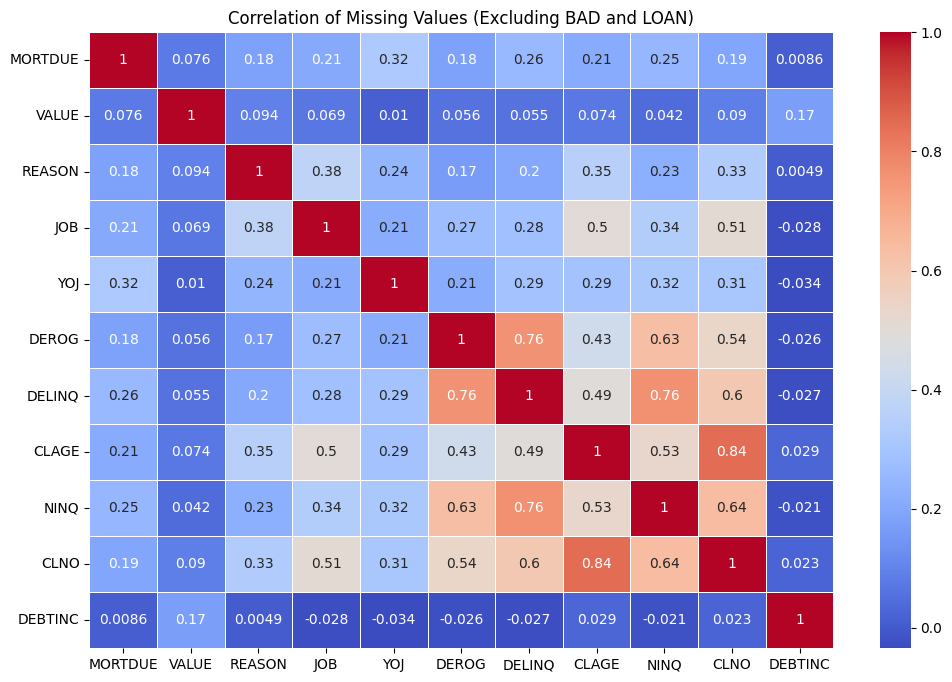

In [ ]:
# Creating a DataFrame to indicate where values are missing
missing_values_df = data.isnull()

# Dropping the columns BAD and LOAN as these have no missing values
missing_values_df = missing_values_df.drop(columns=['BAD', 'LOAN'])

# Computing the correlation matrix for missing values
missing_corr = missing_values_df.corr()

# Creating a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='white')
plt.title('Correlation of Missing Values (Excluding BAD and LOAN)')
plt.show()

**Observations:**

- There is a strong positive correlation between missing values for CLNO and CLAGE. This indicates that when one of these columns has a missing value, the other is likely to have missing values.
- This could suggest that customers with either a longer or shorter history of credit management are also likely to have a higher or lower number of credit lines. Alternatively, it may indicate a pattern in how data is collected.
- We can expect to find rows with missing values in the same columns (DEROG, DELINQ, CLAGE, NINQ, CLNO), even if correlation varies slightly between these. This could be due to information that is only deemed relevant in some cases, leading to less stringent standards of collection or reporting.

In [ ]:
# Checking the relationship between missing values in CLNO and missing values in other columns
nan_clno = data[pd.isna(data['CLNO'])]
nan_clno

BAD   LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
3       1   1500      NaN       NaN      NaN      NaN   NaN    NaN     NaN   
10      1   2000  22608.0       NaN      NaN      NaN  18.0    NaN     NaN   
17      1   2200  23030.0       NaN      NaN      NaN  19.0    NaN     NaN   
51      0   3100      NaN   70400.0      NaN      NaN   NaN    NaN     NaN   
63      1   3600  61584.0   61800.0  HomeImp  ProfExe  10.0    NaN     NaN   
...   ...    ...      ...       ...      ...      ...   ...    ...     ...   
4680    0  24600      NaN  146804.0      NaN      NaN   NaN    NaN     NaN   
4789    0  25100  85337.0  104607.0  HomeImp      NaN   6.0    NaN     NaN   
4880    0  25600      NaN  147598.0      NaN      NaN   NaN    NaN     NaN   
4899    0  25700  85417.0   98179.0  HomeImp      NaN   7.0    NaN     NaN   
4947    0  26100      NaN  151429.0      NaN      NaN   NaN    NaN     NaN   

      CLAGE  NINQ  CLNO    DEBTINC  
3       NaN   NaN   NaN        NaN  
10      NaN   NaN   NaN        NaN  
17      NaN   NaN   NaN   3.711312  
51      NaN   NaN   NaN        NaN  
63      NaN   NaN   NaN        NaN  
...     ...   ...   ...        ...  
4680    NaN   NaN   NaN  17.263535  
4789    NaN   NaN   NaN  27.950475  
4880    NaN   NaN   NaN  14.461987  
4899    NaN   NaN   NaN  30.829477  
4947    NaN   NaN   NaN  15.567001  

[222 rows x 13 columns]

**Observation:**

As expected, there are customers with missing values across the same columns (DEROG, DELINQ, CLAGE, NINQ, CLNO). The pattern is not the same as with DEBTINC, confirming that this column may contain additional information.

### **Converting the data types**

In [ ]:
# Creating a variable with columns of object type
cols = data.select_dtypes(['object']).columns.tolist()

# Adding target variable to this list as this is a classification problem and the target variable is categorical
cols.append('BAD')

In [ ]:
# Checking the cols list
cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Changing the data type for the seleced columns to gain memory efficiency
for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
# Checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


**Observation:**

The columns BAD, REASON, and JOB are now of category data type.

In [ ]:
# Checking summary of categorical data
data.describe(include=['category'])

BAD   REASON    JOB
count   5960     5708   5681
unique     2        2      6
top        0  DebtCon  Other
freq    4771     3928   2388

**Observations:**

- The most frequent value in BAD is 0, out of 2 unique values, with 4,771 observations.
- The most frequent value in REASON is 'DebtCon', out of 2 unique values. The majority of customers are not requesting loans for investment in home improvement, but rolling out debt.
- The most frequent value in JOB is 'Other', out of 6 unique values.

In [ ]:
# Checking the percentage of unique values in categorical columns

# Creating a list with the categorical columns
categ_cols = data.select_dtypes(['category'])

# Displaying percentage of unique values
for i in categ_cols.columns:
    print('Unique values in', i, '(percent):')
    print(data[i].value_counts(1))
    print('-' * 35)

Unique values in BAD (percent):
0    0.800503
1    0.199497
Name: BAD, dtype: float64
-----------------------------------
Unique values in REASON (percent):
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
-----------------------------------
Unique values in JOB (percent):
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
-----------------------------------


**Observations:**

- As noted, most customers do not default, with only about 20% defaulting.
- 'DebtCom' acounts for 69% of REASON observations, while 'HomeImp' accounts for the remaining 31%.
- The label 'Other' accounts for 42% of JOB, followed by 'ProfExe' at 22%, 'Office' at 17%, and 'Mgr' at 14%. Only 3% of customers are labeled as 'Self', and 2% as 'Sales'.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

## **Univariate Analysis**


### **1. Univariate Analysis - Numerical Data**

In [ ]:
# Function for generating a boxplot and histogram

def boxplot_histogram (feature, figsize=(15, 10), bins=None, kde=False,
                      hist_color='steelblue', mean_color='green',
                      median_color='black', box_color='tan'):
    '''
    Boxplot and histogram combined.
    feature: 1-d feature array.
    figsize: size of fig (default (15,10)).
    bins: number of bins (default None / auto).
    kde: Bool, whether to plot a gaussian kernel density estimate (default False).
    hist_color: Color for histogram bins (default 'steelblue').
    mean_color: Color for mean line in histogram (default 'green').
    median_color: Color for median line in histogram (default 'black').
    box_color: Color for the boxplot (default 'tan').
    '''
    f2, (ax_box, ax_hist) = plt.subplots(nrows=2, # Number of rows of subplot grid=2
                                           sharex=True, # x-axis shared among subplots
                                           gridspec_kw={'height_ratios': (.25, .75)},
                                           figsize=figsize)

    # Boxplot
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color=box_color)

    # Histogram
    if bins:
        sns.histplot(feature, kde=kde, ax=ax_hist, bins=bins, color=hist_color)
    else:
        sns.histplot(feature, kde=kde, ax=ax_hist, color=hist_color)

    # Mean and Median lines for histogram
    mean_value = np.mean(feature)
    median_value = np.median(feature)
    ax_hist.axvline(mean_value, color=mean_color, linestyle='--', label='Mean')

    # Check if median is valid (not NaN) and plot
    if not np.isnan(median_value):
        ax_hist.axvline(median_value, color=median_color, linestyle='-', label='Median')
        # Adding legend only if median is valid
        ax_hist.legend()

### Observations on LOAN

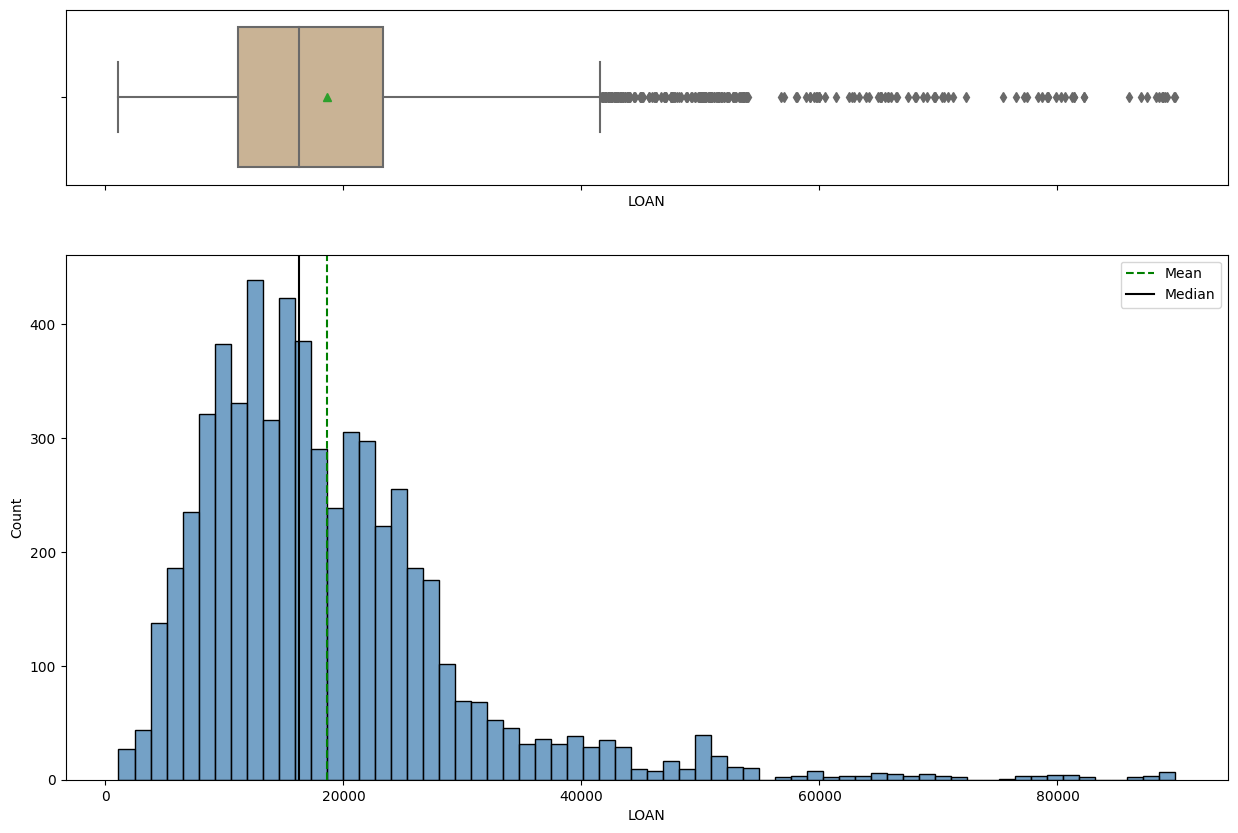

In [ ]:
# Calling boxplot_histogram function for LOAN
boxplot_histogram (data['LOAN'])

**Observations:**

- The LOAN data is slightly right-skewed. The mean and median are relatively close to each other, indicating a distribution that is nearly normal in shape.
- On average, the approved loan amount is 18,607 dollars, with a median of 16,300 dollars.
- The LOAN range is wide, extending from a minimun of 1,100 dollars to a maximum of 89,900 dollars.
- There are many outliers with high loan values.

### Observations on MORTDUE

In [ ]:
# Calling boxplot_histogram function for MORTDUE
boxplot_histogram (data['MORTDUE'])

**Observations:**

- The MORTDUE data exhibits a slight right-skew.
- The average amount due on existing mortgages is 73,760 dollars.
- The graph doesn't display the median when there are missing values in the column.

### Observations on VALUE

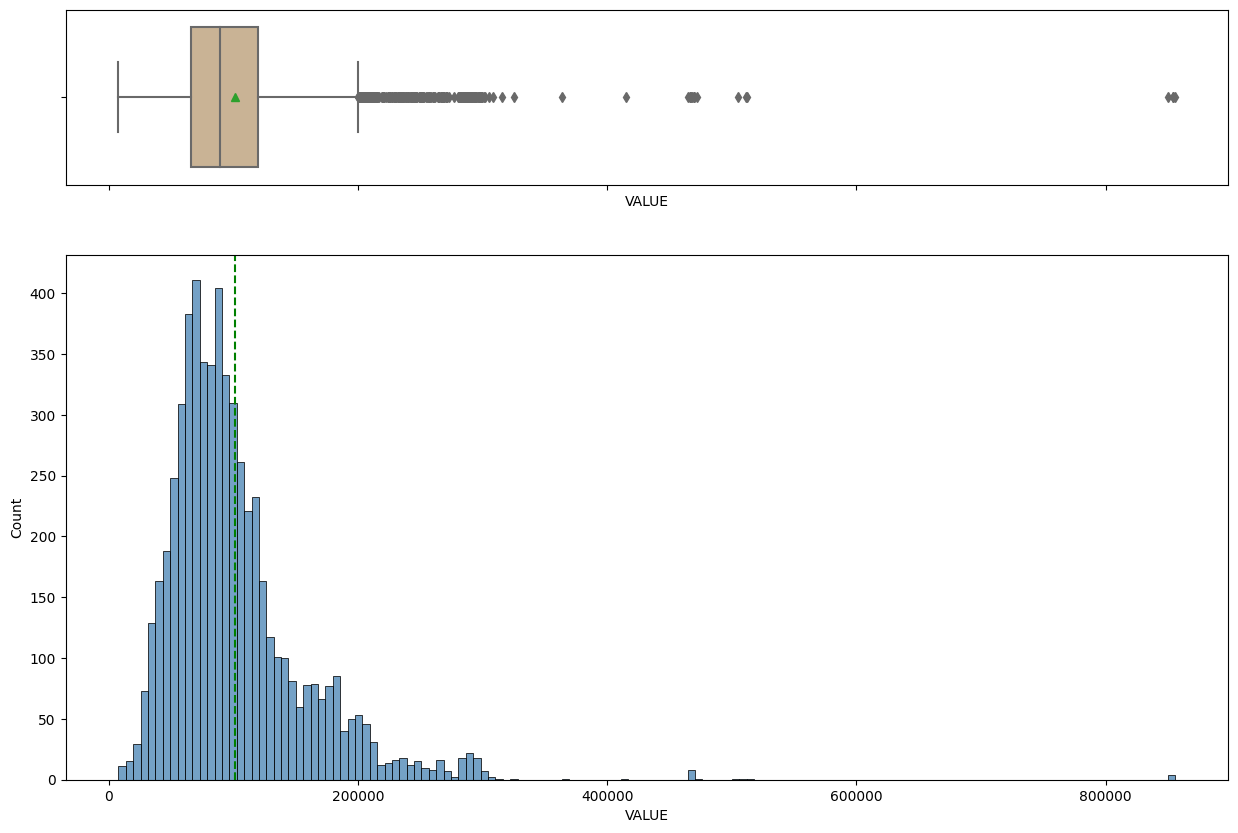

In [ ]:
# Calling boxplot_histogram function for VALUE
boxplot_histogram (data['VALUE'])

**Observations:**

- The VALUE data is slightly right-skewed, with some extreme outliers.
- Extreme values could represent data collection errors or a few properties with values that are disproportionately high.

### Observations on YOJ

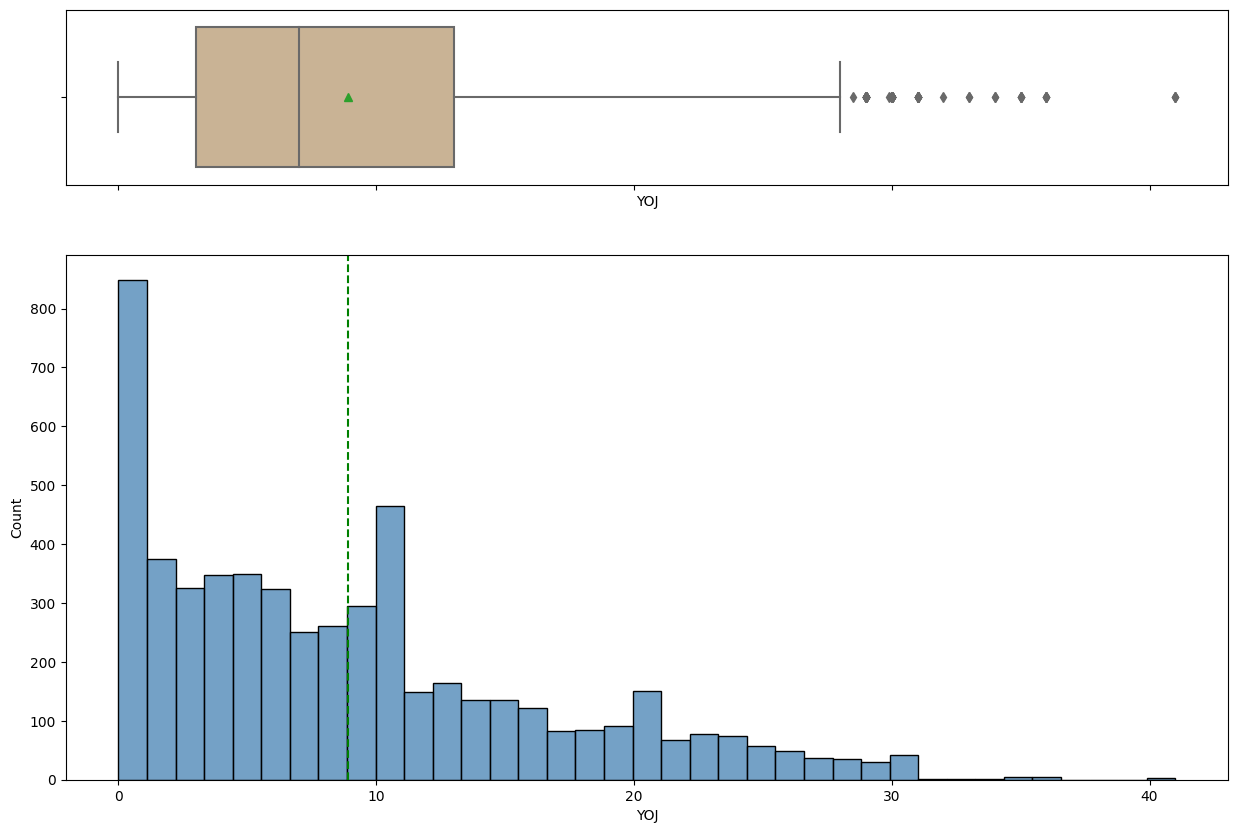

In [ ]:
# Calling boxplot_histogram function for YOJ
boxplot_histogram (data['YOJ'])

**Observations:**

- The YOJ data has a multimodal shape.
- Most customers have less than 10 years at the present job, although there are many with more than ten years, and few outliers with more than 40 years.

### Observations on DEROG

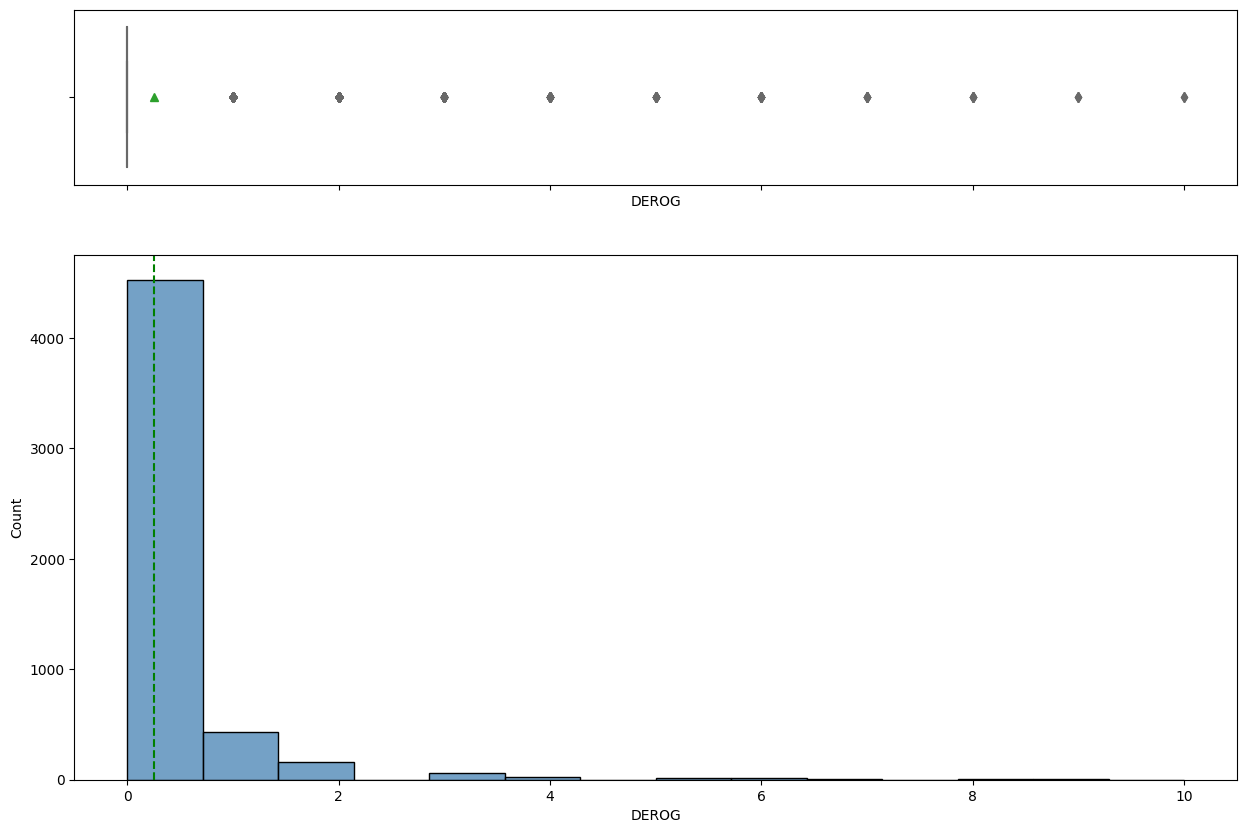

In [ ]:
# Calling boxplot_histogram function for DEROG
boxplot_histogram (data['DEROG'])

**Observations:**

- The DEROG data has a limited range, indicating that most customers have no major derogatory reports. The single most frequent value is 0.
- Approximately 450 customers have a value of 1, and there are few outliers with values as high as 8 or more.

### Observations on DELINQ

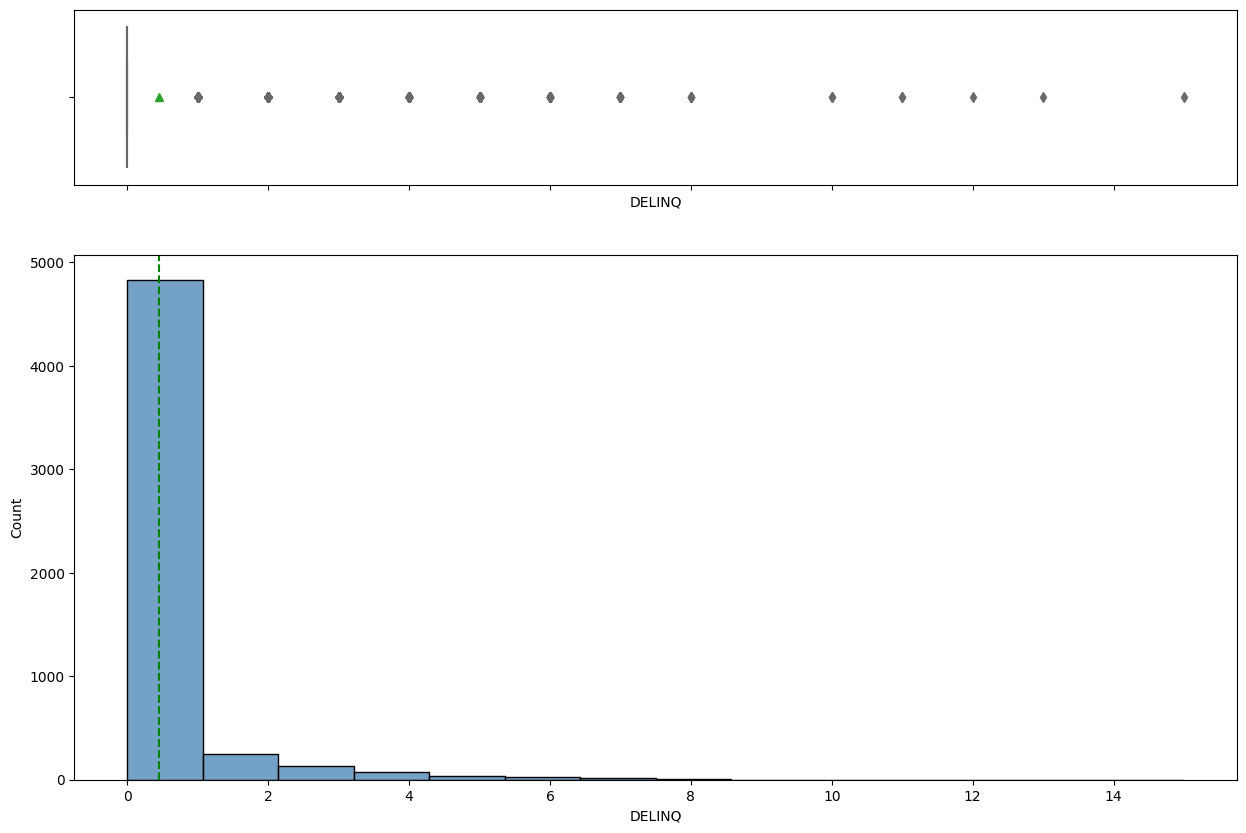

In [ ]:
# Calling boxplot_histogram function for DELINQ
boxplot_histogram (data['DELINQ'])

**Observations:**

- The DELINQ data has a limited range, indicating that most customers have no delinquent credit lines. The single most frequent value is 0.
- Only a few outliers have a value of approximately 8.

### Observations on CLAGE

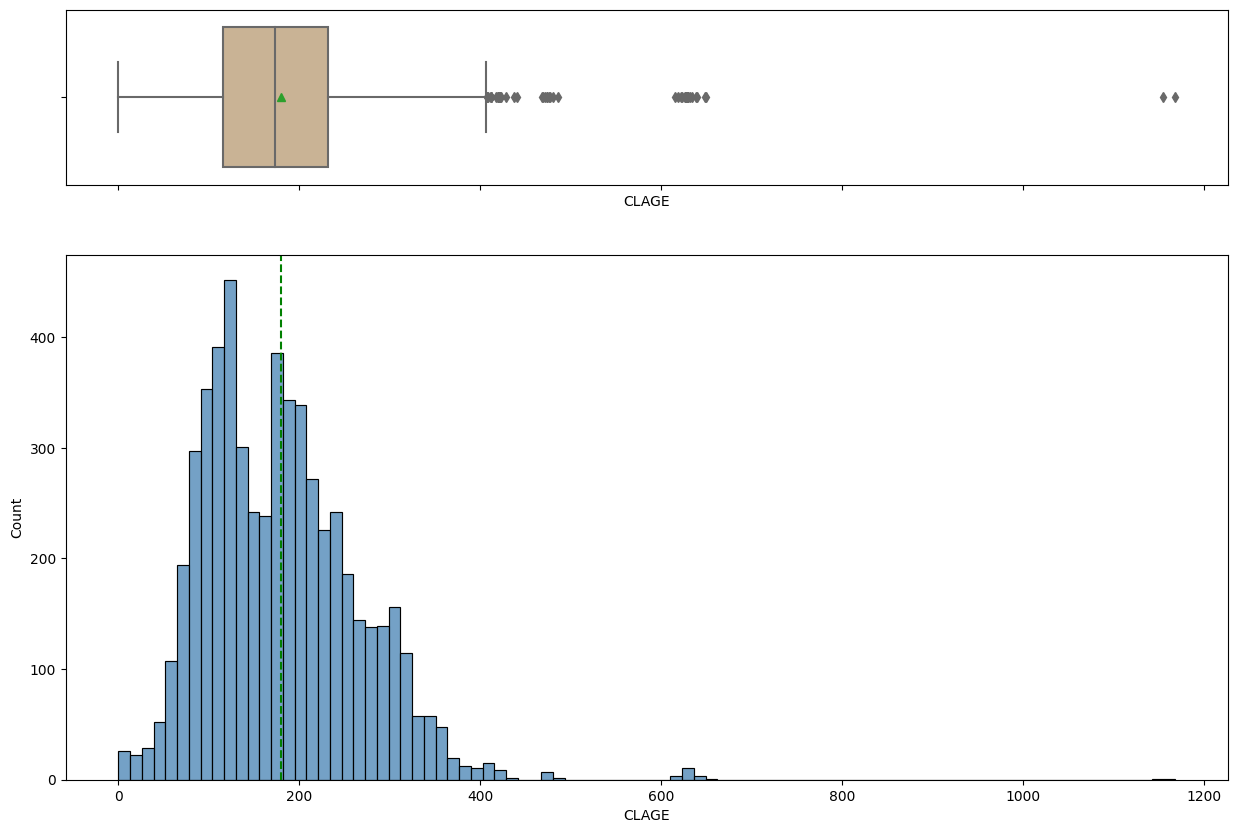

In [ ]:
# Calling boxplot_histogram function for CLAGE
boxplot_histogram (data['CLAGE'])

**Observations:**

- The CLAGE data has a multimodal shape. The mean is relatively close to the median, with some extreme outliers to the right.
- Thus, the experience in managing credit is approximately normally distributed, with an average of 179 months (about 15 years).

### Observations on NINQ

In [ ]:
# Calling boxplot_histogram function for NINQ
boxplot_histogram (data['NINQ'])

**Observation:**

- The NINQ data has a relatively limited range, with 0 as the most frequent value. A few outliers have about 12 inquiries or more.

### Observations on CLNO

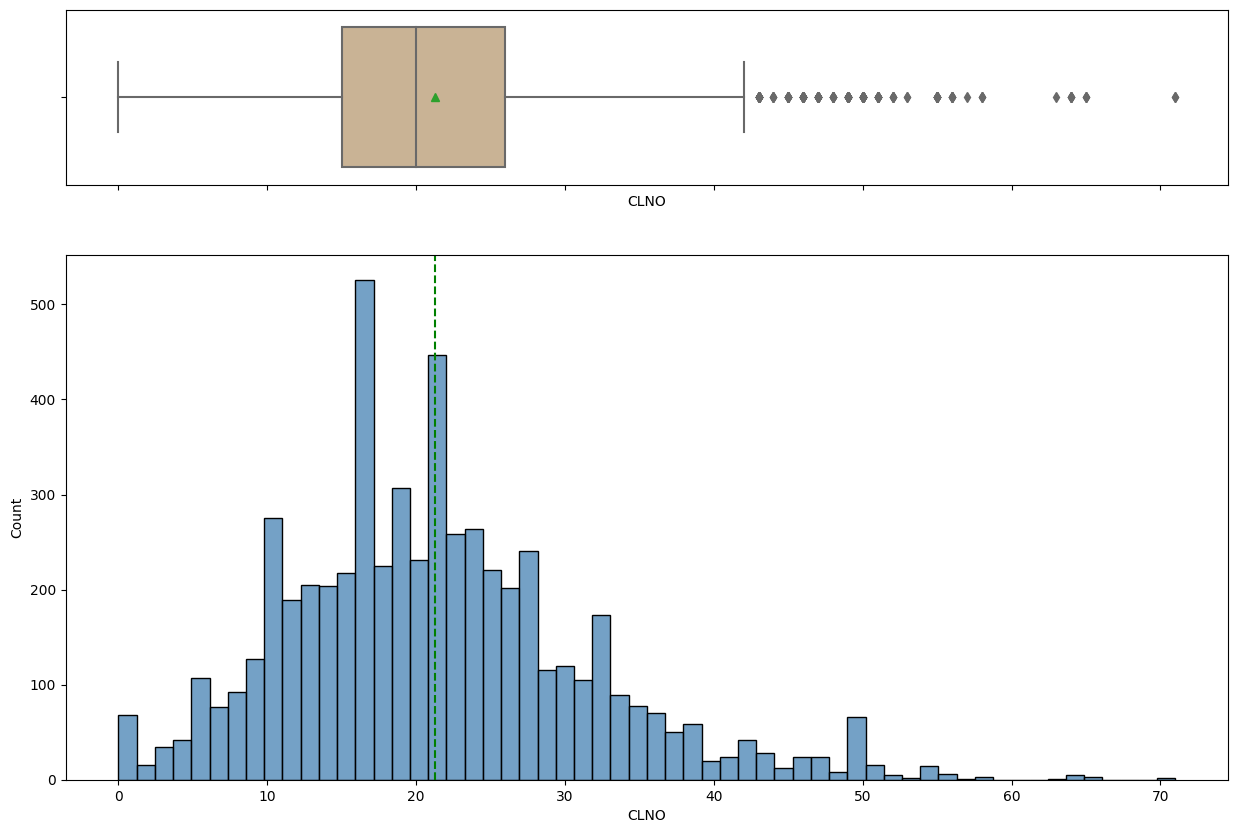

In [ ]:
# Calling boxplot_histogram function for CLNO
boxplot_histogram (data['CLNO'])

**Observations:**

- The CLNO data has a multimodal shape.
- While there are some outliers on the higher end, the bulk of the data clusters around the average of 21. A higher number of credit lines may suggest more experience in credit management, although it could also become a driver of higher credit exposure and eventually higher risk, depending on other variables.

### Observations on DEBTINC

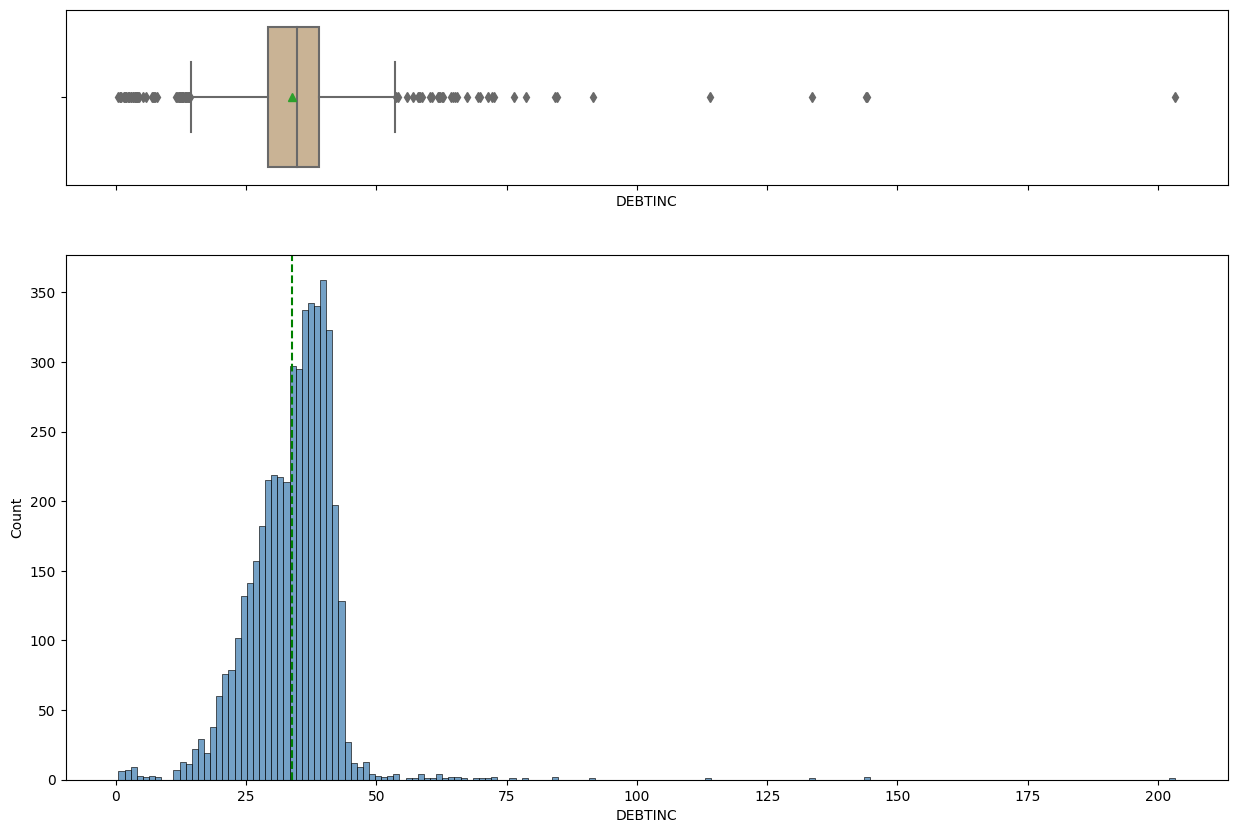

In [ ]:
# Calling boxplot_histogram function for DEBTINC
boxplot_histogram (data['DEBTINC'])

**Observations:**

- The DEBTINC data has a mean of around 30%, with many outliers to the right, including extreme outliers with more than 200%.
- The median being close to the mean suggests that the data distribution is approximately normal. However, the presence of several outliers on the lower end indicates a leftward skew.

### **2. Univariate Analysis - Categorical Data**



In [ ]:
# Function to create barplots with percentage labels for each category

def perc_on_bar(plot, feature):
    '''
    plot: The bar plot axis object from seaborn or matplotlib.
    feature: The categorical feature used to create the bar plot.
    Note: This function won't work if a column is passed in the hue parameter.
    '''

    total = len(feature) # Total number of data points in the feature
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Calculate the percentage
        x = p.get_x() + p.get_width() / 2 # Center of the bar
        y = p.get_y() + p.get_height()    # Top of the bar
        plot.annotate(percentage, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

    # Set the font size of x-axis labels
    plot.set_xticklabels(plot.get_xticklabels(), fontsize=12)

## Observations on JOB

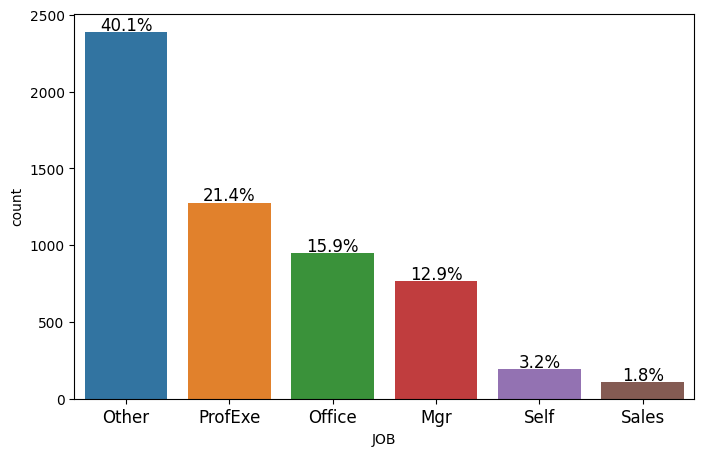

In [ ]:
# Checking the count and percentage of JOB

# Ordering the categories based on frequency for JOB
order = data['JOB'].value_counts().index

# Creating the countplot with the specified order
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='JOB', data=data, palette='tab10', order=order)

# Adding percentage label
perc_on_bar(ax, data['JOB'])

plt.show()

**Observations:**

- The most frequent ocupation class is 'Other', with 40.1%.
- The next most frequent class is 'ProfExe' (21.4%), which is followed by 'Office' (15.9%), and 'Mgr' (12.9%).
- Only 3.2% of customers are in class 'Self', and 1.8% in 'Sales'.

## Observations on REASON

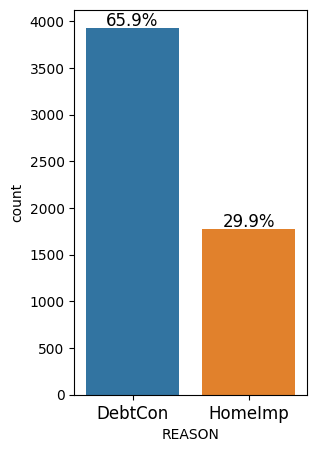

In [ ]:
# Checking the count and percentage of REASON

# Ordering the categories based on frequency for REASON
order = data['REASON'].value_counts().index

# Creating the countplot with the specified order
plt.figure(figsize=(3, 5))
ax = sns.countplot(x='REASON', data=data, palette='tab10', order=order)

# Adding percentage label
perc_on_bar(ax, data['REASON'])

plt.show()

**Observation:**

- The main reason for loan request is debt consolidation, with 65.9%, while the remainig 29.9% is for home improvement.

## Observations on BAD

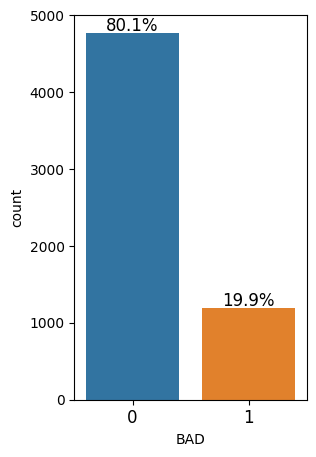

In [ ]:
# Checking the count and percentage of BAD

# Ordering the categories based on frequency for BAD
order = data['BAD'].value_counts().index

# Creating the countplot with the specified order
plt.figure(figsize=(3, 5))
ax = sns.countplot(x='BAD', data=data, palette='tab10', order=order)

# Adding percentage label
perc_on_bar(ax, data['BAD'])

plt.show()

**Observation:**

- About 80.1% of customers don't default, while only 19.9% are likely to default.

0    4771
1    1189
Name: BAD, dtype: int64


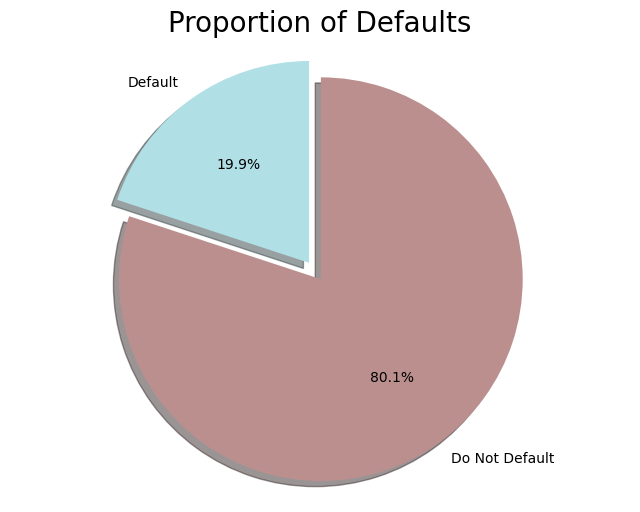

In [ ]:
# Creating a pie chart to visualize the percentage of customer default
print(data.BAD.value_counts())
labels = 'Default', 'Do Not Default'
sizes = [data.BAD[data['BAD']==1].count(), data.BAD[data['BAD']==0].count()]
explode = (0, 0.1)  # only 'explode' the 1st slice (i.e., 'Default')
colors = ['#B0E0E6', '#BC8F8F']
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Defaults', size=20)
plt.show()

**Observation:**

- As noted, only 19.9% of customers are likely to default, versus 80.1% non-defaulers. This class imbalance will need to be taken into account during model building.

## **Bivariate Analysis**

## **1. Bivariate Analysis: Continuous and Categorical Variables**

In [ ]:
# Function for generating histograms and boxplots to visualize the distribution of a predictor variable by target classes

def distribution_plot_wrt_target(data, predictor, target):
    # Extracting the unique values of the target variable
    target_uniq = sorted(data[target].unique())  # Sort to ensure the order [0, 1]

    # Creating a 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # First row: Histograms for each target value
    for i in range(2):
        axs[0, i].set_title(f'Histogram of {predictor} for {target} = {target_uniq[i]}')
        sns.histplot(
            data=data[data[target] == target_uniq[i]],
            x=predictor,
            kde=True,
            ax=axs[0, i],
            color='teal' if i == 0 else 'orange',
        )

    # Second row: Boxplots
    axs[1, 0].set_title(f'Boxplot of {predictor} by {target}')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette='Set2', order=[0, 1])

    axs[1, 1].set_title(f'Boxplot (without outliers) of {predictor} by {target}')
    sns.boxplot(
        data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, palette='Set2', order=[0, 1]
    )

    plt.tight_layout()

### LOAN

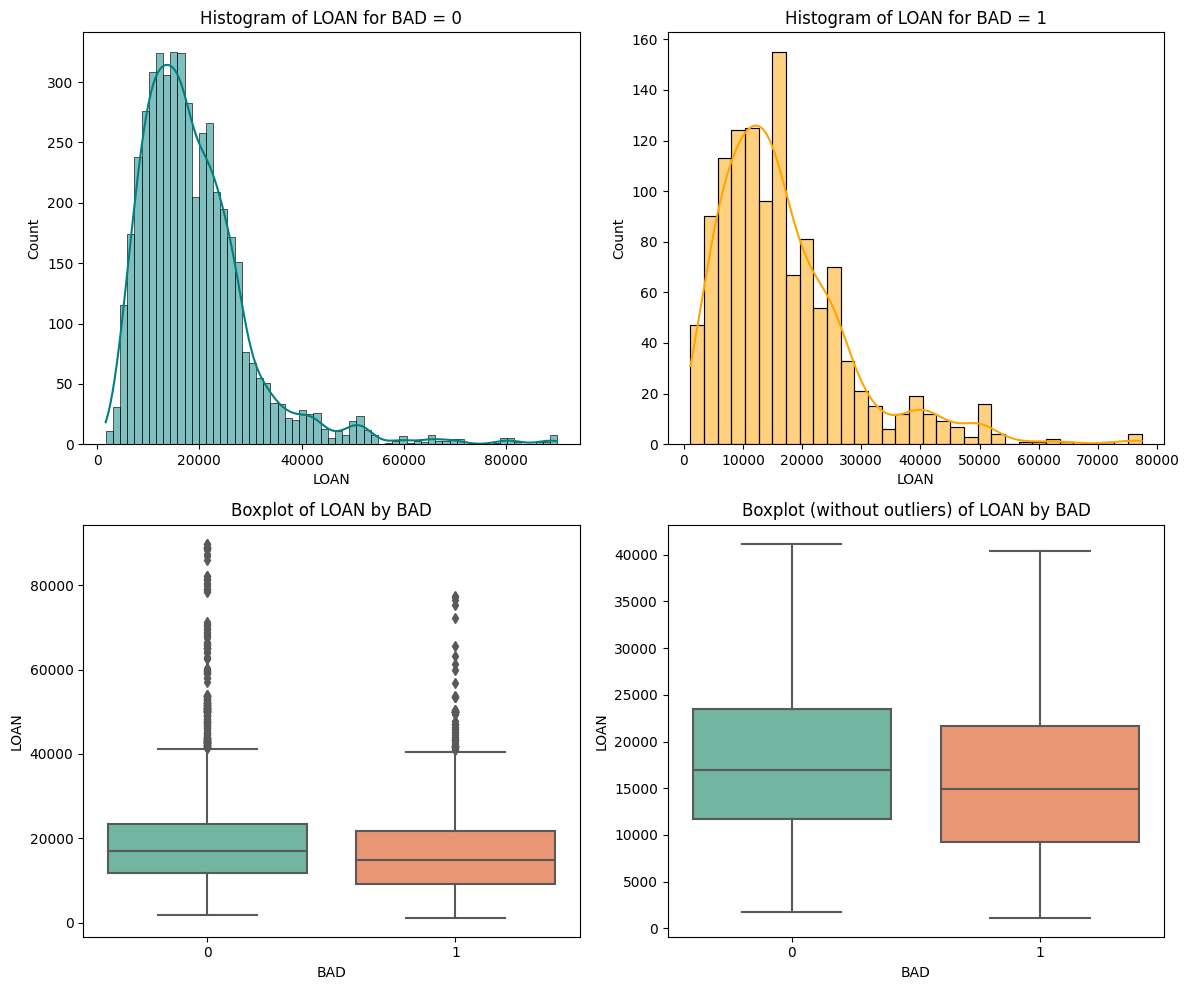

In [ ]:
# Calling the distribution_plot_wrt_target function for LOAN
distribution_plot_wrt_target(data, 'LOAN', 'BAD')

**Observations:**

- The LOAN distributions for both non-defaulters (class 0) and defaulters (class 1) show some similarities. Generally, the loan amounts for both classes average around 18,000 dollars, with some cases extending up to approximately 80,000 dollars, indicating outliers.
- Non-defaulters tend to have marginally higher maximum loan amounts and a greater median loan amount.
- Importantly, a higher loan amount does not necessarily equate to an increased risk of default, suggesting that other variables are also important in determining the risk of default.

### MORTDUE

In [ ]:
# Calling the distribution_plot_wrt_target function for MORTDUE
distribution_plot_wrt_target(data, 'MORTDUE', 'BAD')

**Observations:**

- The MORTDUE data has similar distributions for defaulters and non-defaulters, with both having an average of about 74,000 dollars.
- Both classes have several outliers, although non-defaulters have a slightly higher median.
- This suggests that a higher mortgage doesn't necessarily correlate with a higher likelihood of default.

### VALUE

In [ ]:
# Calling the distribution_plot_wrt_target function for VALUE
distribution_plot_wrt_target(data, 'VALUE', 'BAD')

**Observation:**

- The VALUE data presents similar distributions among defaulters and non-defaulters. Defaulters have a few extreme outliers.

### YOJ

In [ ]:
# Calling the distribution_plot_wrt_target function for YOJ
distribution_plot_wrt_target(data, 'YOJ', 'BAD')

**Observation:**

- The YOJ data shows similar distributions for both defaulters and non-defaulters.

### DEROG

In [ ]:
# Calling the distribution_plot_wrt_target function for DEROG
distribution_plot_wrt_target(data, 'DEROG', 'BAD')

**Observations:**

- The DEROG data has a wider range among defaulters than non-defaulters.
- The number of derogatory reports is higher for defaulters, which also have more outliers.

### DELINQ

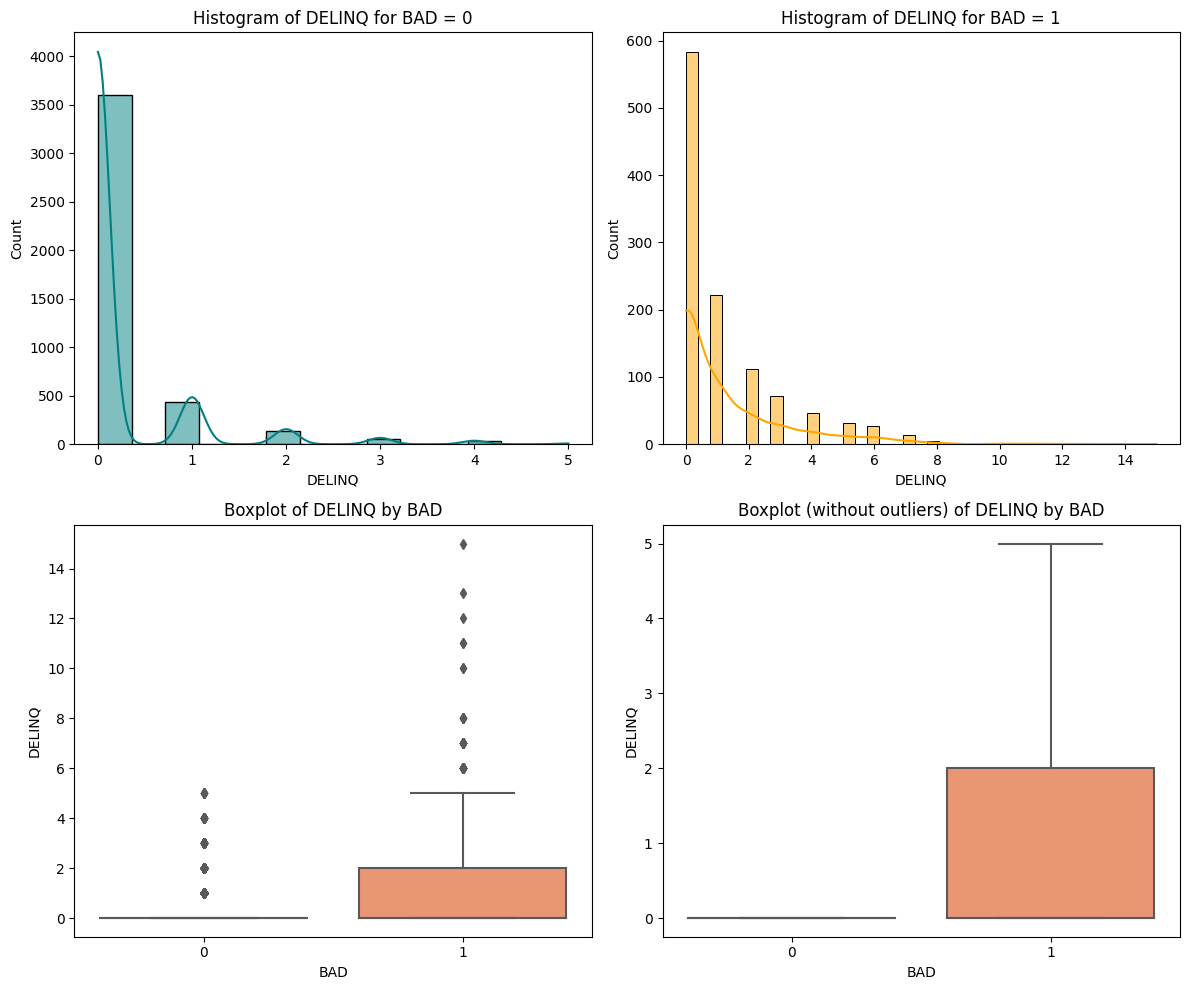

In [ ]:
# Calling the distribution_plot_wrt_target function for DELINQ
distribution_plot_wrt_target(data, 'DELINQ', 'BAD')

**Observations:**

- The DELINQ data has a wider range among defaulters than non-defaulters.
- The number of delinquent credit lines is higher for defaulters, which also have more outliers.

### CLAGE

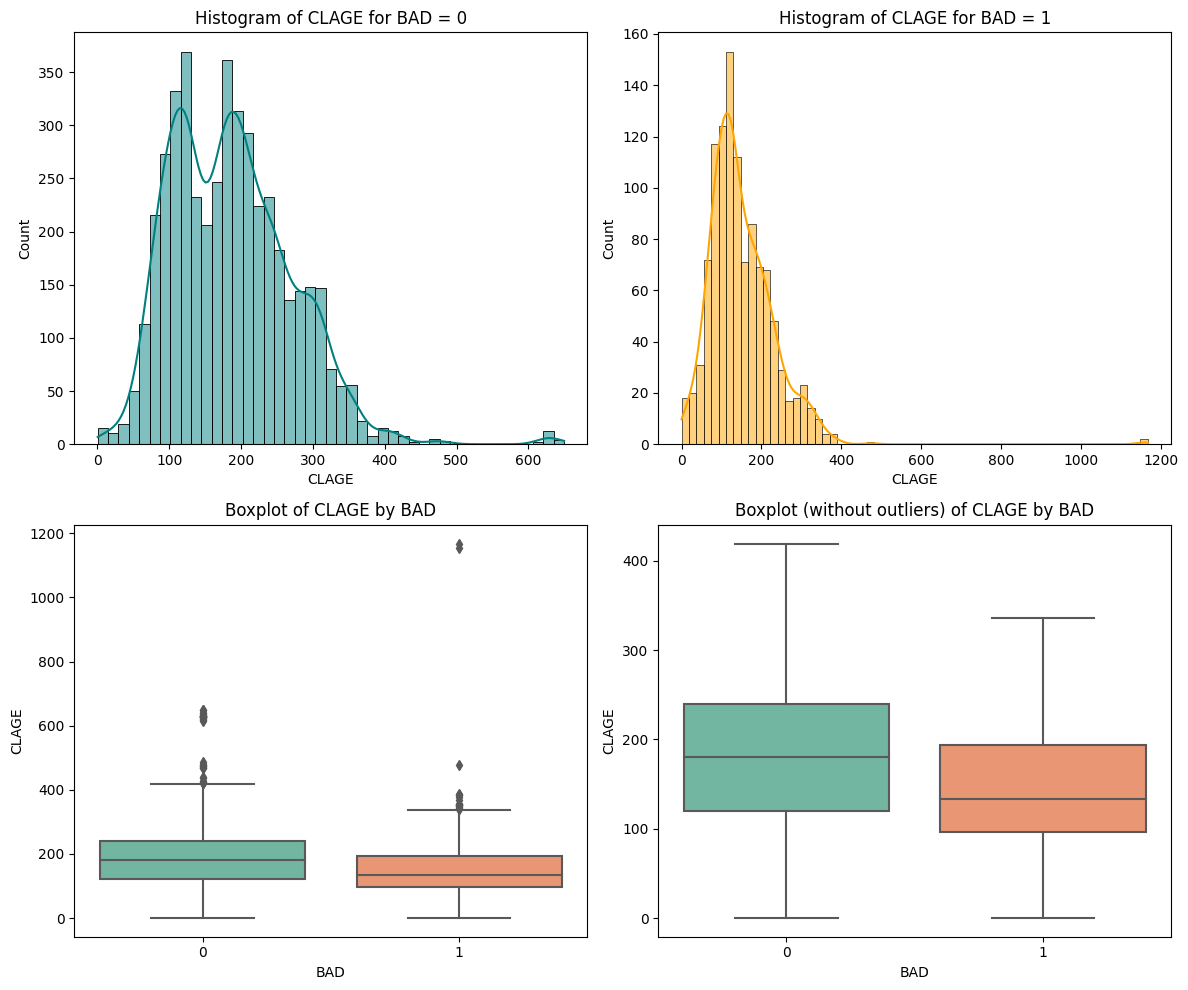

In [ ]:
# Calling the distribution_plot_wrt_target function for CLAGE
distribution_plot_wrt_target(data, 'CLAGE', 'BAD')

**Observations:**

- Non-defaulters typically have a higher CLAGE median, suggesting a lower default risk associated with a higher CLAGE.

### NINQ

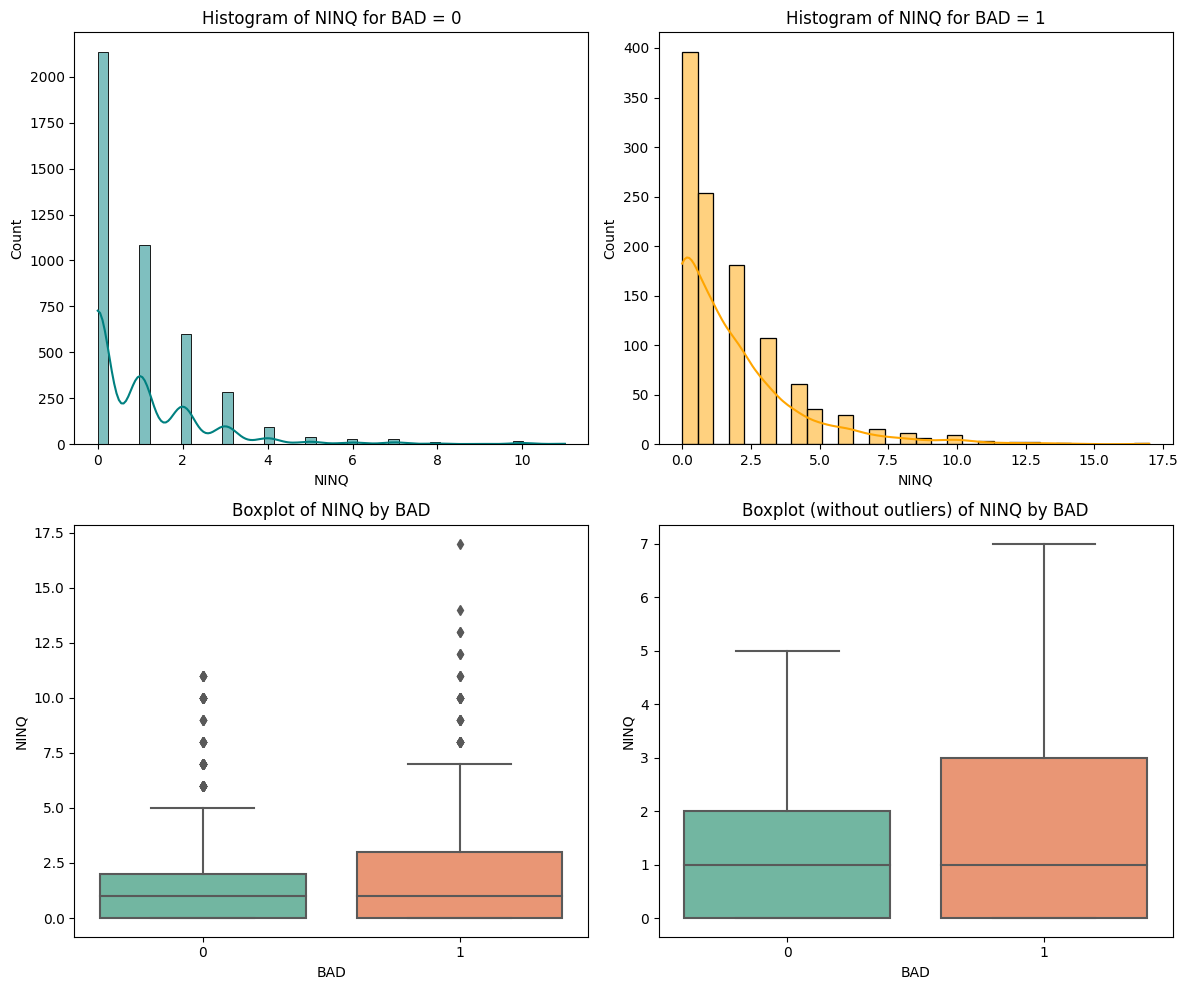

In [ ]:
# Calling the distribution_plot_wrt_target function for NINQ
distribution_plot_wrt_target(data, 'NINQ', 'BAD')

**Observations:**

- The NINQ data has a wider range among defaulters than non-defaulters.
- The number of recent credit inquiries is higher for defaulters, which also have more outliers.

### CLNO

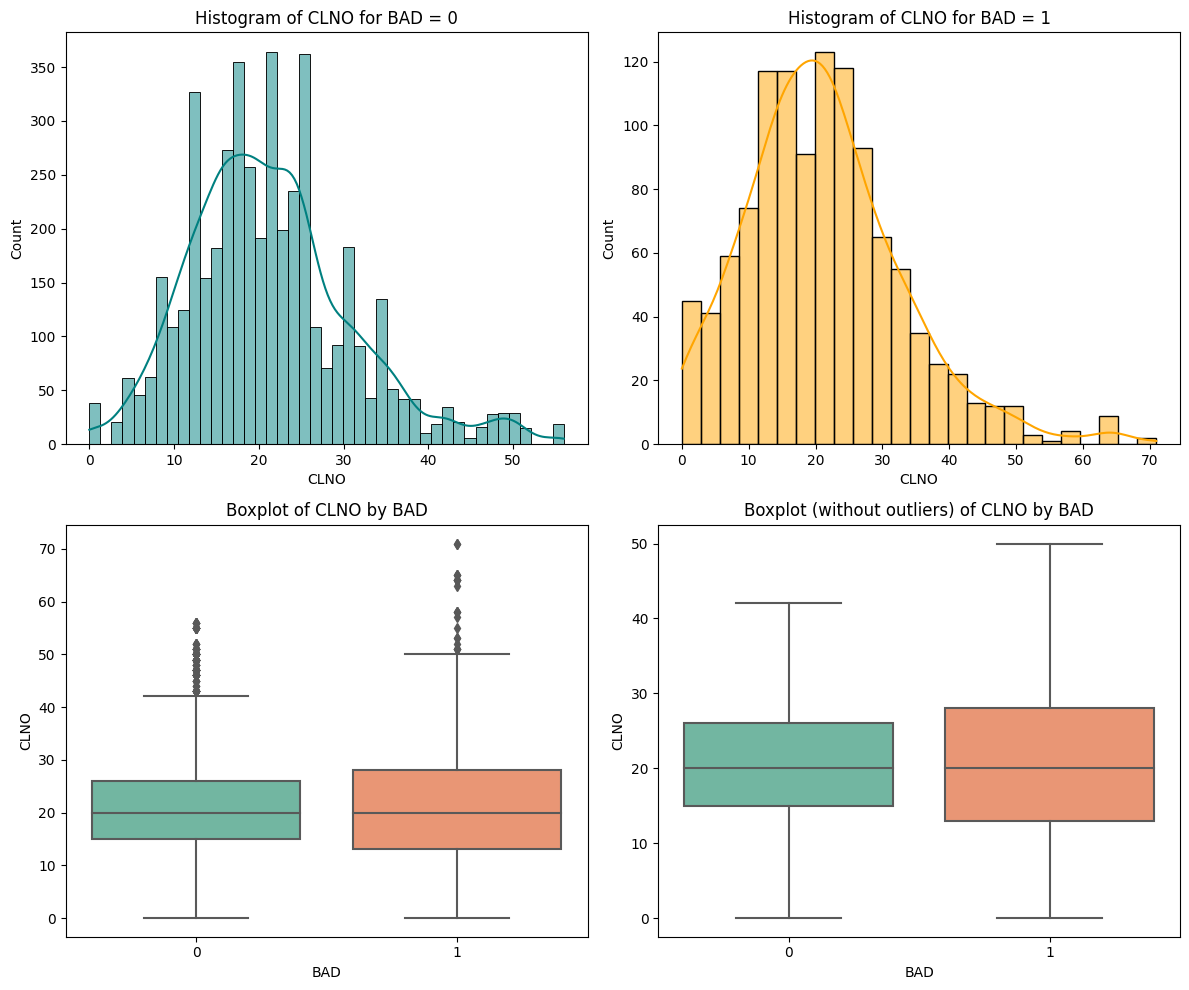

In [ ]:
# Calling the distribution_plot_wrt_target function for CLNO
distribution_plot_wrt_target(data, 'CLNO', 'BAD')

**Observation:**

The CLNO data has a similar distribution among defaulters and non-defaulters. Non-defaulters have a few more outliers.

### DEBTINC

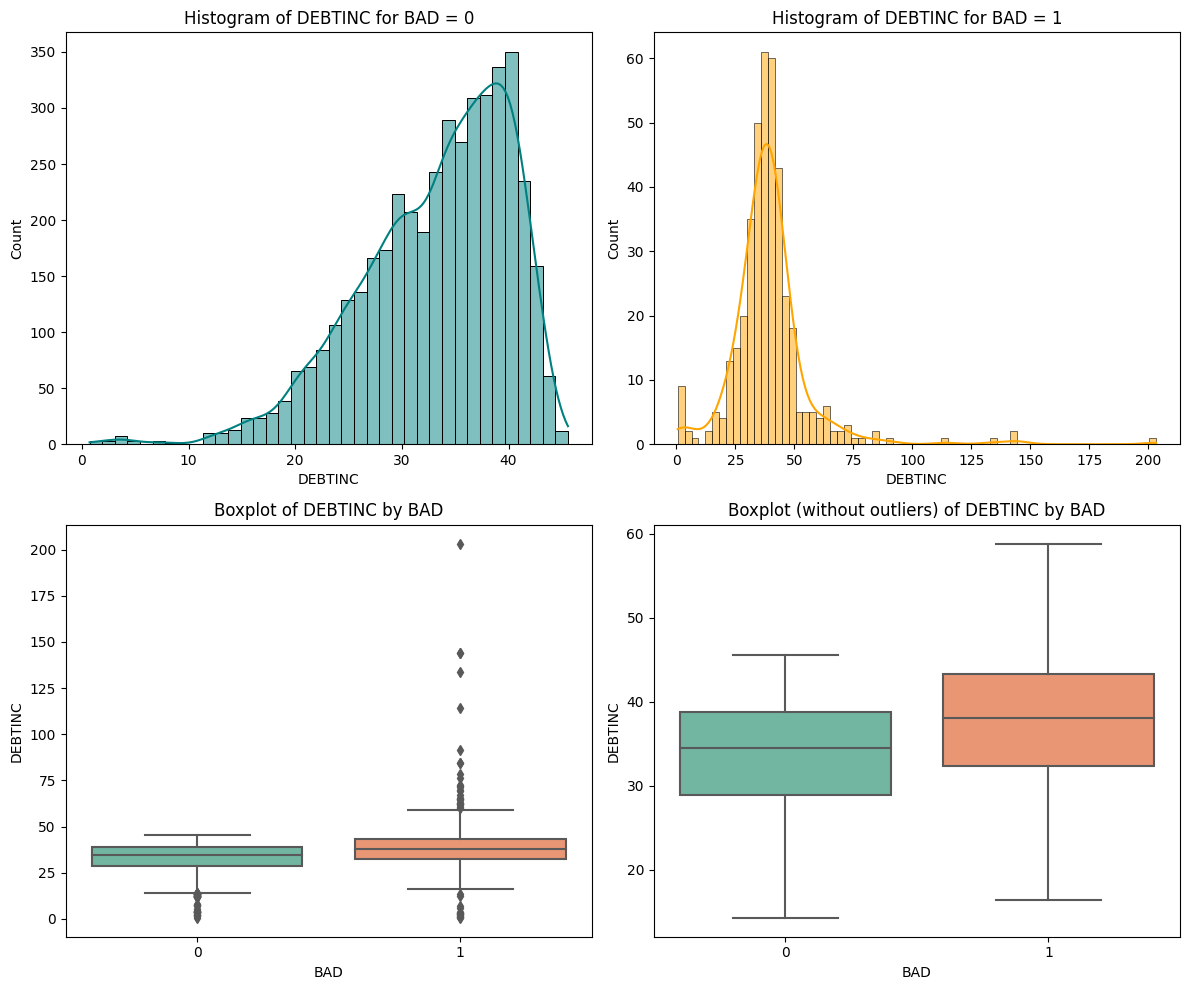

In [ ]:
# Calling the distribution_plot_wrt_target function for DEBTINC
distribution_plot_wrt_target(data, 'DEBTINC', 'BAD')

**Observations:**

- The DEBTINC data exhibits a distinct distribution between defaulters and non-defaulters, suggesting its potential as a predictive factor.
- For non-defaulters, the distribution is left-skewed with a lower median value.
- The distribution for defaulters shows numerous right-skewed outliers, including some extreme values.

## **2. Bivariate Analysis: Two Continuous Variables**

### MORTDUE vs VALUE

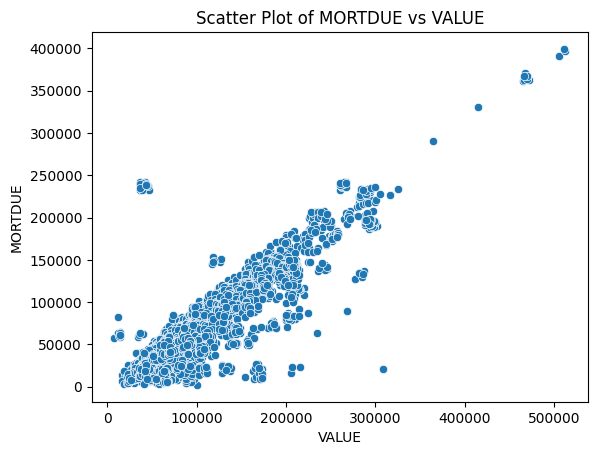

In [ ]:
# Checking for the correlation between VALUE and MORTDUE
sns.scatterplot(x=data['VALUE'], y=data['MORTDUE'], palette='PuBu')
plt.title('Scatter Plot of MORTDUE vs VALUE')
plt.show()

**Observations:**

- There is a strong positive correlation between VALUE and MORTDUE. The higher the value of the property, the higher the amount due on the existing mortgage.
- This may be reflective of customers with higher incomes purchasing more expensive properties, which in turn leads to higher mortgage amounts.
- We will check for potential multicollinearity in linear-based models.

### LOAN vs VALUE

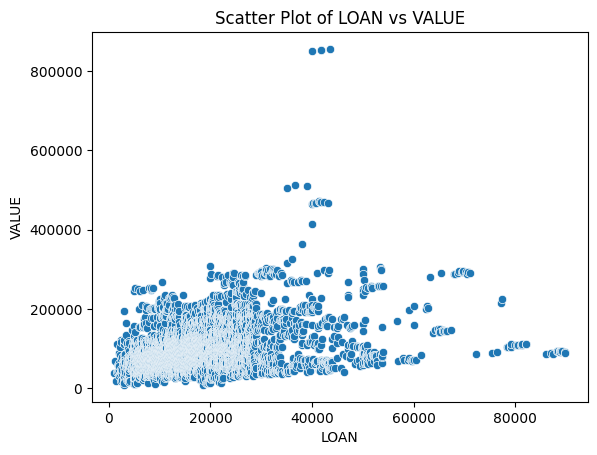

In [ ]:
# Checking for the correlation between LOAN and VALUE
sns.scatterplot(x=data['LOAN'], y=data['VALUE'], palette='PuBu')
plt.title('Scatter Plot of LOAN vs VALUE')
plt.show()

**Observations:**

- There is a weak but positive correlation between LOAN and VALUE. This indicates that, generally, higher property values are associated with higher loan amounts, though the relationship is not strong.
- The relatively weak correlation might be attributed to the presence of numerous debt consolidation loans, which often have lower values compared to mortgages.

### CLNO vs CLAGE

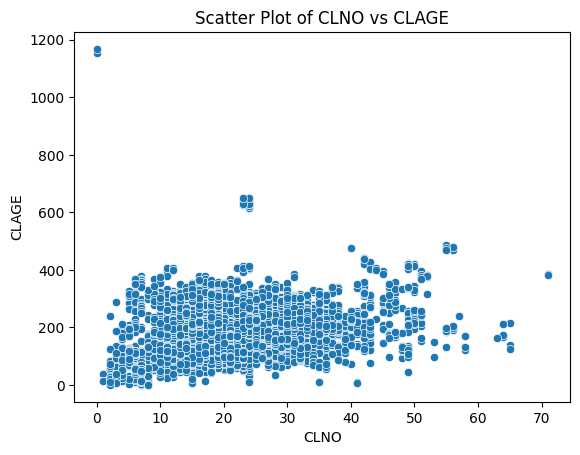

In [ ]:
# Checking for the correlation between CLNO and CLAGE
sns.scatterplot(x=data['CLNO'], y=data['CLAGE'], palette='PuBu')
plt.title('Scatter Plot of CLNO vs CLAGE')
plt.show()

**Observation:**

- There is a weak but positive correlation between CLNO and CLAGE. This indicates that, generally, a higher number of existing credit lines is associated with longer customer experience in credit management, though the relationship is not strong.

### MORTDUE vs CLNO

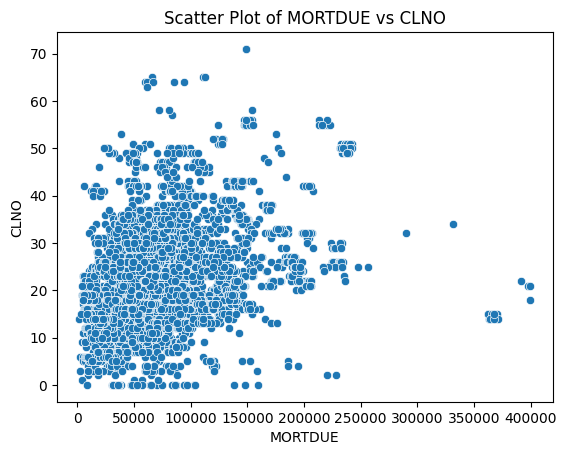

In [ ]:
# Checking for the correlation between MORTDUE and CLNO
sns.scatterplot(x=data['MORTDUE'], y=data['CLNO'], palette='PuBu')
plt.title('Scatter Plot of MORTDUE vs CLNO')
plt.show()

**Observation:**

There is a weak positive correlation between MORTDUE and CLNO. This indicates that a higher mortgage is associated with higher number of existing credit lines, but the relationship is not strong.

### CLNO vs VALUE

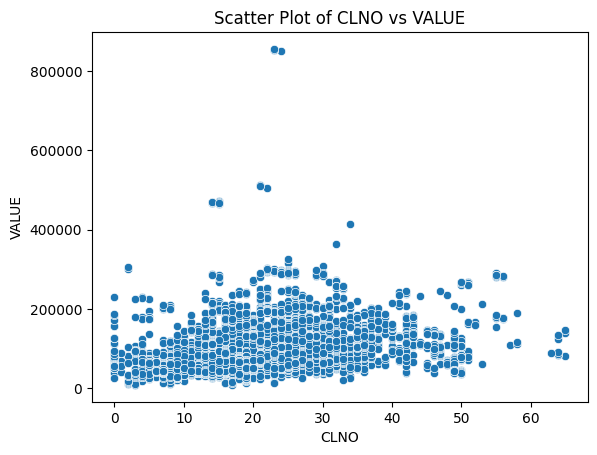

In [ ]:
# Checking for the correlation between CLNO and VALUE
sns.scatterplot(x=data['CLNO'], y=data['VALUE'], palette='PuBu')
plt.title('Scatter Plot of CLNO vs VALUE')
plt.show()

**Observations:**

- There is a weak positive correlation between CLNO and VALUE. This means that higher number of existing credit lines are associated with higher value of the property, but the relationship is not strong.
- This also reflects that the information contained in VALUE and MORTDUE is related or similar, as both variables correlate to a third variable (CLAGE) similarly. We will check if this pattern persists with other variables in the pairplot below.

### DELINQ vs LOAN

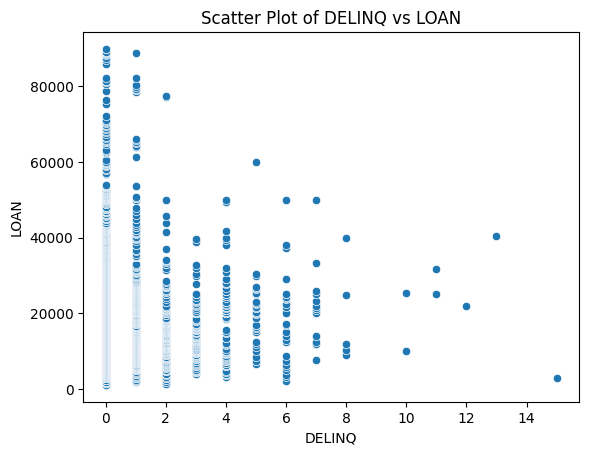

In [ ]:
# Checking for the correlation between DELINQ and LOAN
sns.scatterplot(x=data['DELINQ'], y=data['LOAN'], palette='PuBu')
plt.title('Scatter Plot of DELINQ vs LOAN')
plt.show()

**Observations:**

- There is a weak negative correlation between DELINQ and LOAN. As the number of delinquency reports increases, the amount of the loan decreases, but the relationship is not strong.
- Also, we could expect to see more defaults associated with higher number of delinquency reports. We will verify this in the pairplot below, which enables us to check correlations across all variables.

## **3. Bivariate Analysis: BAD vs Categorical Variables**

In [ ]:
# Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    with sns.axes_style('darkgrid'):
        # Calculate and display the crosstab values
        tab1 = pd.crosstab(x, data['BAD'], margins=True)
        print(tab1)
        print('-' * 120)

        # Define 'tab' as the normalized crosstab
        tab = pd.crosstab(x, data['BAD'], normalize='index')

        # Calculate and plot each category
        ax = tab.plot(kind='bar', stacked=True, figsize=(10, 5), color=['steelblue', 'lightcoral'])

        # Set the legend
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

        # Set x-tick labels to be horizontal
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

        plt.show()

### Stacked Bar Plot of REASON and BAD

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


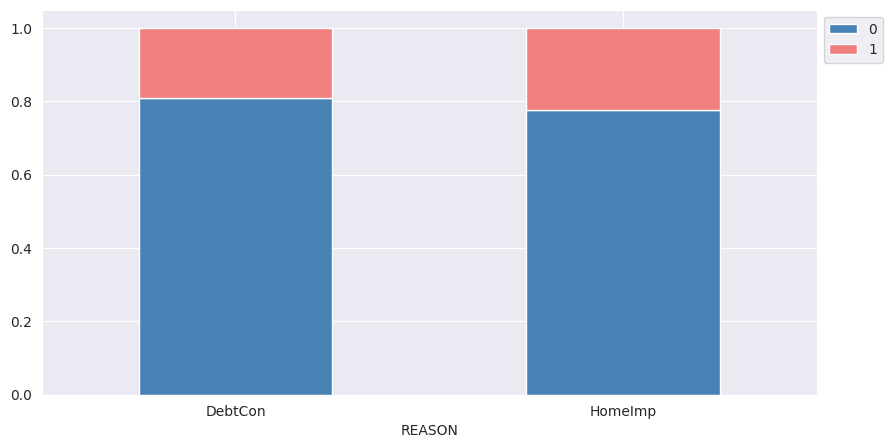

In [ ]:
# Calling stacked_plot function for REASON
stacked_plot(data['REASON'])

**Observation:**

The likelihood of default is slightly higher among loans for home improvement than among loans for debt consolidation.

### Stacked Bar Plot of JOB and BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


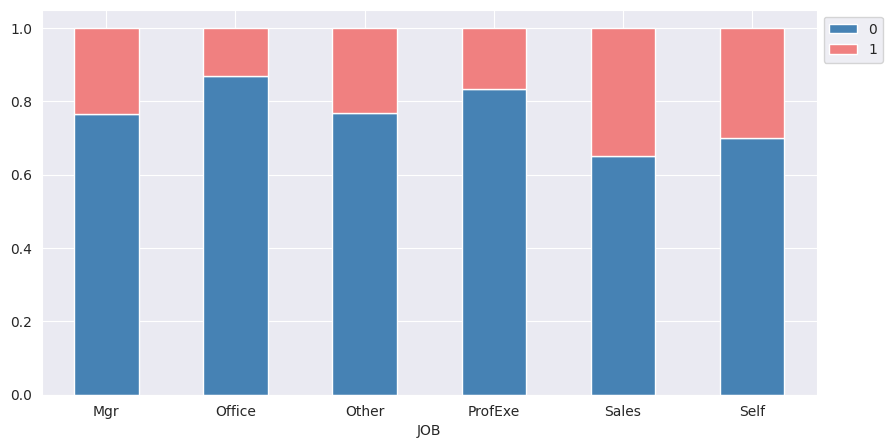

In [ ]:
# Calling stacked_plot function for JOB
stacked_plot(data['JOB'])

**Observations:**

- 'Sales' and 'Self' categories have the highest default rates.
- 'ProfExe' and 'Office' categories exhibit the lowest default rates.
- 'Other' job class is intermediate, similar to 'Mgr' class.

### **Multivariate Analysis**

### Heatmap of Correlation Between Numerical Variables

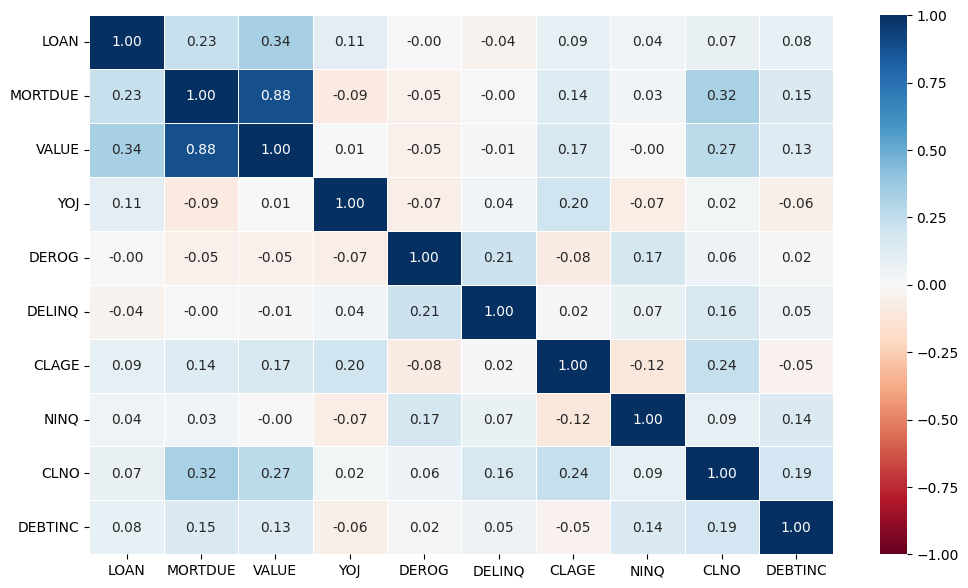

In [ ]:
# Selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# Creating heatmap to visualize correlation matrix of the selected columns
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='RdBu', linewidths=0.5, linecolor='white'
)
plt.show()

**Observations:**

- As noted, there is a strong positive correlation between MORTDUE and VALUE.
- The similar correlations for MORTDUE and VALUE with variables such as DEBTINC, CLNO, NINQ, CLAGE, and DELINQ, suggest that MORTDUE and VALUE may provide similar information.
- There is a weak positive correlation among several variables. Notably, this includes correlations between VALUE and LOAN, and between MORTDUE and LOAN.
- Several variables exhibit weak negative correlations. For instance, CLAGE and NINQ are inversely related, suggesting that customers with more extensive credit management experience tend to have fewer recent credit inquiries.

### Pairplot of Correlation Between Numerical Variables by BAD

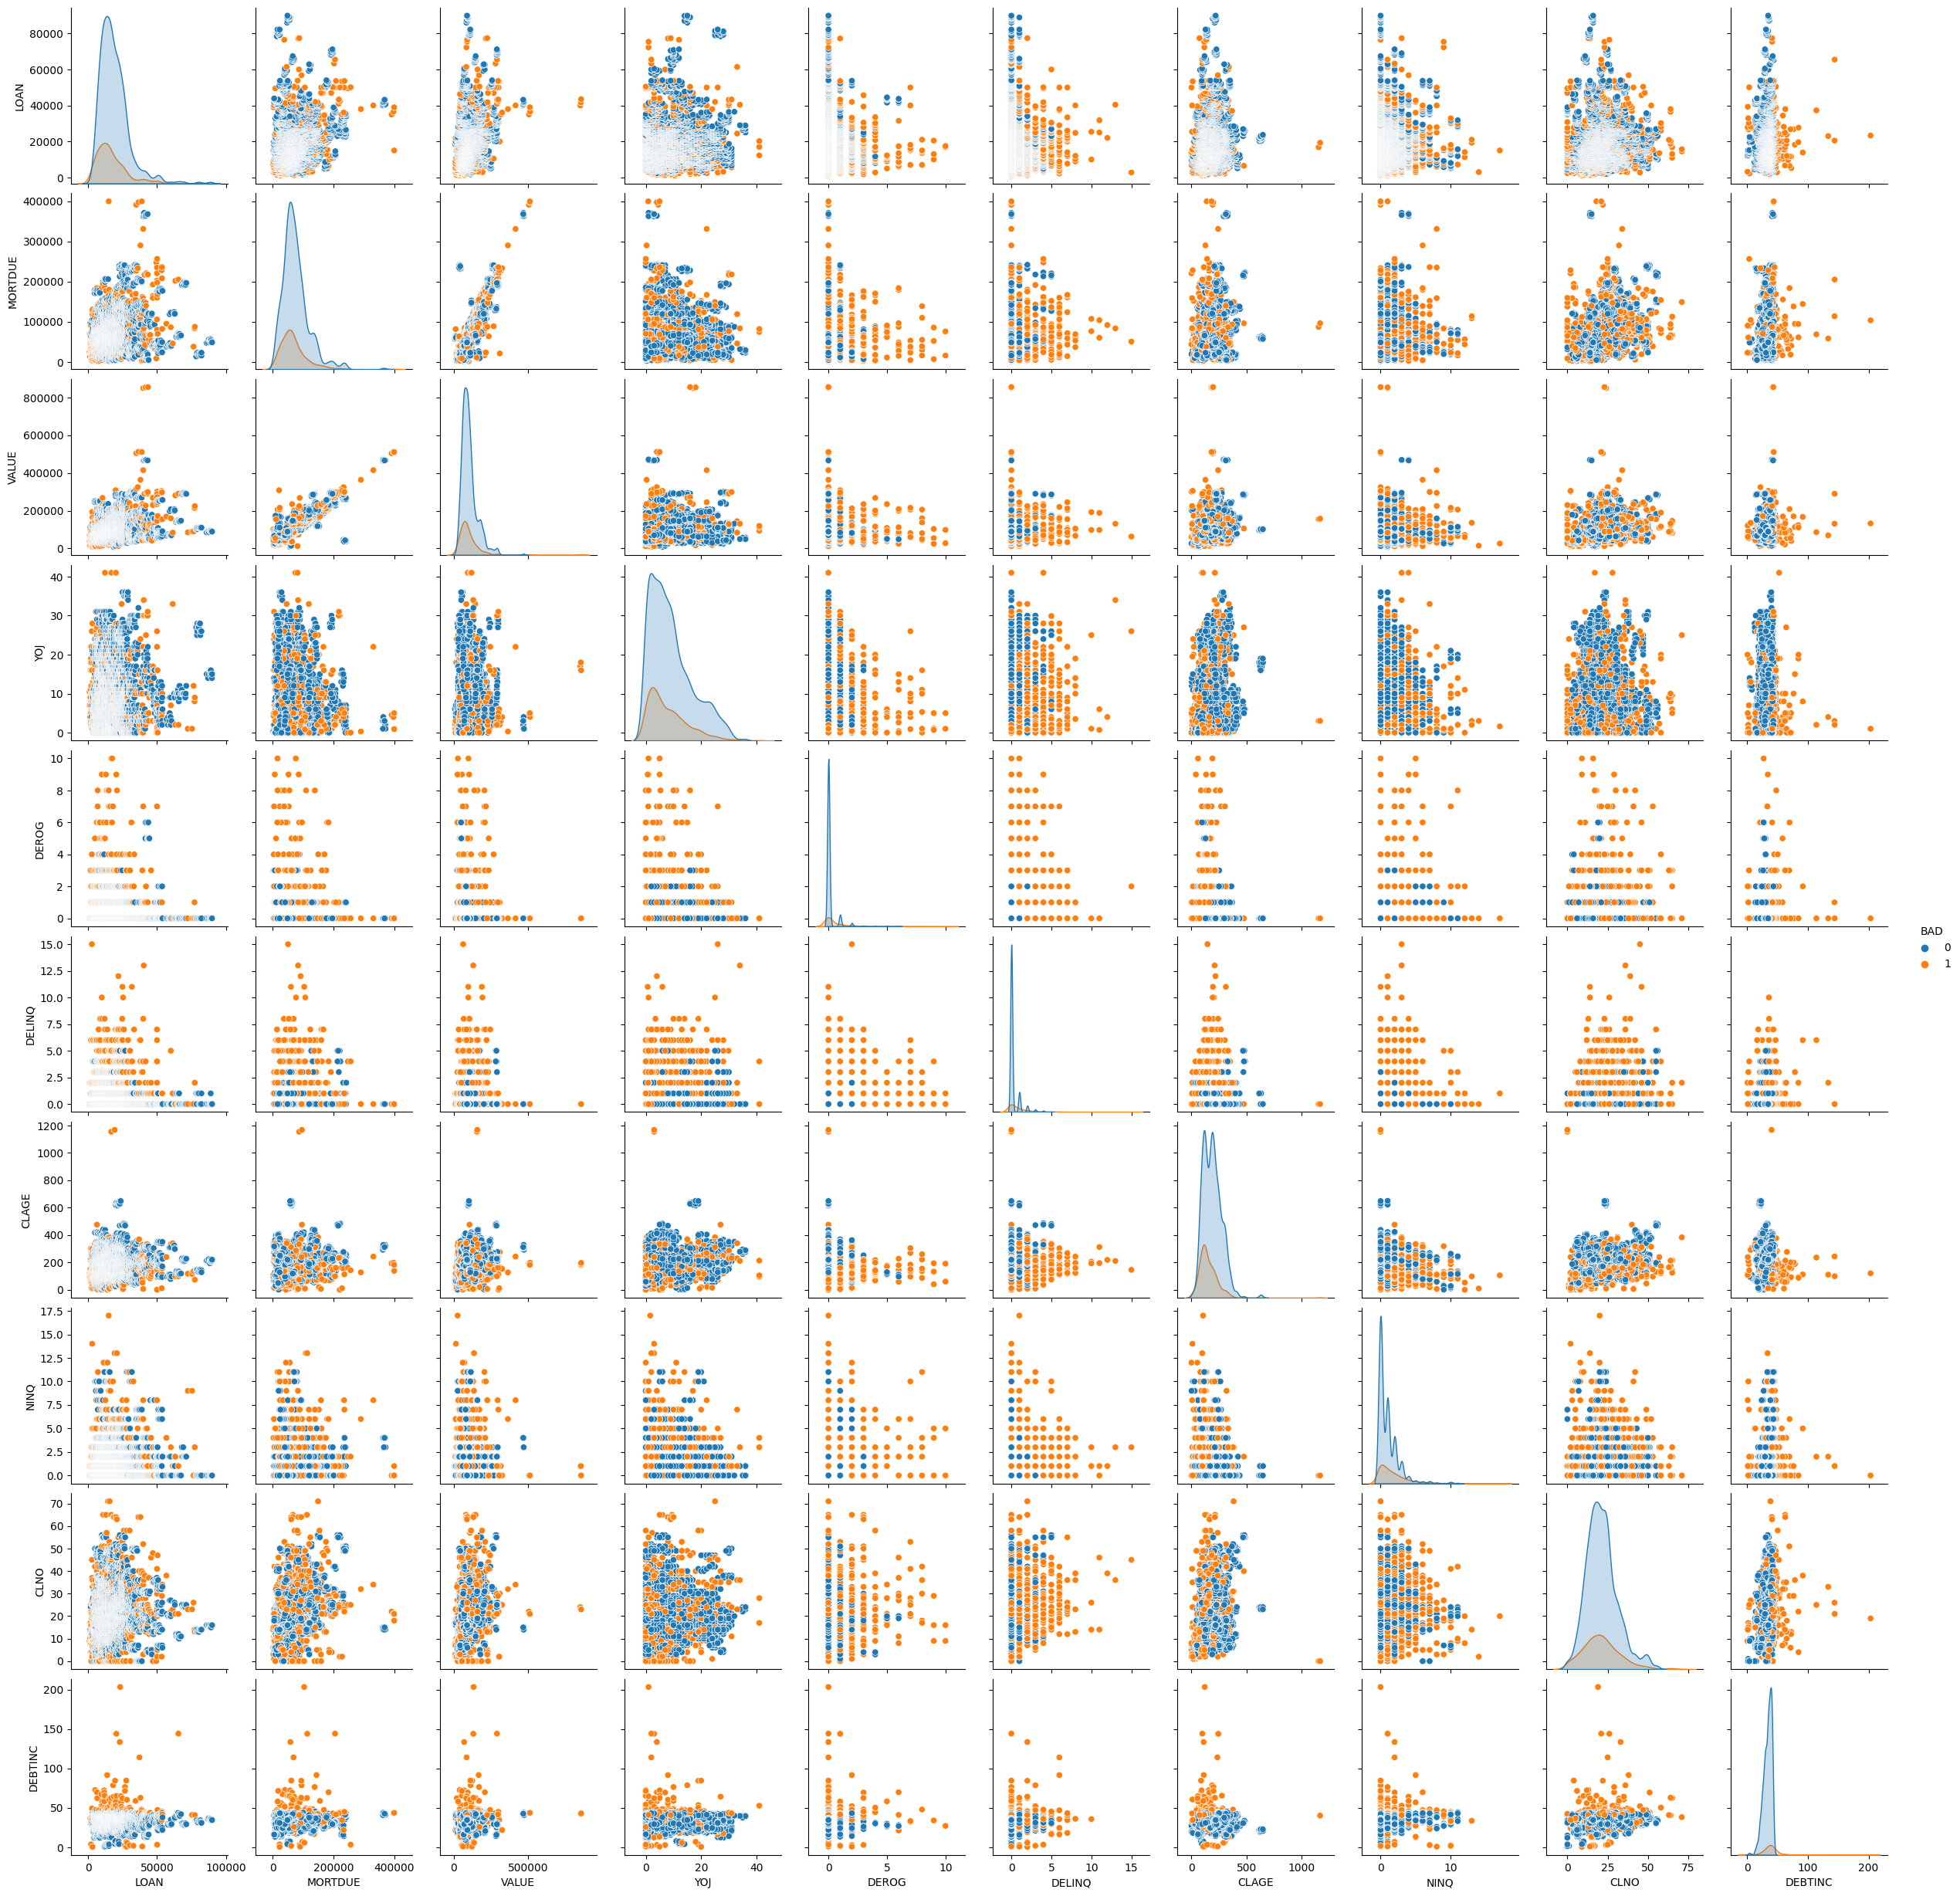

In [ ]:
# Displaying pairplot
sns.pairplot (data, hue='BAD')
plt.show()

**Observations:**

- The most notable positive correlation in the dataset is observed between VALUE and MORTDUE.
- Higher DEBTINC is linked with an increased likelihood of default. This makes sense, as higher leverage is associated with greater credit risk.
- Delinquency-related variables also seem to be associated with a higher probability of default. This is particularly evident in DELINQ, DEROG, and to a lower exent, in NINQ.
- Outliers are present in several variables, with some exhibiting extreme values, such as DEBTINC, VALUE, and CLAGE.

## Treating Outliers

**Considering the outliers in the dataset, the IQR method is a reasonable approach for treatment, preserving dataset integrity while mitigating outlier effects.**

In [ ]:
# Function for treating outliers with the IQR method

def treat_outliers (df, col):
    '''
    Treats outliers in a variable.
    df: the dataframe.
    col: str, name of the numerical variable.
    '''

    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  # Define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # Define upper whisker

    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    # All values smaller than Lower_Whisker are assigned the value of Lower_Whisker
    # All values above Upper_Whisker are assigned the value of Upper_Whisker

    return df

def treat_outliers_all (df, col_list):
    '''
    Treat outliers in all numerical variables.
    df: the dataframe.
    col_list: list, list of numerical variables.
    '''
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
# Copying the data to a different variable to avoid making changes to the original data
df_raw = data.copy()

# Selecting numerical columns
num_cols = df_raw.select_dtypes(include=np.number).columns.tolist()

# Creating a dataframe with treated outliers
df = treat_outliers_all (df_raw, num_cols)

In [ ]:
# Checking the dataframe first 5 rows
df.describe()

LOAN        MORTDUE          VALUE          YOJ   DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.0   
mean   18051.895973   71566.093752   98538.057633     8.873159     0.0   
std     9252.565294   37203.654400   45070.800236     7.430914     0.0   
min     1100.000000    2063.000000    8000.000000     0.000000     0.0   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.0   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.0   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.0   
max    41600.000000  159306.000000  200447.375000    28.000000     0.0   

       DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.0  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.0   178.635811     1.093394    21.032851    33.681973  
std       0.0    80.495471     1.372692     9.420239     7.135236  
min       0.0     0.000000     0.000000     0.000000    14.345367  
25%       0.0   115.116702     0.000000    15.000000    29.140031  
50%       0.0   173.466667     1.000000    20.000000    34.818262  
75%       0.0   231.562278     2.000000    26.000000    39.003141  
max       0.0   406.230642     5.000000    42.500000    53.797805

**Observation:**

- By applying the IQR method, outliers have been effectively addressed. Notably, the maximum value across the data is now capped within 1.5 times the IQR. For example, the few outliers with DEBTINC of more than 200% are now within the maximum of 53.8%.

**Additionally, the dataset has missing values in many columns, which can be treated with the median for numerical variables and the mode for categorical variables. As missingness seems correlated with BAD in some columns, notably in the case of DEBTINC, we will create an accompanying binary flag for columns that have missing values that will allow the model to capture any such correlations.**

## Treating Missing Values

### Adding new columns in the dataset for each column that has missing values

In [ ]:
# For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.

def add_binary_flag(df,col):
    '''
    df: dataframe
    col: column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# List of columns that have missing values
missing_col = [col for col in df.columns if df[col].isnull().any()]

# Add flag for each column with missing values
for colmn in missing_col:
    add_binary_flag(df, colmn)

### Treat missing values in numerical columns with median and mode in categorical variables

In [ ]:
# Selecting numeric columns
num_data = df.select_dtypes('number')

# Selecting categorical columns
cat_data = df.select_dtypes('category').columns.tolist()

# Filling numeric columns with median
df[num_data.columns] = num_data.fillna(num_data.median())

# Filling categorical columns with mode
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [ ]:
# Checking the dataframe first 5 rows
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_missing_values_flag  REASON_missing_values_flag  \
0   94.366667  ...                      False                       False   
1  121.833333  ...                      False                       False   
2  149.466667  ...                      False                       False   
3  173.466667  ...                       True                        True   
4   93.333333  ...                      False                       False   

   JOB_missing_values_flag  YOJ_missing_values_flag  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                     True                     True   
4                    False                    False   

   DEROG_missing_values_flag  DELINQ_missing_values_flag  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                       True                        True   
4                      False                       False   

   CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                       True                      True   
4                      False                     False   

   CLNO_missing_values_flag  DEBTINC_missing_values_flag  
0                     False                         True  
1                     False                         True  
2                     False                         True  
3                      True                         True  
4                     False                         True  

[5 rows x 24 columns]

**Observation:**

- A flag column has been added for each column with missing values.

## **Important Insights from EDA**

What are the most important observations and insights from the data based on the EDA performed?

**Data Description:**

- The dataset contains 5,960 entries and 13 columns.
- There are 11 numeric columns and 2 non-numeric columns.
- Missing values are observed in 11 columns.

**Observations from EDA:**

- The dataset has subsegments of content, including loan-related variables, delinquency indicators, leverage metrics, and mortgage data.
- No significant correlation was found between the loan amount (LOAN) or the mortage amount (MORTDUE) and default risk. This suggests that these variables alone are not reliable predictors.
- In contrast, the DEBTINC ratio shows potential predictive power, as evidenced by its varied distribution between defaulters and non-defaulters. A higher DEBTINC ratio tends to correlate with an increased likelihood of default.
- Similarly, variables related to delinquency also appear to be linked with a higher probability of default.
- A strong correlation exists between VALUE and MORTDUE, which will require checking for multicollinearity in linear models.
- The likelihood of default varies among job classes, with 'Sales' and 'Self' having the highest risk and 'ProfExe' and 'Office' the lowest. The most frequent job category is 'Other', which stands at an intermediate rate of default likelihood.
- Debt consolidation have a slightly lower likelihood of default compared to loans for home improvement.

**Data Cleaning:**
- Several columns contained outliers, including extreme values in DEBTINC, VALUE, and CLAGE.
- Outliers were treated using the IQR method.
- Missing values, prevalent in 11 columns, were treated by applying the median for numerical variables and the mode for categorical variables. Additionally, a missingness flag was introduced for each column, enabling the model to capture potential relationships and insights stemming from the patterns of missing data.
- DEBTINC's missingness may not be random, as defaulters show a higher proportion of missing DEBTINC values. A model-based imputation is an an alternative approach that could be considered.

### **Check for specific questions**

In [ ]:
# Checking for correlation between VALUE and BAD

# Calculating the Pearson Correlation Coefficient
correlation, p_value = pearsonr(df['VALUE'], df['BAD'])

# Print the correlation
print('Pearson Correlation Coefficient:', correlation)

# Interpret the result
if correlation < -0.5:
    print("There is a strong negative correlation.")
elif correlation > 0.5:
    print("There is a strong positive correlation.")
elif correlation < 0:
    print("There is a weak negative correlation.")
elif correlation > 0:
    print("There is a weak positive correlation.")
else:
    print("There is no significant correlation.")

Pearson Correlation Coefficient: -0.07112411230014708
There is a weak negative correlation.


In [ ]:
# Checking for correlation between LOAN and BAD

# Calculate the Pearson Correlation Coefficient
correlation, p_value = pearsonr(df['LOAN'], df['BAD'])

# Print the correlation
print('Pearson Correlation Coefficient:', correlation)

# Interpret the result
if correlation < -0.5:
    print("There is a strong negative correlation.")
elif correlation > 0.5:
    print("There is a strong positive correlation.")
elif correlation < 0:
    print("There is a weak negative correlation.")
elif correlation > 0:
    print("There is a weak positive correlation.")
else:
    print("There is no significant correlation.")

Pearson Correlation Coefficient: -0.08502693424025151
There is a weak negative correlation.


### **Addressing the specific questions:**

**What is the range of values for the loan amount variable "LOAN"?**

- The "LOAN" variable ranges from a minimum of 1,100 dollars to a maximum of 89,900 dollars.

**How does the distribution of years at present job "YOJ" vary across the dataset?**

- "YOJ" has a mean of 8.9 years and a standard deviation of 7.6 years, ranging from 0 to 41 years.

**How many unique categories are there in the REASON variable?**
- There are 2 unique categories in the REASON variable.

**What is the most common category in the JOB variable?**
- 'Other' is the most common category in the JOB variable.

**Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?**
- Loans for home improvement show a slightly higher likelihood of default compared to those for debt consolidation.

**Do applicants who default have a significantly different loan amount compared to those who repay their loan?**
- Initial analysis shows that defaulting applicants tend to have a slightly lower median loan amount compared to those who repay. The correlation coefficient indicates a weak negative correlation.

**Is there a correlation between the value of the property and the loan default rate?**
- There seems to be a weak negative correlation between the value of the property and the loan default rate.

**Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?**
- The median mortgage amount for applicants who default is slightly lower than for those who repay their loan. This suggests a difference in mortgage amounts between the two groups. Statistical testing could determine if this difference is statistically significant. We will further examine these relationships during model building.

**Note:** these questions have been addressed as part of EDA.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## **Preparing data for modeling**

**Separating the dependent variable (Y) and the independent variables (X)**

In [ ]:
# Separating the target variable and other variables
Y = df.BAD
X = df.drop(columns=['BAD'], axis=1)

**Creating dummy variables for categorical variables**

In [ ]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(X, columns=to_get_dummies_for, drop_first=True)

**Splitting the data into 70% train and 30% test sets**


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

**Scaling the data**

In [ ]:
# Applying StandardScaler to normalize feature scales
sc = StandardScaler()

# Scaling the training data: fit_transform to learn the scaling parameters and apply them to the training data
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

# Scaling the test data: transform using the scaling parameters learned from the training data to prevent data leakage
X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

## **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a customer will default when the customer doesn't default
2. Predicting a customer will not default when the customer actually defaults

**Which case is more important?**

**Predicting that the customer will not default but the customer defaults**, which can have large negative impact on the bank's earnings. This would be considered a major risk and is hence the more important case of wrong predictions.

**How to reduce this loss i.e. the need to reduce False Negatives?**

**The bank would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Thus, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the bank can avoid losses from defaults.

**Creating a function to calculate and display the classification report and confusion matrix so that we can apply on each model without having to repeatedly rewrite the same code.**

In [ ]:
# Function for generating classification report and confusion matrix

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

## **Building the model**

We will be building different models:

### **Building a Logistic Regression Model**

In [ ]:
# Define the logistic regression model
lg = LogisticRegression()

# Fit the logistic regression model
lg.fit(X_train_scaled, y_train)

LogisticRegression()

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3340
           1       0.71      0.61      0.65       832

    accuracy                           0.87      4172
   macro avg       0.81      0.77      0.79      4172
weighted avg       0.87      0.87      0.87      4172



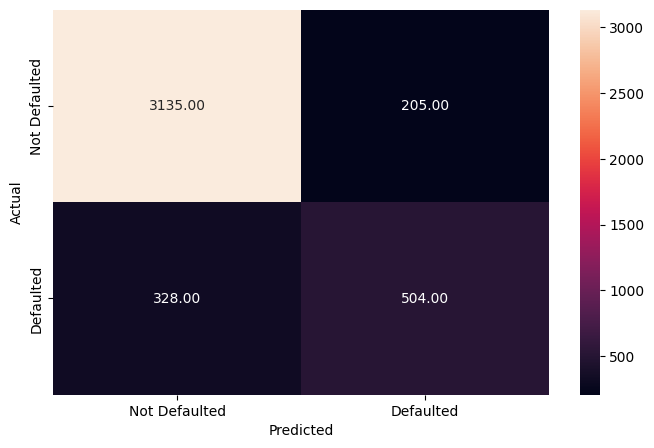

In [ ]:
# Checking performance on the training data
y_pred_train_lg = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_lg)

**Observation:**

The recall for class 1 on the train data is modest, suggesting there is room for improving the model's performance.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1431
           1       0.74      0.59      0.66       357

    accuracy                           0.88      1788
   macro avg       0.82      0.77      0.79      1788
weighted avg       0.87      0.88      0.87      1788



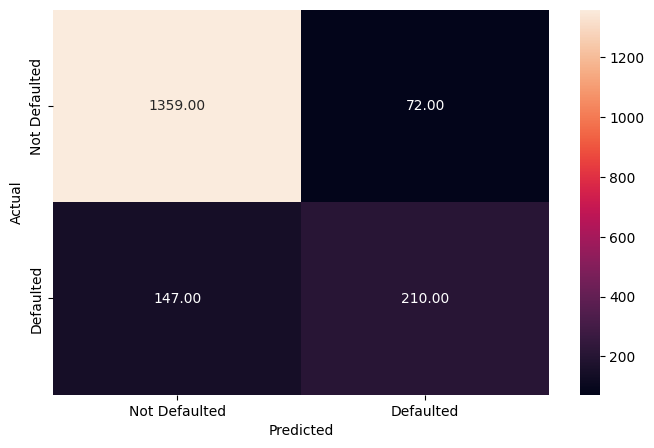

In [ ]:
# Checking performance on the test data
y_pred_test_lg = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_lg)

**Observations:**
- The model achieves approximately 90% accuracy on both the training and test data.
- However, **the recall for class 1 is relatively low**, at about 61% for the training data and 59% for the test data.
- As the recall is low, this model will not perform well in differentiating out customers who have a high chance of defaulting, meaning it will eventually not help in reducing default rates.

**Let's check the coefficients and find which variables are leading to default and which can help to prevent the default.**

In [ ]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg, columns=cols).T.sort_values(by=0, ascending=False)

0
DEBTINC_missing_values_flag  1.161135
VALUE_missing_values_flag    0.725791
DEBTINC                      0.688505
CLNO_missing_values_flag     0.324244
CLAGE_missing_values_flag    0.248795
NINQ                         0.207118
MORTDUE_missing_values_flag  0.153564
JOB_Sales                    0.114494
REASON_HomeImp               0.113800
VALUE                        0.097755
CLNO                         0.066866
JOB_Self                     0.059974
NINQ_missing_values_flag     0.030234
REASON_missing_values_flag   0.010518
DELINQ                       0.000000
DEROG                        0.000000
JOB_Other                   -0.018783
LOAN                        -0.072913
JOB_ProfExe                 -0.144529
YOJ                         -0.159696
MORTDUE                     -0.188947
JOB_Office                  -0.195640
YOJ_missing_values_flag     -0.234868
DEROG_missing_values_flag   -0.291030
DELINQ_missing_values_flag  -0.407731
JOB_missing_values_flag     -0.441568
CLAGE                       -0.461858

**Observations:**

**Features which positively affect on the default rate:**

- DEBTINC_missing_values_flag
- VALUE_missing_values_flag
- DEBTINC
- CLNO_missing_values_flag
- CLAGE_missing_values_flag
- NINQ
- MORTDUE_missing_values_flag
- JOB_Sales
- REASON_HomeImp
- VALUE
- CLNO
- JOB_Self
- NINQ_missing_values_flag
- REASON_missing_values_flag

**Features with no influence on default rate:**

- DELINQ
- DEROG

**Features which negatively affect on the default rate are:**

- JOB_Other
- LOAN
- JOB_ProfExe
- YOJ
- MORTDUE
- JOB_Office
- YOJ_missing_values_flag
- DEROG_missing_values_flag
- DELINQ_missing_values_flag
- JOB_missing_values_flag
- CLAGE

**Main insights:**

- Missing values in the DEBTINC and VALUE columns are key contributors to default risk.
- The DEBTINC ratio is also a strong predictor of default.
- The job classes 'Sales' and 'Self' show a small positive influence on the likelihood of default, as does seeking a loan for home improvement.
- Higher CLAGE contributes to lower default risk.
- A higher MORTDUE is associated with a slightly lower risk of default.

**The coefficients of the logistic regression model provides the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.**

In [ ]:
# Calculating the odds based on logistic regression coefficients
odds = np.exp(lg.coef_[0])

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train_scaled.columns, columns=['odds']).sort_values(by='odds', ascending=False)

odds
DEBTINC_missing_values_flag  3.193556
VALUE_missing_values_flag    2.066365
DEBTINC                      1.990736
CLNO_missing_values_flag     1.382984
CLAGE_missing_values_flag    1.282479
NINQ                         1.230128
MORTDUE_missing_values_flag  1.165982
JOB_Sales                    1.121306
REASON_HomeImp               1.120528
VALUE                        1.102693
CLNO                         1.069152
JOB_Self                     1.061809
NINQ_missing_values_flag     1.030696
REASON_missing_values_flag   1.010574
DELINQ                       1.000000
DEROG                        1.000000
JOB_Other                    0.981392
LOAN                         0.929682
JOB_ProfExe                  0.865430
YOJ                          0.852403
MORTDUE                      0.827831
JOB_Office                   0.822308
YOJ_missing_values_flag      0.790675
DEROG_missing_values_flag    0.747493
DELINQ_missing_values_flag   0.665158
JOB_missing_values_flag      0.643027
CLAGE                        0.630112

**Observations:**

- The presence of missing values in DEBTINC increases the odds of default by approximately **3.19 times** compared to when DEBTINC has no missing values.
- Similarly, the absence of data in the VALUE column increases the odds of default by around **2.07 times**.
- For each unit increase in the DEBTINC ratio, the odds of defaulting on a loan are **nearly doubled** (1.99 times higher).
- Given the substantial number of features and their varying importance, selecting a subset of the most informative ones could eventually improve performance and reduce model complexity, thus exploring feature selection.
- Also, feature engineering seems a viable strategy, including creating polynomial features to allow the model capture potential non-linear relationships.
- As noted during EDA, strong positive correlation among variables suggested checking for multicollinearity.

### Check for multicollinearity

In [ ]:
# Creating a DataFrame for the scaled features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculating VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_train_scaled_df.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])]

# Displaying the VIF values
print(vif)

                        Feature       VIF
0                          LOAN  1.341691
1                       MORTDUE  4.026377
2                         VALUE  4.394969
3                           YOJ  1.096599
4                         DEROG       NaN
5                        DELINQ       NaN
6                         CLAGE  1.192714
7                          NINQ  1.133478
8                          CLNO  1.405307
9                       DEBTINC  1.193907
10  MORTDUE_missing_values_flag  1.534863
11    VALUE_missing_values_flag  1.047844
12   REASON_missing_values_flag  1.329240
13      JOB_missing_values_flag  1.517599
14      YOJ_missing_values_flag  1.315230
15    DEROG_missing_values_flag  2.564998
16   DELINQ_missing_values_flag  3.587919
17    CLAGE_missing_values_flag  3.657820
18     NINQ_missing_values_flag  2.799331
19     CLNO_missing_values_flag  4.535180
20  DEBTINC_missing_values_flag  1.098773
21               REASON_HomeImp  1.175721
22                   JOB_Office  1

**Observation**:

The VIF for MORTDUE and VALUE are particularly high, as expected from EDA, although they are less than 5, which is a commonly used threshold. Thus, we will keep both features, as multicollinearity is not significant.

### Feature selection

In [ ]:
# Selecting features with coefficients equal or greater than 0.15

# Extract coefficients
coefficients = lg.coef_[0]
features = X_train.columns  # Feature names from the original dataframe

# Select threshold and apply it to feature selection
threshold = 0.15
selected_features = features[np.abs(coefficients) >= threshold]

# Print selected features
print('Selected Features based on threshold 0.15:')
print(selected_features)

Selected Features based on threshold 0.15:
Index(['MORTDUE', 'YOJ', 'CLAGE', 'NINQ', 'DEBTINC',
       'MORTDUE_missing_values_flag', 'VALUE_missing_values_flag',
       'JOB_missing_values_flag', 'YOJ_missing_values_flag',
       'DEROG_missing_values_flag', 'DELINQ_missing_values_flag',
       'CLAGE_missing_values_flag', 'CLNO_missing_values_flag',
       'DEBTINC_missing_values_flag', 'JOB_Office'],
      dtype='object')


In [ ]:
# Scaling the selected data
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train[selected_features])
X_test_selected_scaled = scaler.transform(X_test[selected_features])

In [ ]:
# Fit logistic regression with selected features
lg_selected = LogisticRegression()
lg_selected.fit(X_train_selected_scaled, y_train)

LogisticRegression()

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3340
           1       0.71      0.61      0.65       832

    accuracy                           0.87      4172
   macro avg       0.81      0.77      0.79      4172
weighted avg       0.87      0.87      0.87      4172



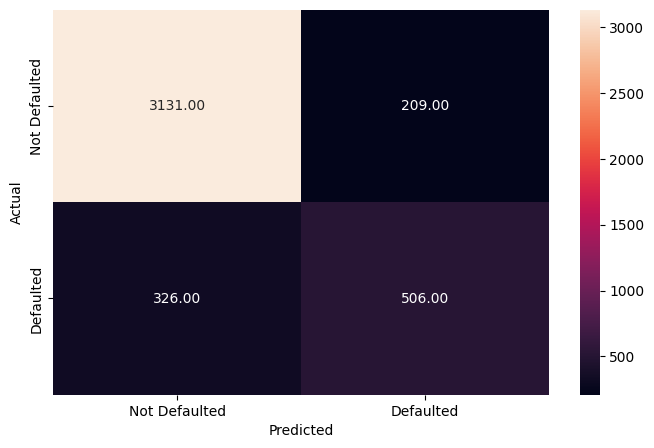

In [ ]:
# Checking performance on the training data
y_pred_train_selected = lg_selected.predict(X_train_selected_scaled)

metrics_score(y_train, y_pred_train_selected)

**Observation:**

We have simplified the model while maintaining the same performance on the train data.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1431
           1       0.74      0.59      0.66       357

    accuracy                           0.88      1788
   macro avg       0.82      0.77      0.79      1788
weighted avg       0.87      0.88      0.87      1788



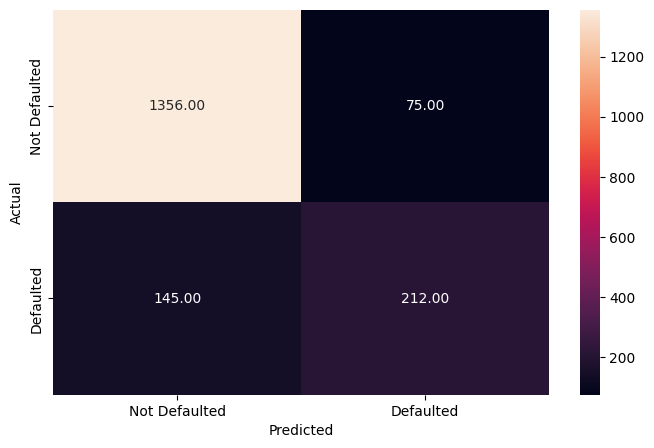

In [ ]:
# Checking performance on the test data
y_pred_test_selected = lg_selected.predict(X_test_selected_scaled)

metrics_score(y_test, y_pred_test_selected)

**Observation:**

We have simplified the model while maintaining the same performance on the test data. Let's see if we can improve the performance with feature engineering.

### Feature engineering

In [ ]:
# Feature engineering using polynomials and interactions
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_selected_poly = poly.fit_transform(X_train_selected_scaled)
X_test_selected_poly = poly.transform(X_test_selected_scaled)

In [ ]:
# Fit logistic regression with polynomial features
lg_selected_poly = LogisticRegression()
lg_selected_poly.fit(X_train_selected_poly, y_train)

LogisticRegression()

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3340
           1       0.76      0.68      0.72       832

    accuracy                           0.89      4172
   macro avg       0.84      0.81      0.83      4172
weighted avg       0.89      0.89      0.89      4172



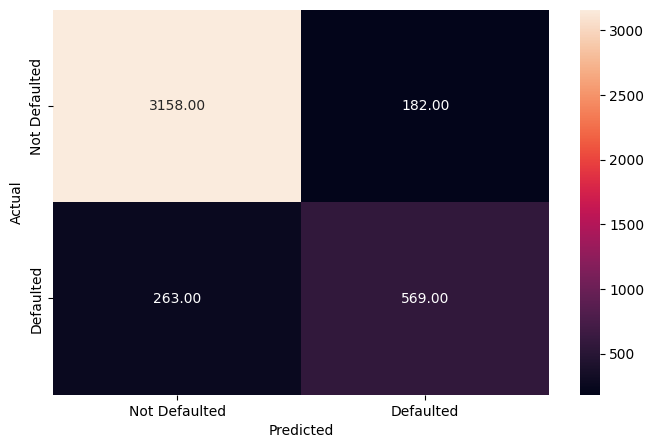

In [ ]:
# Checking performance on the training data
y_pred_train_selected_poly = lg_selected_poly.predict(X_train_selected_poly)

metrics_score(y_train, y_pred_train_selected_poly)

**Observation:**

Performance has improved on the train data compared to the previous model, including the recall on class 1.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1431
           1       0.77      0.64      0.70       357

    accuracy                           0.89      1788
   macro avg       0.84      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



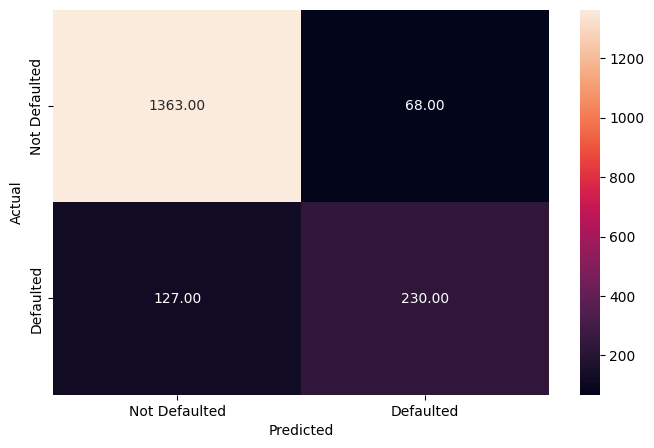

In [ ]:
# Checking performance on the test data
y_pred_test_selected_poly = lg_selected_poly.predict(X_test_selected_poly)

metrics_score(y_test, y_pred_test_selected_poly)

**Observations:**

- Performance has improved on the test data compared to the previous model, including the recall on class 1.
- However, the precision on class 1 is relatively high, suggesting there is margin to improve the recall by adjusting the classification threshold, which we can do with the aid of the Precision-Recall Curve.

### Precision-Recall Curve

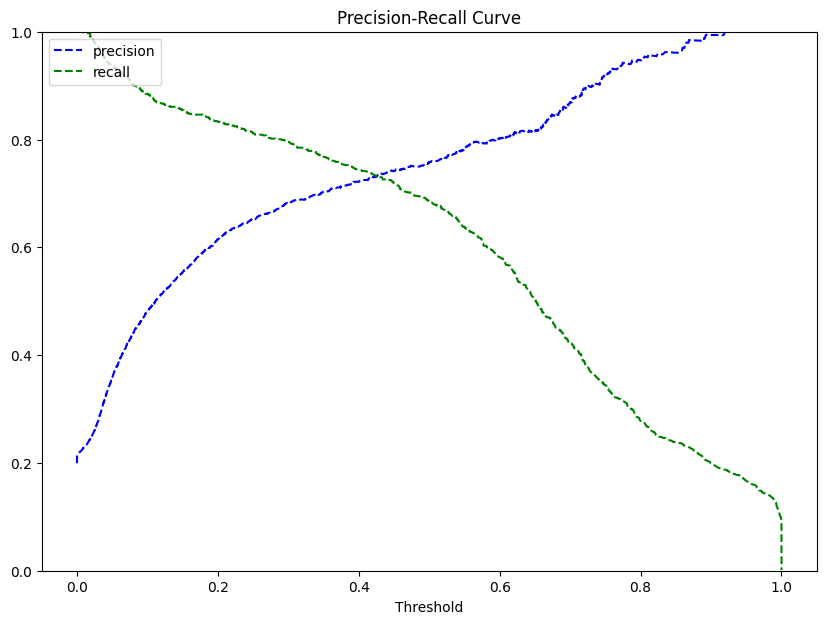

In [ ]:
# Plotting the Precision-Recall Curve to adjust classification threshold

# predict_proba gives the probability of each observation belonging to each class
y_scores_lg_selected_poly = lg_selected_poly.predict_proba(X_train_selected_poly)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg_selected_poly[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='recall')

plt.xlabel('Threshold')

plt.legend(loc='upper left')

plt.ylim([0, 1])

plt.title ('Precision-Recall Curve')

plt.show()

**Observation:**

The precision and the recall are balanced for a threshold of about 0.4. Given that the model seems giving more weight to precision, and that we aim at giving an edge to the recall, let's try a threshold of 0.35 and check the performance of the model at this threshold.

In [ ]:
# Setting optimal threshold for classification
optimal_threshold = 0.35

# Creating Logistic Regression with optimal threshold
lg_selected_poly_optimized = LogisticRegression()
lg_selected_poly_optimized.threshold = optimal_threshold

# Fitting the optimized model on the train data
lg_selected_poly_optimized.fit(X_train_selected_poly, y_train)

LogisticRegression()

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3340
           1       0.70      0.77      0.73       832

    accuracy                           0.89      4172
   macro avg       0.82      0.84      0.83      4172
weighted avg       0.89      0.89      0.89      4172



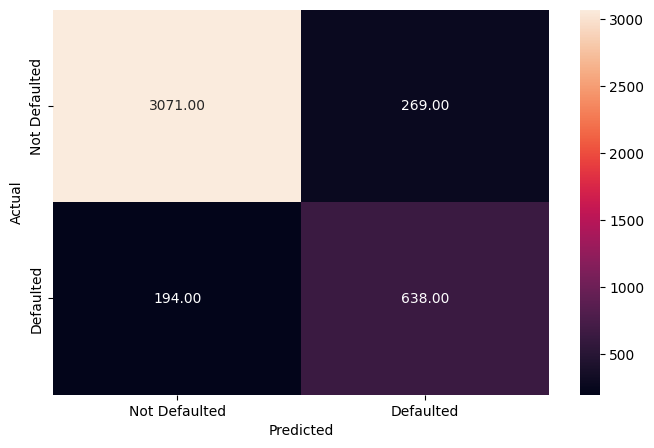

In [ ]:
# Checking performance on the train data
y_pred_train_lg_selected_poly_optimized = lg_selected_poly_optimized.predict_proba(X_train_selected_poly)

metrics_score(y_train, y_pred_train_lg_selected_poly_optimized[:, 1] > optimal_threshold)

**Observation:**

The recall for class 1 on the train data has significantly improved while maintaining a robust overall peformance compared to the previous model.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1431
           1       0.70      0.73      0.71       357

    accuracy                           0.88      1788
   macro avg       0.82      0.82      0.82      1788
weighted avg       0.89      0.88      0.88      1788



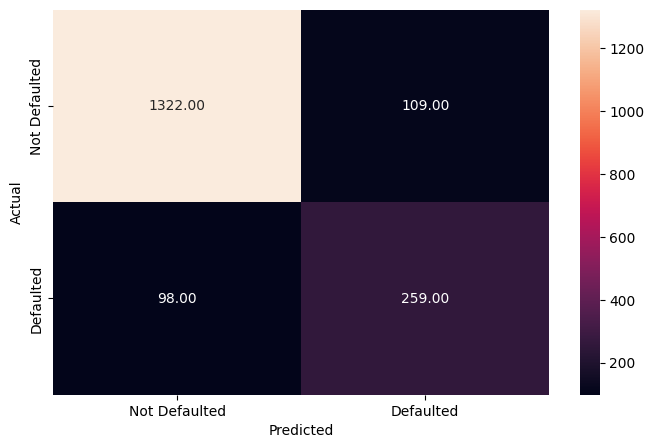

In [ ]:
# Checking performance on the test data
y_pred_test_lg_selected_poly_optimized = lg_selected_poly_optimized.predict_proba(X_test_selected_poly)

metrics_score(y_test, y_pred_test_lg_selected_poly_optimized[:, 1] > optimal_threshold)

**Observations:**

- **Optimizing the threshold resulted in a significant improvement** in the recall score for class 1 on the test data, increasing it from 0.64 to 0.73, with a slight reduction in precision.
- This is so far the strongest-performance model. Let's check the performance of alternative models.

## **Decision Tree**

### **Data preparation for the tree based model**

Note: in logistic regression, we addressed outliers and built the model. However, decision trees do not require outlier treatment because they are robust to outliers by design. Decision trees partition data based on feature value thresholds, rather than relying on distance or percentage change, making them resilient to outliers.

**Adding binary flags for columns that have missing values**

In [ ]:
# List of columns that have missing values
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data, colmn)

**Treating missing values in numerical columns with median and mode in categorical variables**

In [ ]:
# Selecting numeric columns
num_data = data.select_dtypes('number')

# Selecting categorical columns
cat_data = data.select_dtypes('category').columns.tolist()

# Filling numeric columns with median
data[num_data.columns] = num_data.fillna(num_data.median())

# Filling categorical columns with mode
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

**Separating the target variable y and independent variable x**

In [ ]:
# Separating the target variable and other variables
Y = data.BAD
X = data.drop(columns=['BAD'], axis=1)

# List of columns for which we need to create dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(X, columns=to_get_dummies_for, drop_first=True)

**Splitting the data into 70% train and 30% test sets**

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

## **Building the Decision Tree Model**

In [ ]:
# Define the decistion tree model with adjusted class weight to avoid class imbalance impacting the model
dt = DecisionTreeClassifier (class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Fit the decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



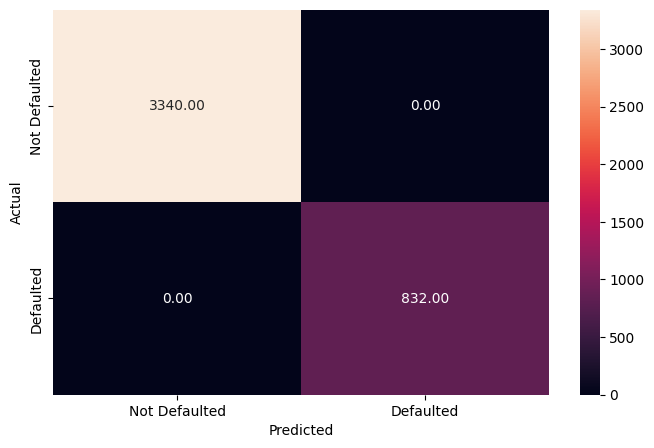

In [ ]:
# Checking performance on the training data
y_pred_train_dt = dt.predict(X_train)

metrics_score(y_train, y_pred_train_dt)

**Observation:**

The model is performing robustly in terms of most metrics, with **scores of 100%** for all of them. We can expect the decision tree to be overfitting the trainig data at this stage, as we have not implemented pruning or other techniques to avoid overfitting.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1431
           1       0.74      0.62      0.68       357

    accuracy                           0.88      1788
   macro avg       0.82      0.78      0.80      1788
weighted avg       0.88      0.88      0.88      1788



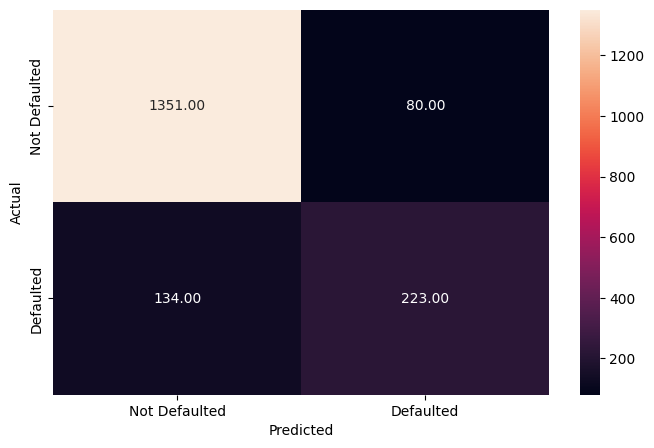

In [ ]:
# Checking performance on the test data
y_pred_test_dt = dt.predict(X_test)

metrics_score(y_test, y_pred_test_dt)

**Observations:**

- The decrease in performance on the test data suggests that the model is overfitting the training data.
- A recall score of 0.62 for class 1 means there's a 38% chance (1 - 0.62) of missing customers likely to default.
- With a precision score indicating a 26% chance of false positives, the model may predict default for customers who wouldn't have defaulted, i.e. the bank would not extend a loan to a customer that was not at risk of defaulting.
- While our primary goal is to maximize the recall for class 1, we still would like to achieve the best overall model performance. The average precision and recall are around 82% and 78% respectively, while accuracy is 88%. Let's see if we can improve the model's performance by hyperparameter tuning.

### **Decision Tree Hyperparameter Tuning**

In [ ]:
# Choosing the type of classifier
dt_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 15),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [15, 25],
    'class_weight': ['balanced', {0: 0.2, 1: 0.8}]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Running the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

# Setting the classifier to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fitting the optimized algorithm to the data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, min_samples_leaf=25, random_state=1)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3340
           1       0.60      0.89      0.72       832

    accuracy                           0.86      4172
   macro avg       0.78      0.87      0.81      4172
weighted avg       0.90      0.86      0.87      4172



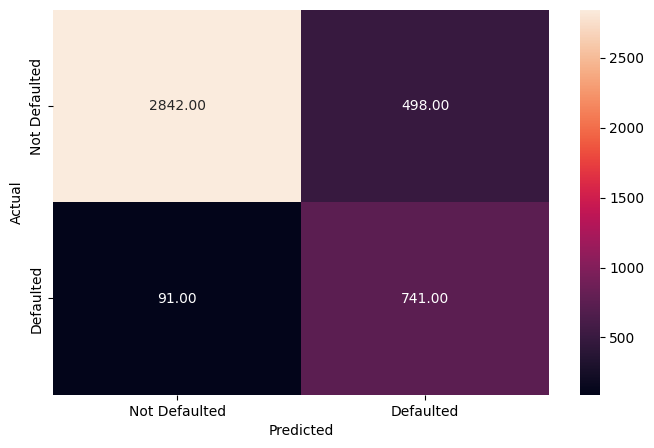

In [ ]:
# Checking performance on the training data
y_pred_train_dt_tuned = dt_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_dt_tuned)

**Observation:**

Compared to the default model, the performance on the train data indicates improved generalization.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1431
           1       0.57      0.82      0.67       357

    accuracy                           0.84      1788
   macro avg       0.76      0.83      0.78      1788
weighted avg       0.87      0.84      0.85      1788



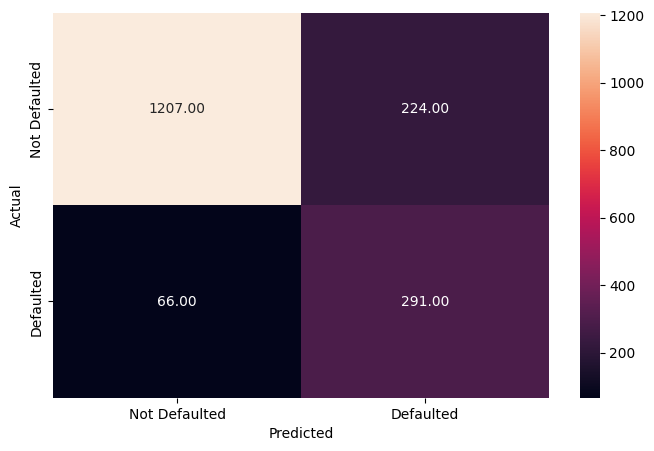

In [ ]:
# Checking performance on the test data
y_pred_test_dt_tuned = dt_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_dt_tuned)

**Observations:**

- The performance gap between the train and test data is small, confirming strong generalization.
- The recall for class 1 shows a significant improvement. Compared to the untuned model, the likelihood of making a false negative error on the test data has decreased from 38% to 18%.
- However, the average precision and accuracy moderated from the untuned model, which reflects the trade-off to achieve a significant increase on class 1 recall.

### Plotting the Decision Tree


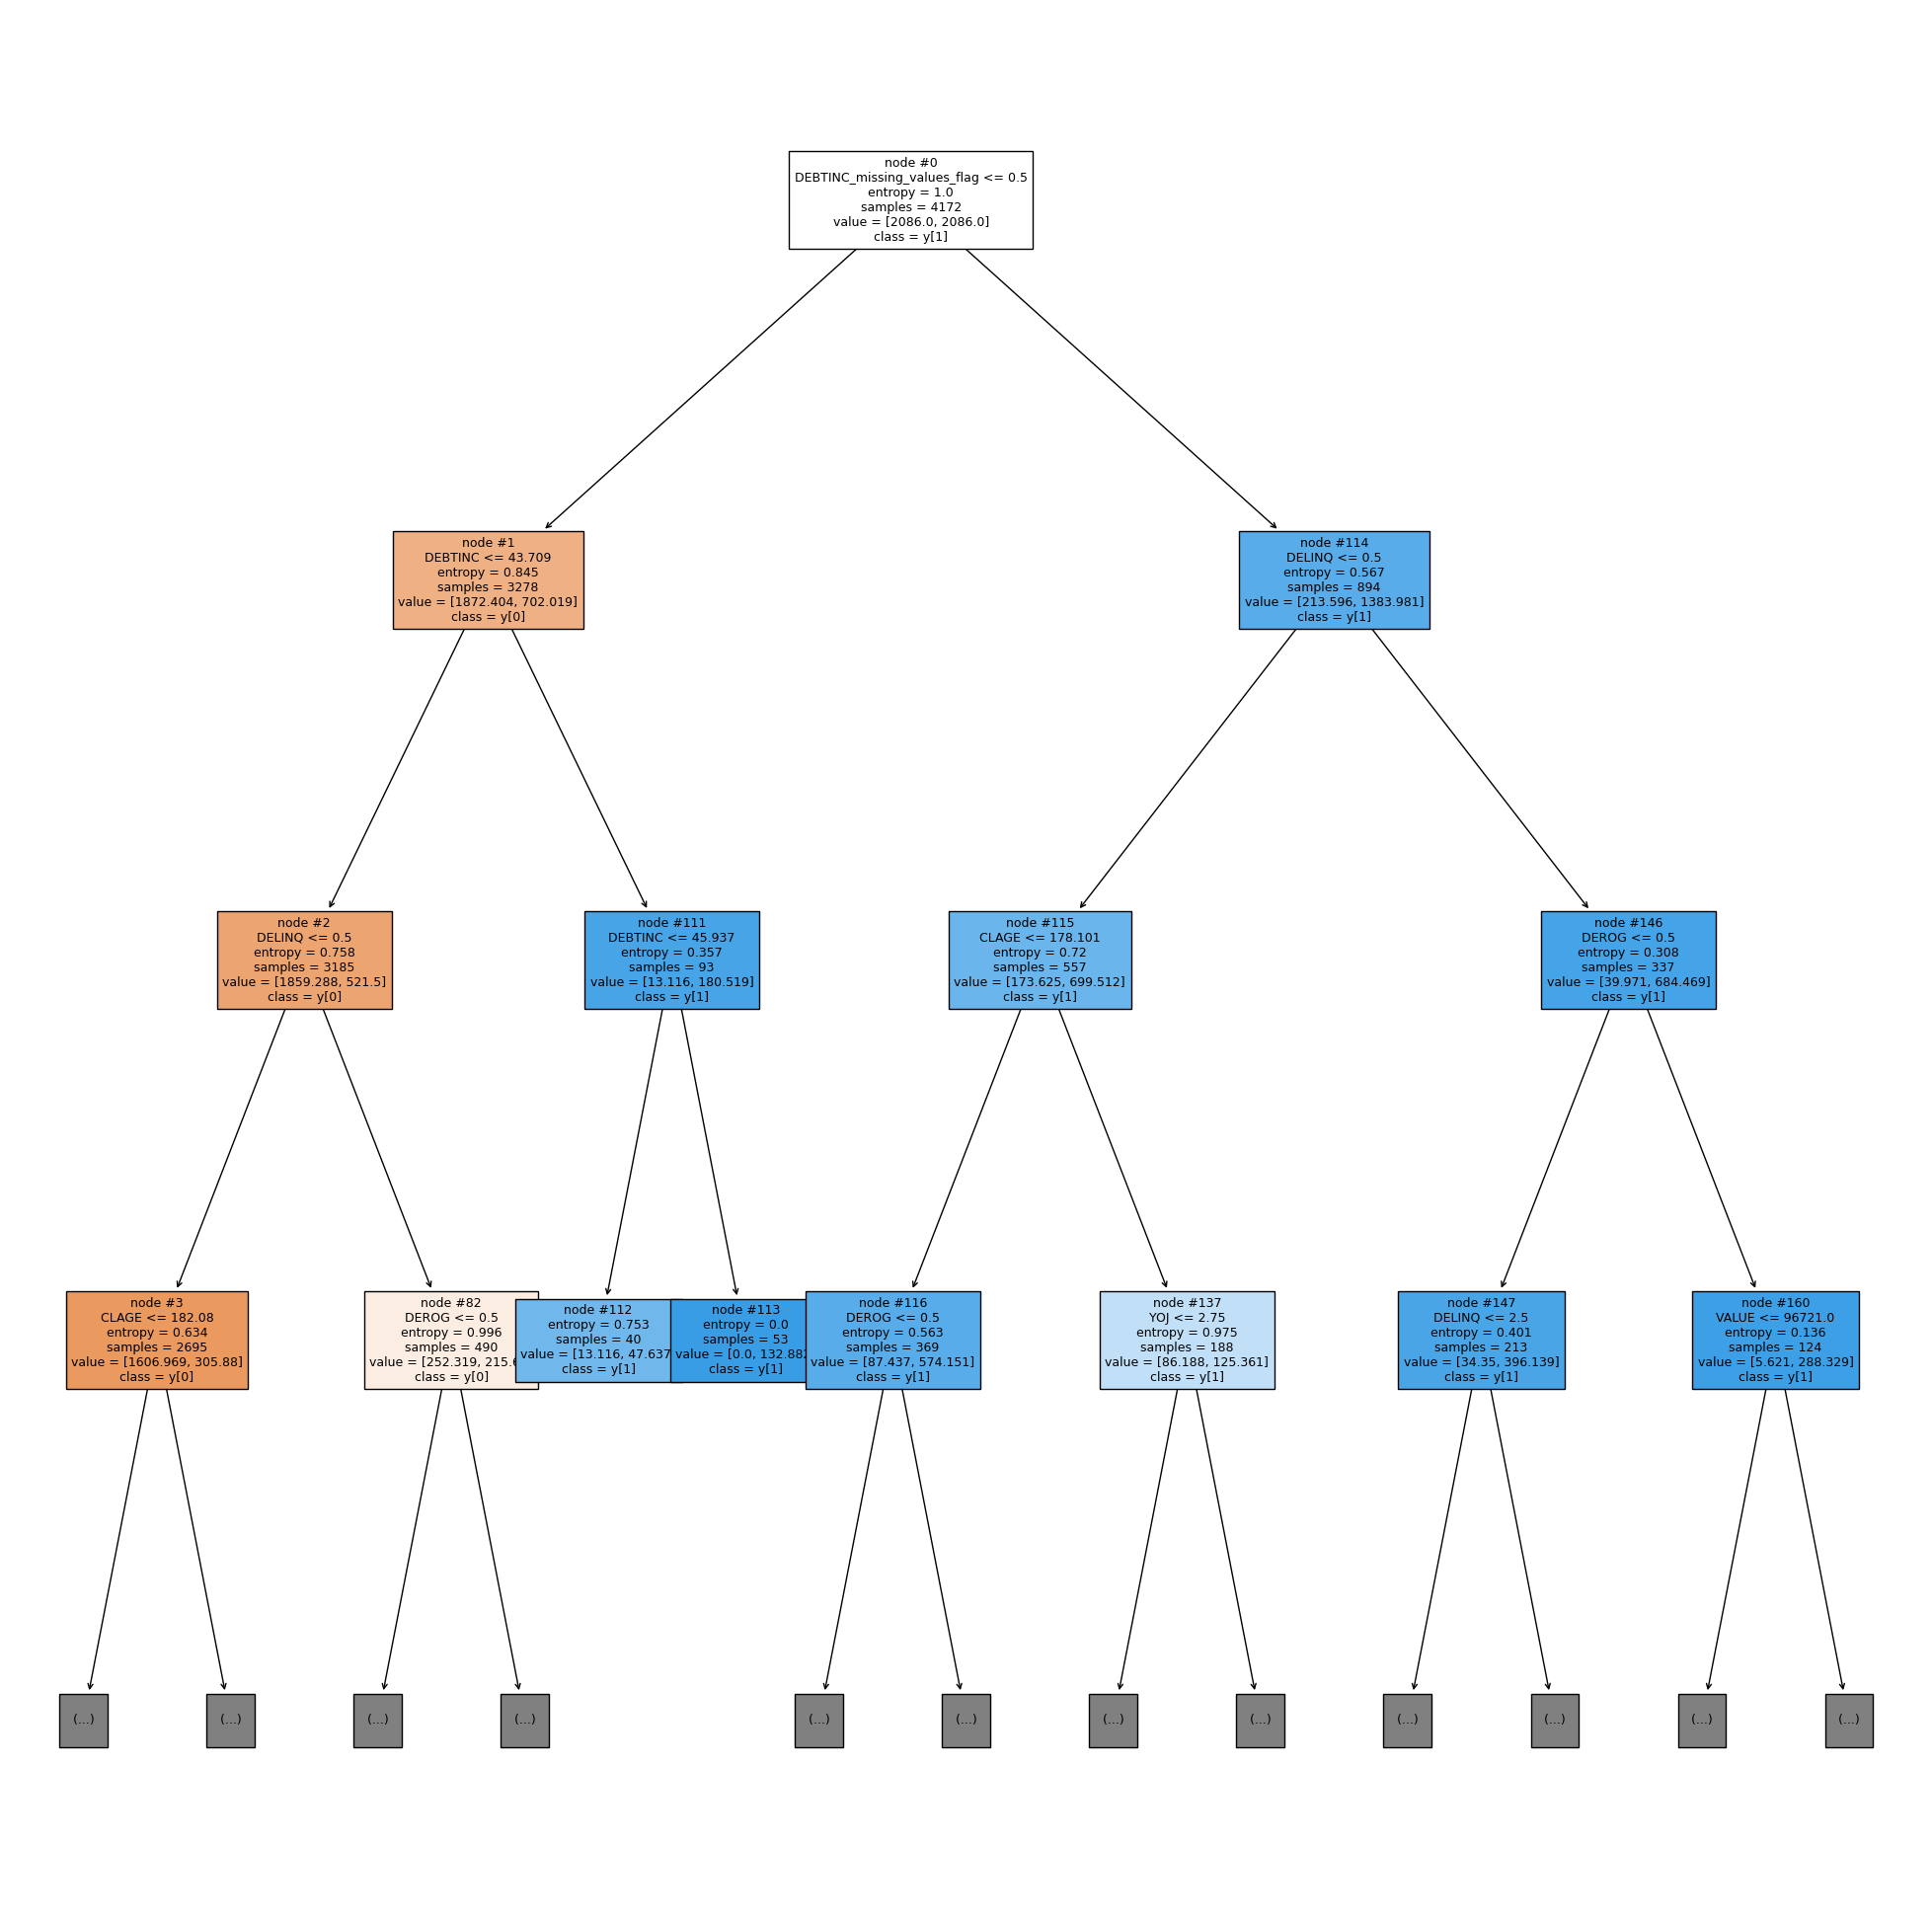

In [ ]:
# Plotting the tuned decision tree

features = list(X.columns)

plt.figure(figsize = (25, 25))

tree.plot_tree(dt_tuned, feature_names=features, filled=True, fontsize=9, node_ids=True, class_names=True, max_depth=3)

plt.show()

**Observations:**

- In the decision tree, the root node splits customers based on the presence or absence of missing values in the DEBTINC column, indicating that this criterion has the highest predictive power in differentiating between the classes.

**Left branch:**

- The left branch has more customers who don't default (red nodes), while the right branch has more cases of default (blue nodes).
- Among customers with no missing values in DEBTINC, the next significant criterion is a DEBTINC ratio of less than or equal to 43.7%. For customers with a DEBTINC ratio above this threshold, the model predicts default.
- For those with a DEBTINC ratio below 43.7%, the model further evaluates whether the customer has a DELINQ score less than or equal to 0.5 (indicating the presence or absence of a delinquent credit line). Regardless of this criterion outcome, the model predicts non-default, with different degrees of risk.

**Right branch:**

- Customers with missing values in the DEBTINC column are predicted to default in all nodes within the next three levels of the tree, with varying degrees of risk.
- The model considers multiple criteria, including DELINQ (presence or absence of a delinquent credit line), CLAGE <=178.101 (less than or equal to 178 months of the oldest credit line), DEROG (presence or absence of a derogatory report), and YOJ <= 2.75 (less than or equal to 2.75 years in the present job).
- For instance, the model reaches a leaf node where it predicts default for customers with missing values in DEBTINC, at least one delinquent credit line, and at least one derogatory report. Entropy is low in this node, thus the color blue is darker, suggesting increased information gain and higher probability of default.

### Feature importance

In [ ]:
# Displaying the importance of features to gain a better understanding of the model
print (pd.DataFrame(dt_tuned.feature_importances_, columns = ['Imp'], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                      Imp
DEBTINC_missing_values_flag  4.398423e-01
DEBTINC                      1.630897e-01
DELINQ                       8.407907e-02
CLAGE                        6.640726e-02
MORTDUE                      5.453941e-02
LOAN                         4.529489e-02
YOJ                          3.532471e-02
CLNO                         2.832708e-02
VALUE                        2.630174e-02
DEROG                        2.002319e-02
JOB_missing_values_flag      1.171844e-02
JOB_Other                    8.564099e-03
DEROG_missing_values_flag    6.012113e-03
NINQ                         4.551285e-03
REASON_HomeImp               3.541756e-03
JOB_ProfExe                  2.382995e-03
MORTDUE_missing_values_flag  7.311594e-17
VALUE_missing_values_flag    0.000000e+00
REASON_missing_values_flag   0.000000e+00
YOJ_missing_values_flag      0.000000e+00
DELINQ_missing_values_flag   0.000000e+00
CLAGE_missing_values_flag    0.000000e+00
NINQ_missing_values_flag     0.000

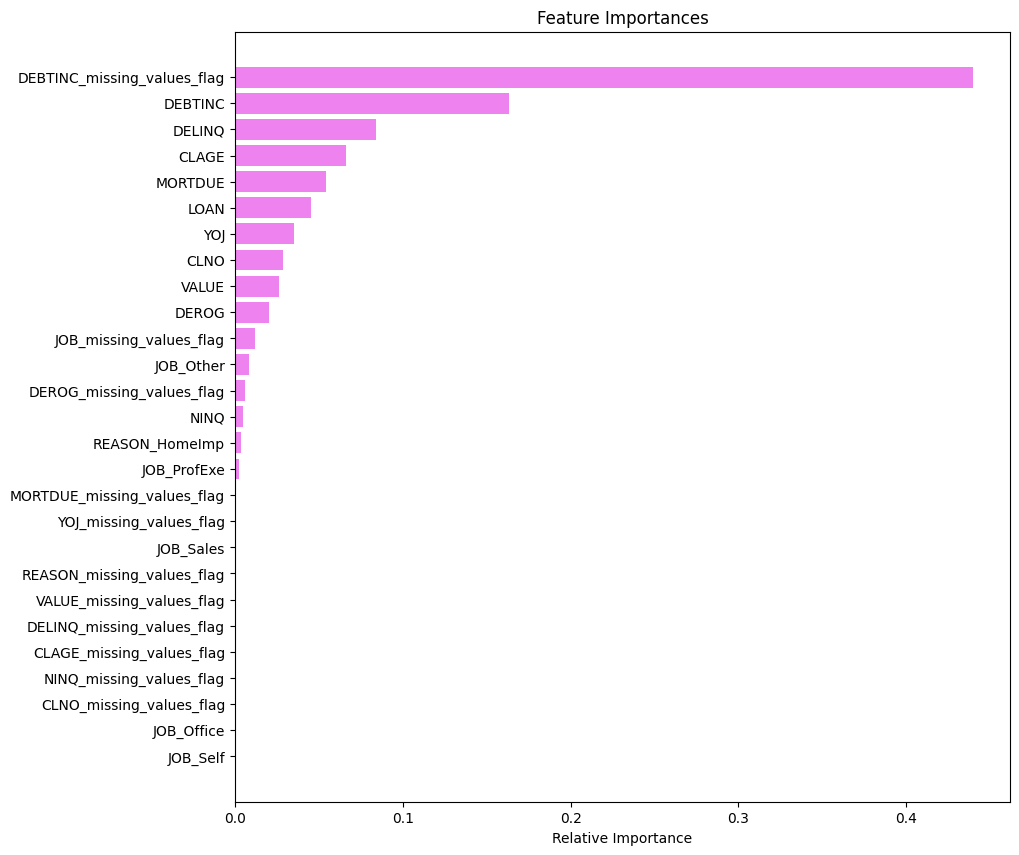

In [ ]:
# Extracting feature names
features = X_train.columns

# Plotting the feature importance
importances = dt_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- Both the decision tree and the logistic regression models assign significant importance to missing values in the DEBTINC column.
- The patterns captured by both models are not identical, although they share a broadly similar theme. For instance, the decision tree assigns more importance to DELINQ and DEROG, while the logistic regression model captures the delinquency information through NINQ. Also, the decision tree doesn't assign importance to most columns with missing values.
- Both models suggest that feature selection is a viable approach.

### Feature selection

In [ ]:
# Selecting features in the top 40th percentile of importance
threshold = np.percentile(importances, 40)
top_indices = np.where(importances >= threshold)[0]  # Get indices of features above the threshold
selected_features = [features[i] for i in top_indices]  # Map indices to feature names

# Create the datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the decision tree with selected features
dt_tuned_selected = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                                           max_depth=11, min_samples_leaf=25, random_state=1)
dt_tuned_selected.fit(X_train_selected, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, min_samples_leaf=25, random_state=1)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3340
           1       0.60      0.89      0.72       832

    accuracy                           0.86      4172
   macro avg       0.78      0.87      0.81      4172
weighted avg       0.90      0.86      0.87      4172



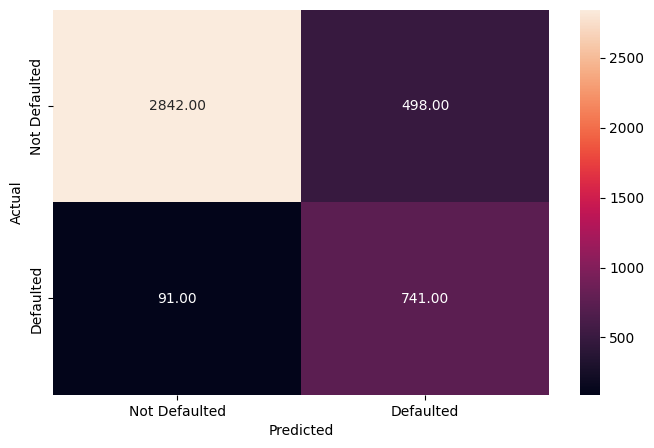

In [ ]:
# Checking performance on the training data
y_pred_train_dt_tuned_selected = dt_tuned_selected.predict(X_train_selected)

metrics_score(y_train, y_pred_train_dt_tuned_selected)

**Observation:**

We have simplified the model while maintaining the same performance on the train data.

### Checking the performance in the train dataset

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1431
           1       0.57      0.82      0.67       357

    accuracy                           0.84      1788
   macro avg       0.76      0.83      0.78      1788
weighted avg       0.87      0.84      0.85      1788



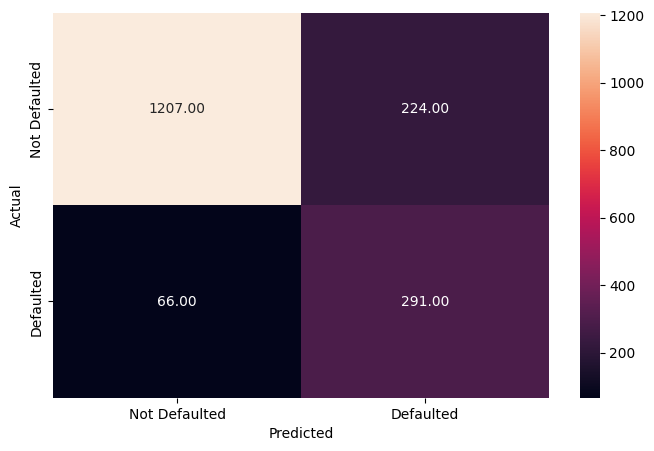

In [ ]:
# Checking performance on the training data
y_pred_test_dt_tuned_selected = dt_tuned_selected.predict(X_test_selected)

metrics_score(y_test, y_pred_test_dt_tuned_selected)

**Observation:**

We have simplified the model while maintaining the same performance on the test data. This suggests that this model can be used without any loss in performance.

### Feature importance

In [ ]:
# Displaying the importance of features to gain a better understanding of the model
print (pd.DataFrame(dt_tuned_selected.feature_importances_, columns = ['Imp'], index=X_train_selected.columns).sort_values(by='Imp', ascending=False))

                                  Imp
DEBTINC_missing_values_flag  0.439842
DEBTINC                      0.163090
DELINQ                       0.084079
CLAGE                        0.066407
MORTDUE                      0.054539
LOAN                         0.045295
YOJ                          0.035325
CLNO                         0.028327
VALUE                        0.026302
DEROG                        0.020023
JOB_missing_values_flag      0.011718
JOB_Other                    0.008564
DEROG_missing_values_flag    0.006012
NINQ                         0.004551
REASON_HomeImp               0.003542
JOB_ProfExe                  0.002383


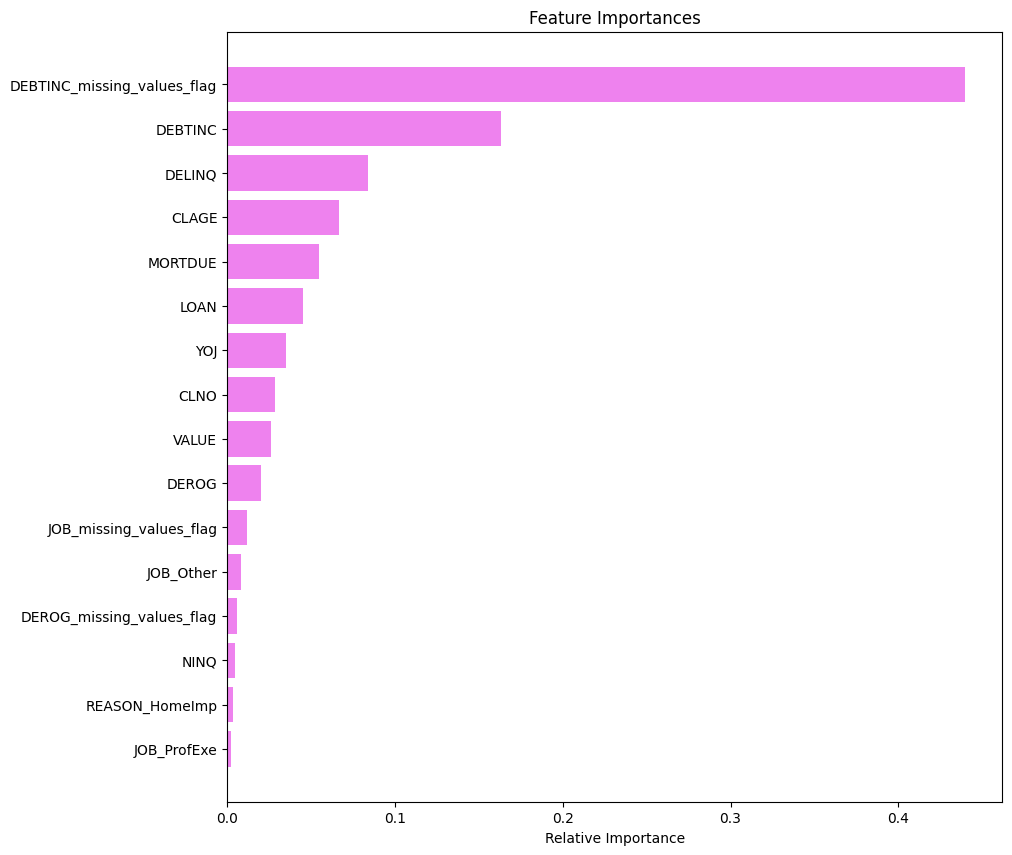

In [ ]:
# Visualizing the feature importance

# Extracting feature names from the selected features
features = X_train_selected.columns

# Plotting the feature importance
importances = dt_tuned_selected.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation:**

So far, this is a promising model, with strong predictive power, simple outlook, and relatively strong performance. Let's see if a random forest model can provide improved performance of further insights.

## **Building a Random Forest Classifier**

In [ ]:
# Define the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)

# Fit the random forest classifier
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



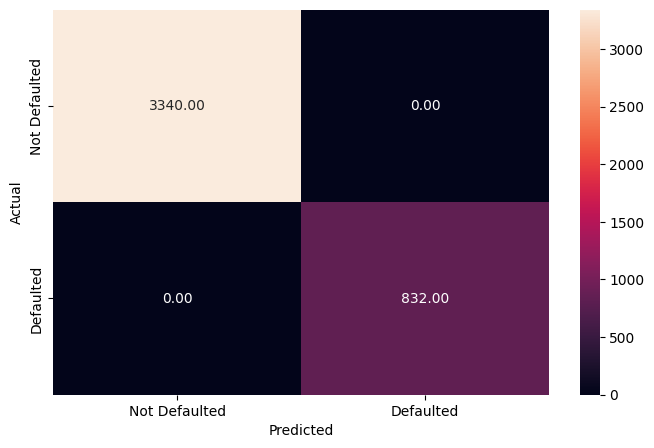

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

The model is likely overfitting the training data, with perfect performance of 100%.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.84      0.68      0.75       357

    accuracy                           0.91      1788
   macro avg       0.88      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



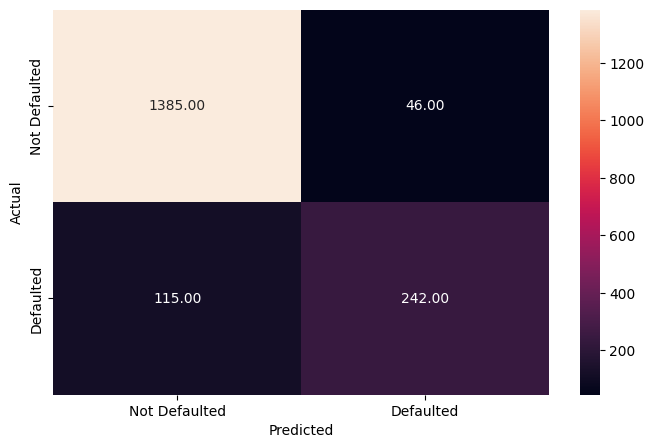

In [ ]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- Performance dropped on the test data, indicating overfitting.
- The recall of 0.68 for class 1 on the test data is significantly lower than the 0.82 from the tuned decision tree, although other metrics are relatively strong.
- Let's adjust the class weights to check if performance improves.

### Random Forest model with Class Weights

In [ ]:
# Define the random forest classifier with weighted classes
rf_estimator_weighted = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Fit the random forest classifier with weighted classes
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



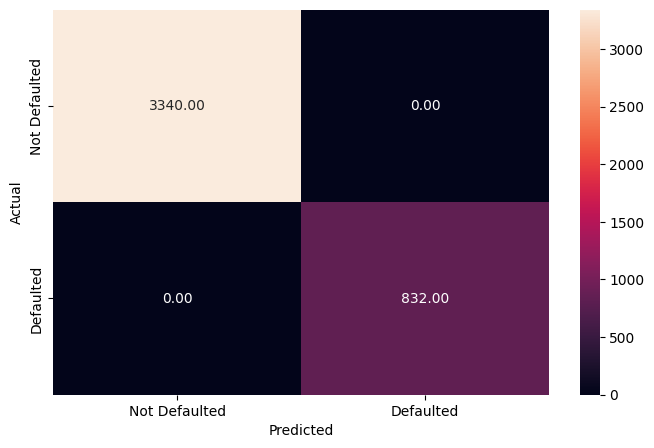

In [ ]:
# Checking performance on the training data
y_pred_train_rf_weighted = rf_estimator_weighted.predict(X_train)

metrics_score(y_train, y_pred_train_rf_weighted)

**Observation:**

The model is likely overfitting the training data, with perfect performance of 100%.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.84      0.64      0.73       357

    accuracy                           0.90      1788
   macro avg       0.88      0.81      0.83      1788
weighted avg       0.90      0.90      0.90      1788



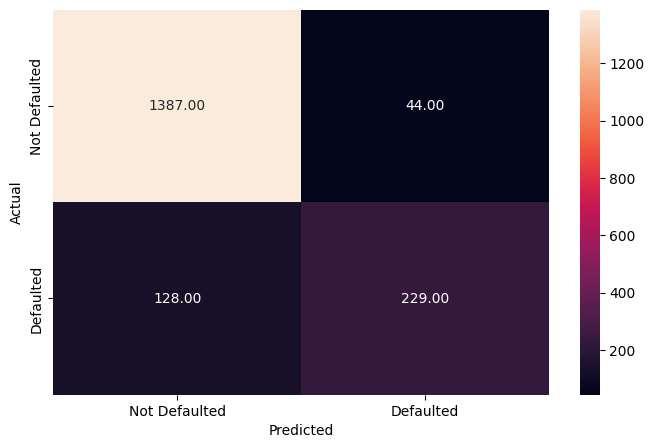

In [ ]:
# Checking performance on the test data
y_pred_test_rf_weighted = rf_estimator_weighted.predict(X_test)

metrics_score(y_test, y_pred_test_rf_weighted)

**Observations:**

- The recall for class 1 has diminished following the introduction of adjusted class weights, accompanied by a decrease in other performance metrics as well.
- This indicates that the random forest model is inherently robust in handling class imbalances. Unlike some other models, it is able to capture classification patterns effectively without the need for class weight adjustments. Let's tune the random forest to see if we achieve improved performance.

### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
# Choosing the type of classifier
rf_estimator_tuned = RandomForestClassifier(n_jobs=-1, random_state=1)

# Grid of parameters to choose from
parameters_rf = {
    'n_estimators': [140, 150],
    'max_depth': [8, 9],
    'min_samples_split': [80, 90, 100],
    'class_weight': [None, 'balanced',{0: 0.2, 1: 0.8}],
    'criterion': ['gini', 'entropy']
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score, pos_label=1)

#  Defining the random search on the training data using scorer=scorer and cv=5
random_search = RandomizedSearchCV(
    rf_estimator_tuned,
    parameters_rf,
    n_iter=10,  # Number of parameter settings sampled
    scoring=scorer,
    cv=5,
    random_state=1
)

# Running the random search on the training data
random_search.fit(X_train, y_train)

# Saving the best estimator from the random search to variable rf_estimator_tuned3
rf_estimator_tuned = random_search.best_estimator_

#Fitting the best estimator to the training data
rf_estimator_tuned.fit (X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_samples_split=80, n_estimators=150, n_jobs=-1,
                       random_state=1)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3340
           1       0.66      0.84      0.74       832

    accuracy                           0.88      4172
   macro avg       0.81      0.87      0.83      4172
weighted avg       0.90      0.88      0.89      4172



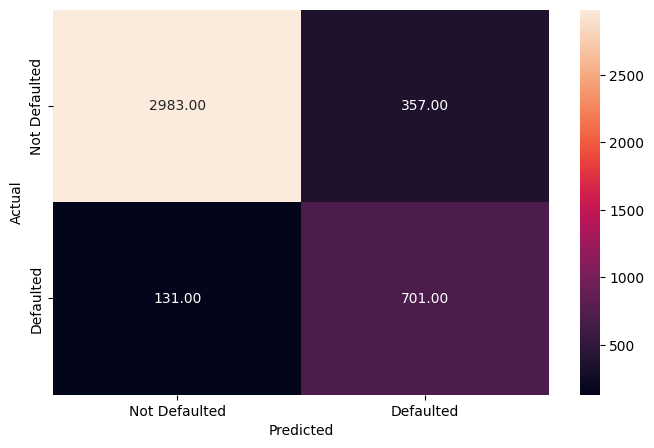

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

**Observation:**

- Performance on the train data is relatively strong and the model doesn't seem overfitting.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1431
           1       0.65      0.79      0.71       357

    accuracy                           0.87      1788
   macro avg       0.80      0.84      0.81      1788
weighted avg       0.89      0.87      0.88      1788



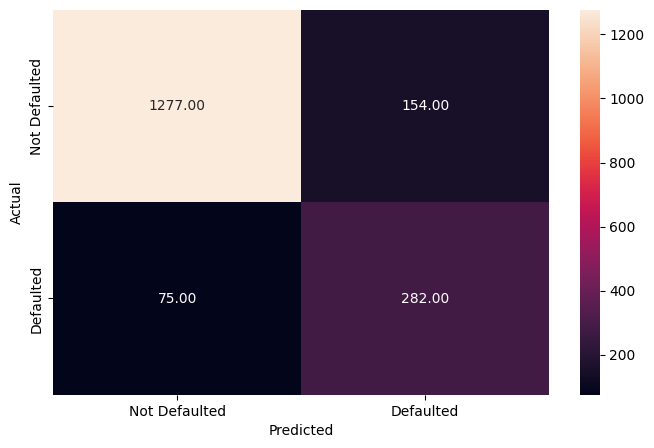

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- The model has strong generalization.
- The recall for class 1 on the test data has improved to 0.79, compared to 0.64 in the random forest with adjusted weighted classes and 0.68 in the default random forest.

### Feature importance

In [ ]:
# Importance of features in the random forest
print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ['Imp'], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                  Imp
DEBTINC_missing_values_flag  0.330461
DEBTINC                      0.240336
DELINQ                       0.102851
CLAGE                        0.062426
DEROG                        0.061291
VALUE_missing_values_flag    0.029020
LOAN                         0.028893
VALUE                        0.028506
CLNO                         0.023327
MORTDUE                      0.021476
NINQ                         0.018746
YOJ                          0.015548
DEROG_missing_values_flag    0.006304
JOB_Office                   0.004171
JOB_Sales                    0.003805
CLAGE_missing_values_flag    0.003501
JOB_missing_values_flag      0.002926
YOJ_missing_values_flag      0.002762
DELINQ_missing_values_flag   0.002521
REASON_HomeImp               0.002208
JOB_Other                    0.001561
CLNO_missing_values_flag     0.001465
JOB_ProfExe                  0.001418
MORTDUE_missing_values_flag  0.001220
JOB_Self                     0.001136
REASON_missi

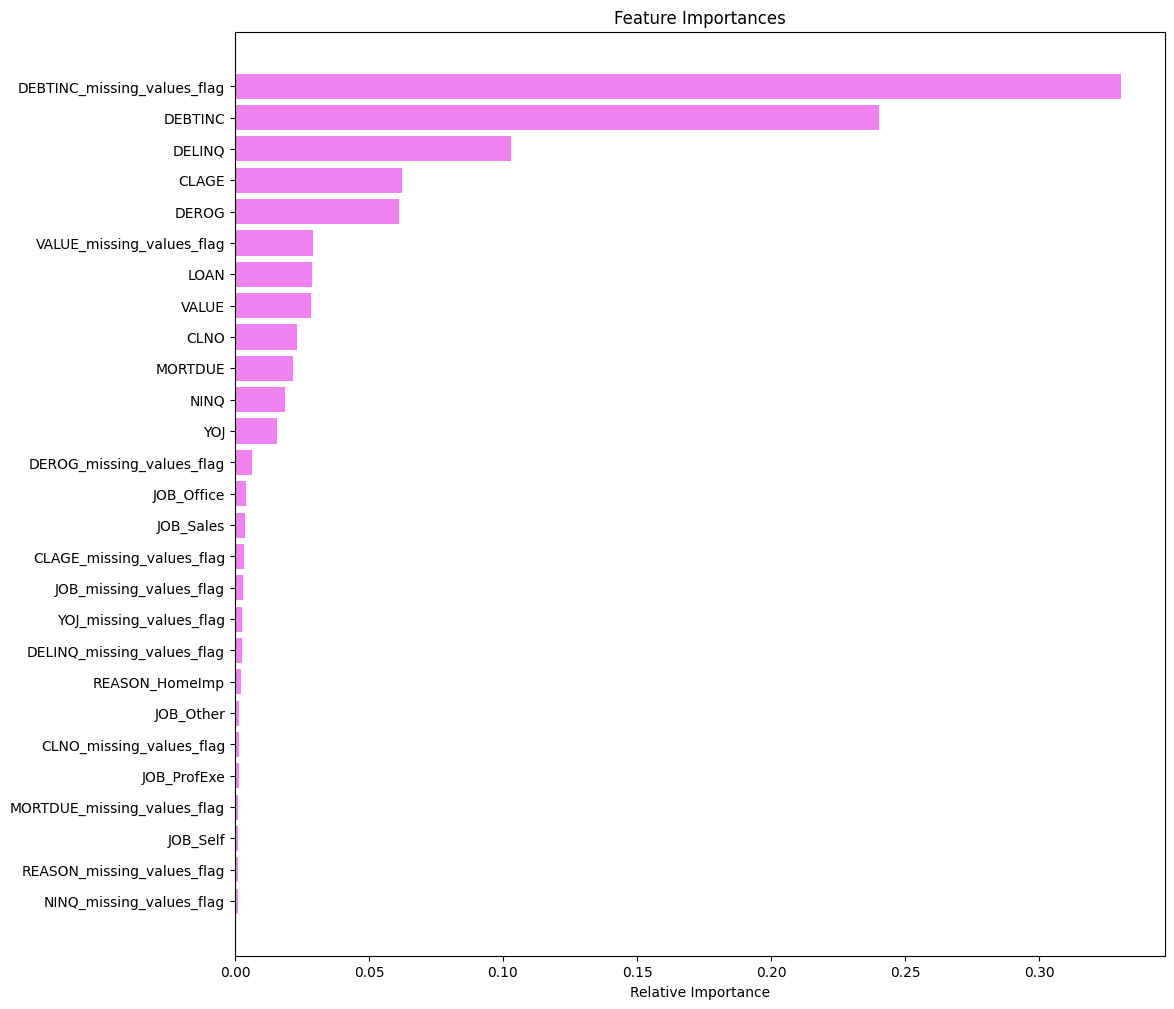

In [ ]:
# Extract feature importance
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
feature_names = list(X.columns)
plt.figure(figsize = (12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- Random forest captures more complex patterns in the data than prior algorithms, with all features playing a predictive role.
- However, the overall theme remains similar. Mising values in DEBTINC, leverage, or a delinquency indicator combined account for most of the prediction.
- Let's see if other models provide improved performance.

# **Building a K-Nearest Neighbors (KNN) model**

Since the data prepared for logistic regression is scaled, it can be used for building a KNN model.

### **Selecting the optimal value of k**

In [ ]:
# Selecting the optimal value of k through error rate analysis

# Initialize a dictionary to store the average errors for different values of k
knn_errors = {}

for k in range(1, 15):  # Looping over values of k from 1 to 14
    train_errors = []
    validation_errors = []

    # Creating a KNN model with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    for i in range(30):  # Repeating the process 30 times for each k
        # Splitting the training data further for validation
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train_scaled, y_train, test_size=0.20, random_state=i)

        # Fitting KNN on the newly created training data
        knn.fit(x_train_new, y_train_new)

        # Calculating errors on training data and validation data
        train_errors.append(1 - knn.score(x_train_new, y_train_new))
        validation_errors.append(1 - knn.score(x_val, y_val))

    # Calculating the average error for each k value
    knn_errors[k] = [np.mean(train_errors), np.mean(validation_errors)]

# Displaying the errors for different values of k
knn_errors

{1: [0.0, 0.10726546906187623],
 2: [0.0731894915592848, 0.13285429141716565],
 3: [0.06431924882629107, 0.1168063872255489],
 4: [0.09819198881230645, 0.13089820359281437],
 5: [0.08934172410348618, 0.1219560878243513],
 6: [0.10755169313754867, 0.1322554890219561],
 7: [0.10174807711517331, 0.1252694610778443],
 8: [0.1131755069423634, 0.13097804391217566],
 9: [0.10862051743082611, 0.12682634730538922],
 10: [0.11666167216062331, 0.13137724550898203],
 11: [0.11368494655878533, 0.1299001996007984],
 12: [0.11829987014284288, 0.13269461077844313],
 13: [0.11555289181899911, 0.13173652694610777],
 14: [0.12050744181400459, 0.1346506986027944]}

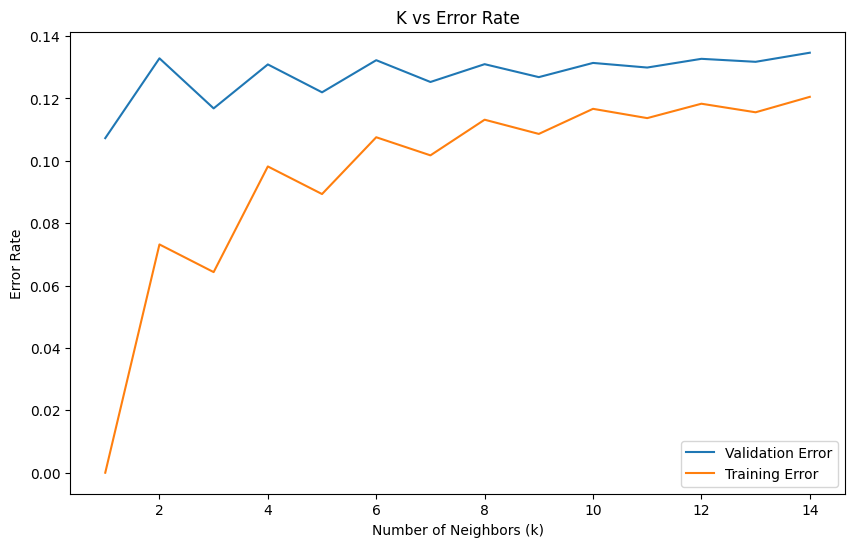

In [ ]:
#  Plotting k versus error

kltest = [] # List for storing k values for the test set
vltest = [] # List for storing error rates for the test set

# Extracting k values and corresponding validation errors from knn_errors
for k, v in knn_errors.items():
    kltest.append(k) # Append k value
    vltest.append(v[1]) # Append validation error

kltrain = [] # List for storing k values for the train set
vltrain = [] # List for storing error rates for the train set

# Extracting k values and corresponding training errors from knn_errors
for k, v in knn_errors.items():
    kltrain.append(k) # Append k value
    vltrain.append(v[0]) # Append training error


# Plotting K vs Error
plt.figure(figsize=(10, 6))
plt.plot(kltest, vltest, label='Validation Error')
plt.plot(kltrain, vltrain, label='Training Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('K vs Error Rate')
plt.legend()
plt.show()

**Observations:**

- When k = 1, the nearest neighbor of a data point is itself, leading to zero training error. As the number of k increases, the training error increases, while the validation error stabilizes earlier.
- The validation error remains relatively stable for k greater than or equal to 5. But the training error keeps increasing with increasing k.
- This implies that we would get a lower train and validation error if we choose k = 5. Also, if we choose a higher value of k, the model would get biased towards the majority class.
- So, let's fit the KNN model with k = 5 on the entire training set.

### **Building the KNN model**

In [ ]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3340
           1       0.87      0.67      0.76       832

    accuracy                           0.91      4172
   macro avg       0.90      0.82      0.85      4172
weighted avg       0.91      0.91      0.91      4172



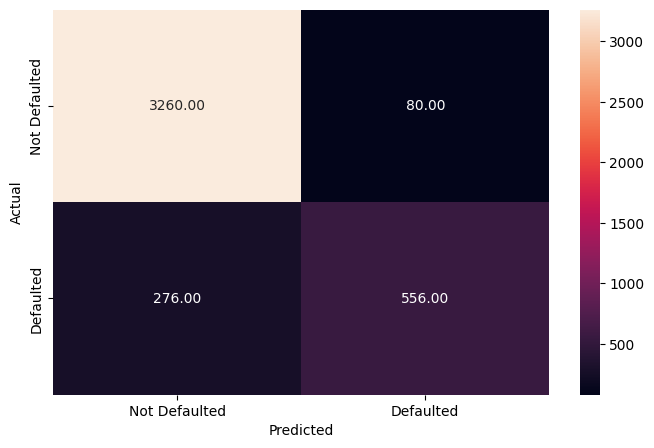

In [ ]:
# Checking performance on the training data
y_pred_train_knn = knn.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_knn)

**Observation:**

The recall for class 1 on the train data is low, althought overall peformance is strong.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1431
           1       0.77      0.58      0.66       357

    accuracy                           0.88      1788
   macro avg       0.83      0.77      0.79      1788
weighted avg       0.87      0.88      0.87      1788



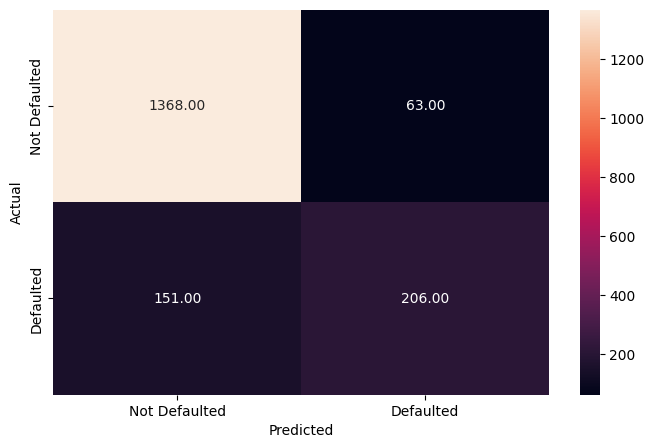

In [ ]:
# Checking performance on the test data
y_pred_test_knn = knn.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_knn)

**Observation:**

The recall for class 1 on the test data is significantly weak. Let's try to fine tune this model to see if we can improve the recall.

### **KNN Hyperparameter Tuning**

In [ ]:
# Pipeline with SMOTE and KNN
pipeline = Pipeline([
    ('smote', SMOTE(random_state=1)),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for KNN
params_knn = {
    'knn__n_neighbors': np.arange(3, 15),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Custom scorer for recall class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# GridSearchCV for tuning
grid_knn = GridSearchCV(
    pipeline,
    params_knn,
    scoring=recall_scorer,
    cv=10,
    verbose=2,
    n_jobs=-1
)

# Fit grid_knn to the data
grid_knn.fit(X_train_scaled, y_train)

# Best estimator after grid search
knn_tuned = grid_knn.best_estimator_

# Fitting the best model to the training data
knn_tuned.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('knn',
                 KNeighborsClassifier(n_neighbors=10, p=1,
                                      weights='distance'))])

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



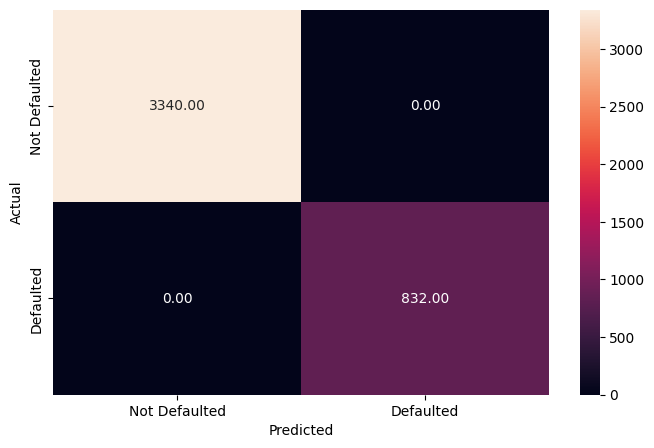

In [ ]:
# Checking performance on the training data
y_pred_train_knn_best = knn_tuned.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_knn_best)

**Observations:**

The model seems overfitting the trainning data, with perfect scores of 100%.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1431
           1       0.78      0.81      0.80       357

    accuracy                           0.92      1788
   macro avg       0.87      0.88      0.87      1788
weighted avg       0.92      0.92      0.92      1788



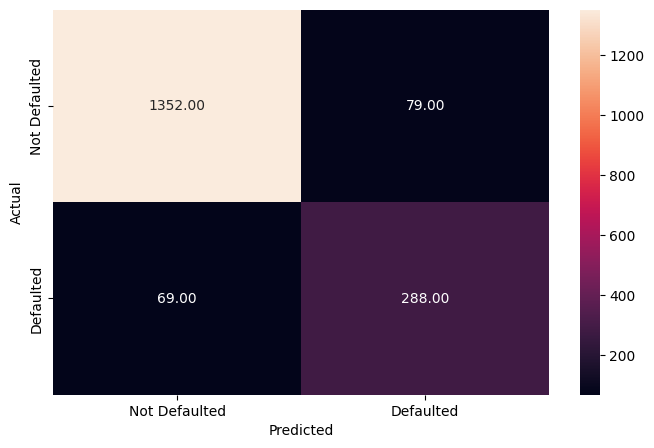

In [ ]:
# Checking performance on the test data
y_pred_test_knn_best = knn_tuned.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_knn_best)

**Observations:**

- The model seems to be overfitting but the results have significantly improved in comparison to the untuned model. Its use can be considered, as the predictive power on the test data is relatively robust. There is about an 81% chance that the model will detect customers who are likely to default.

### Feature Importance

In [ ]:
# Fitting the SHAP explainer
explainer = sh.Explainer(knn_tuned.predict, X_test_scaled)

# Calculating the SHAP values
shap_values = explainer(X_test_scaled)

PermutationExplainer explainer: 1789it [1:12:19,  2.43s/it]


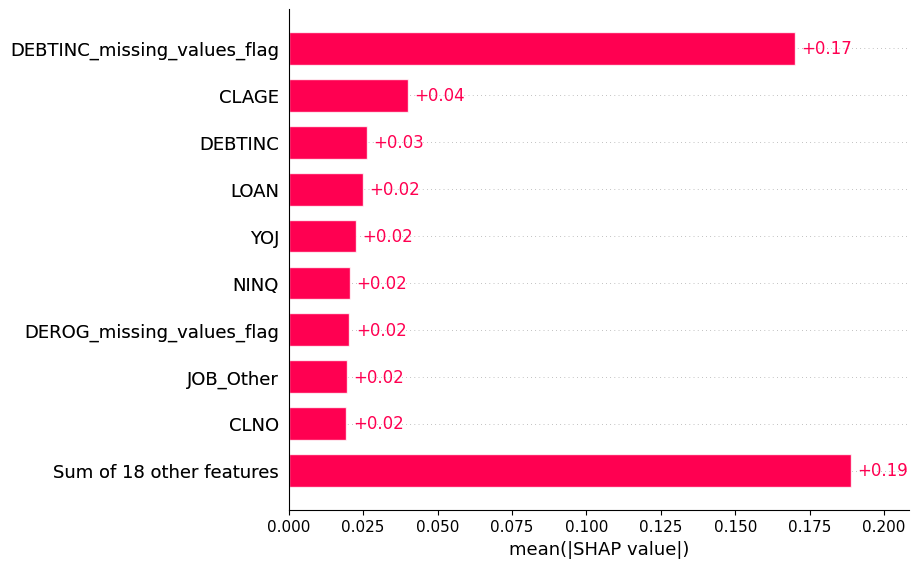

In [ ]:
# Plotting the SHAP values
sh.plots.bar(shap_values)

**Observations:**

- The KNN model feature importance shows a broadly similar story to other models, with some minor differences. Missing values in DEBTINC is the most significant contributor to predicting loan default. DEBTINC ratios are also among the top four contributors, and CLAGE has a significant role, as indicated in other models as well. However, the KNN model also assigns relevance to LOAN and YOJ.
- Let's see if we can get even better performance with other models.

## **Building a Linear Discriminant Analysis (LDA) Model**

LDA is less sensitive to the scale of the data because it focuses on maximizing the separability between different classes based on variance, rather than on the absolute values of the features. We will use the scaled variables for consistency in this section.

In [ ]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model
lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3340
           1       0.64      0.67      0.66       832

    accuracy                           0.86      4172
   macro avg       0.78      0.79      0.78      4172
weighted avg       0.86      0.86      0.86      4172



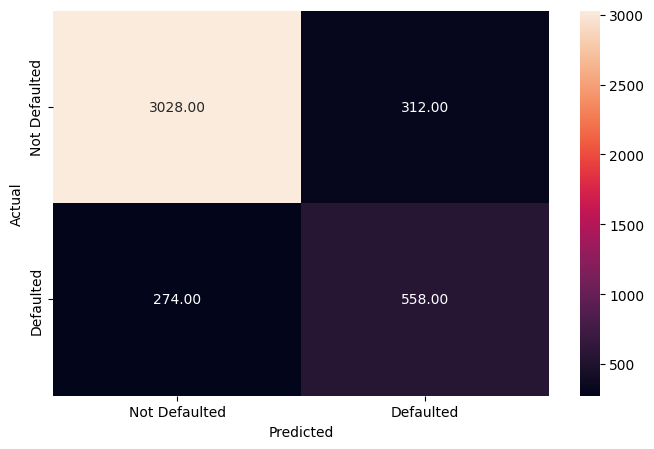

In [ ]:
# Checking performance on the training data
y_pred_train_lda = lda.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_lda)

**Observation:**

The model shows a relatively modest performance on the train data.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1431
           1       0.65      0.66      0.65       357

    accuracy                           0.86      1788
   macro avg       0.78      0.79      0.78      1788
weighted avg       0.86      0.86      0.86      1788



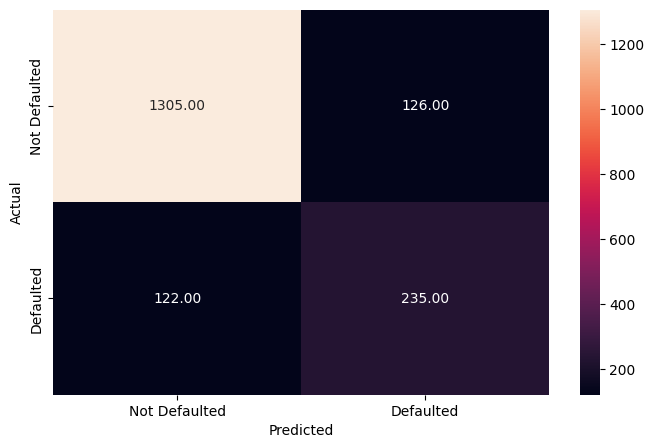

In [ ]:
# Checking performance on the test data
y_pred_test_lda = lda.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_lda)

**Observations:**

Although accuracy is about 86%, the model struggles to adequately identify the minority class, including a relatively low recall for class 1.



### Check coefficients

In [ ]:
# Creating list of column names
cols = X_train_scaled.columns

# Saving coefficients (discriminant loadings) of LDA model
coef_lda = lda.coef_

# Printing the coefficients
pd.DataFrame(coef_lda, columns=cols).T.sort_values(by=0, ascending=False)

0
DEBTINC_missing_values_flag  1.889087e+00
VALUE_missing_values_flag    6.782407e-01
DEBTINC                      4.357623e-01
NINQ                         2.455292e-01
CLAGE_missing_values_flag    2.449853e-01
CLNO_missing_values_flag     1.985319e-01
MORTDUE_missing_values_flag  1.810335e-01
REASON_HomeImp               1.639822e-01
JOB_Sales                    1.451587e-01
CLNO                         7.817623e-02
NINQ_missing_values_flag     6.714422e-02
VALUE                        6.635380e-02
JOB_Self                     5.636966e-02
REASON_missing_values_flag   5.065427e-02
DELINQ                       3.205626e-16
DEROG                        7.749425e-17
JOB_Other                   -6.563267e-03
LOAN                        -7.920144e-02
JOB_ProfExe                 -1.369012e-01
YOJ                         -1.585712e-01
MORTDUE                     -1.797254e-01
JOB_Office                  -1.808192e-01
YOJ_missing_values_flag     -2.150189e-01
DEROG_missing_values_flag   -2.432755e-01
DELINQ_missing_values_flag  -2.608143e-01
JOB_missing_values_flag     -3.385237e-01
CLAGE                       -4.292882e-01

**Observations:**

-  This table shows the contribution of each feature to the linear combinations (discriminant functions) used by LDA to separate different classes.
- Despite some differences, the pattern is broadly in line with prior models, with DEBTINC_missing_values_flag at the top of the features that positively affect the default rate. The DEBTINC ratio is also among the top three features positively influencing the likelihood of default, while NINQ is within the top 4.
- Meanwhile, CLAGE, MORTDUE, and LOAN negatively influence the risk of default. Let's see if we can improve performance by adjusting the classification threshold with aid of the Precision-Recall Curve.

### Precision-Recall Curve for LDA

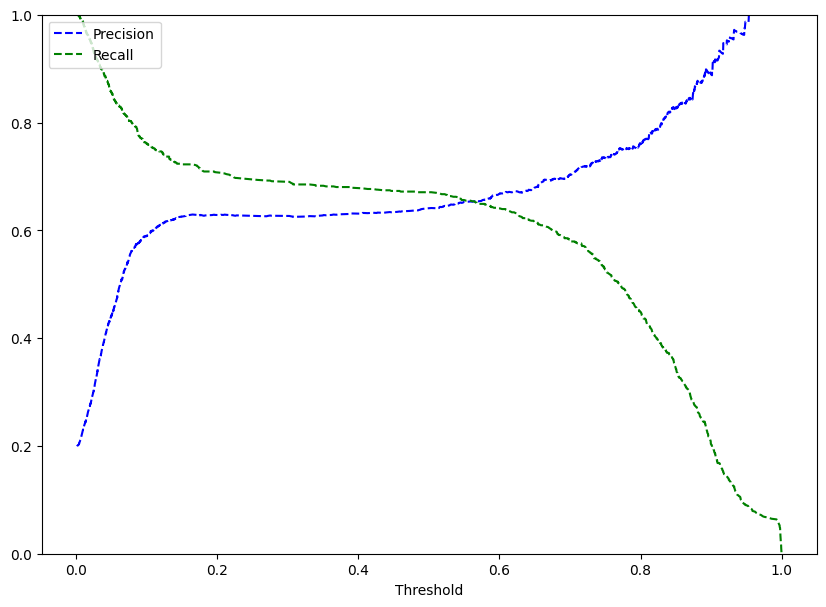

In [ ]:
# Getting probabilities for each class
y_scores_lda = lda.predict_proba(X_train_scaled)

# Calculating precision and recall for various thresholds
precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:, 1])

# Plotting precision and recall as functions of the threshold
plt.figure(figsize=(10, 7))
plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label='Precision')
plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()

**Observation:**

We can see that the precision and the recall are balanced for a threshold of about ~0.55. However, as precision remains relatively high despite a lower threshold, we can experiment with a value of 0.2.

In [ ]:
# Setting a threshold for classification
optimal_threshold_lda = 0.2

# Creating LDA model with the new threshold
lda_optimized = LinearDiscriminantAnalysis()
lda_optimized.threshold = optimal_threshold_lda

# Fitting the LDA model on the training data
lda_optimized.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3340
           1       0.63      0.71      0.67       832

    accuracy                           0.86      4172
   macro avg       0.78      0.80      0.79      4172
weighted avg       0.87      0.86      0.86      4172



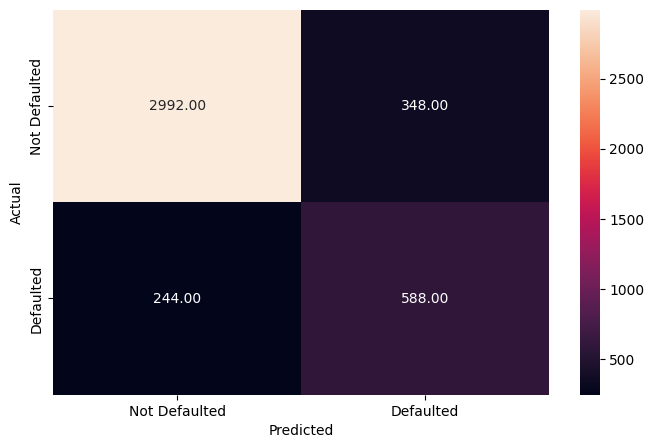

In [ ]:
# Predict probabilities on the training data
y_scores_train_lda = lda_optimized.predict_proba(X_train_scaled)

# Apply the threshold to get binary predictions
y_pred_train_binary_lda = (y_scores_train_lda[:, 1] > lda_optimized.threshold).astype(int)

# Checking performance on the training data
metrics_score(y_train, y_pred_train_binary_lda)

**Observation:**

The recall on class 1 on the train data has improved compared to the default LDA model, maintaining a high accuracy.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1431
           1       0.64      0.70      0.67       357

    accuracy                           0.86      1788
   macro avg       0.78      0.80      0.79      1788
weighted avg       0.87      0.86      0.86      1788



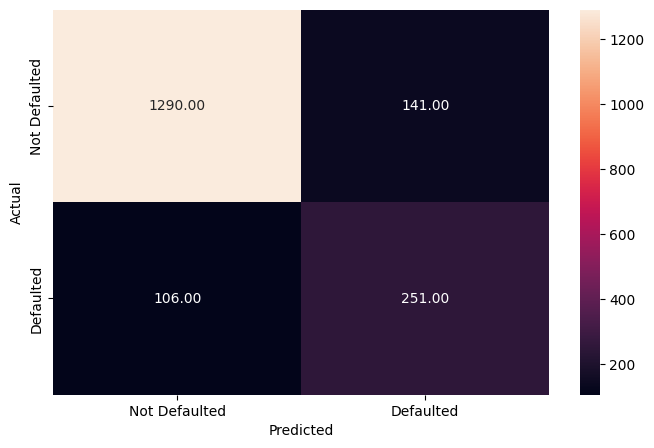

In [ ]:
# Predict probabilities on the test data
y_scores_test_lda = lda_optimized.predict_proba(X_test_scaled)

# Apply the optimal threshold to get binary predictions
y_pred_test_binary_lda = (y_scores_test_lda[:, 1] > lda_optimized.threshold).astype(int)

# Evaluate performance on the test data
metrics_score(y_test, y_pred_test_binary_lda)

**Observations:**

- The recall on class 1 on the test data has also increased from the default LDA model, while maintaining a high accuracy.
- However, the recall remains lower than prior model's. Let's see if we can achieve improved performance with a slightly similar model.

## **Building a Quadratic Discriminant Analysis (QDA) model**

Quadratic Discriminant Analysis (QDA) is similar to LDA in that it is less sensitive to the scale of features compared to distance-based algorithms like KNN or SVM. We will use scaled features for consistency. Given that QDA can be particularly sensitive to irrelevant features, we will use the feature selected X matrices.

In [ ]:
# Define the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the QDA model
qda.fit(X_train_selected_scaled, y_train)

QuadraticDiscriminantAnalysis()

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3340
           1       0.65      0.65      0.65       832

    accuracy                           0.86      4172
   macro avg       0.78      0.78      0.78      4172
weighted avg       0.86      0.86      0.86      4172



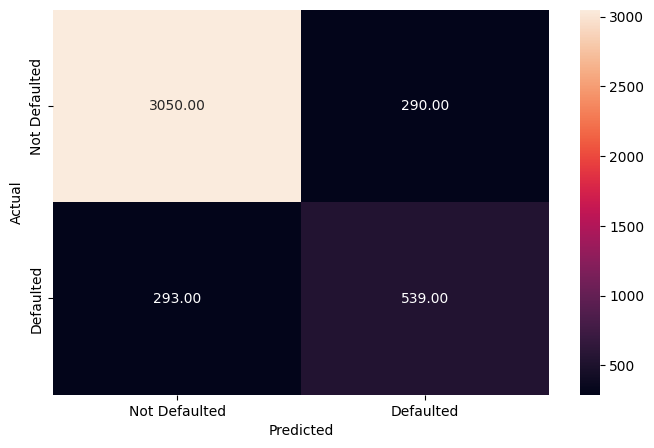

In [ ]:
# Predicting on the training data
y_pred_train_qda = qda.predict(X_train_selected_scaled)

# Evaluating performance on the training data
metrics_score(y_train, y_pred_train_qda)

**Observation**:

Performance is moderate on the train data, including weak class 1 recall.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1431
           1       0.67      0.63      0.65       357

    accuracy                           0.87      1788
   macro avg       0.79      0.78      0.78      1788
weighted avg       0.86      0.87      0.86      1788



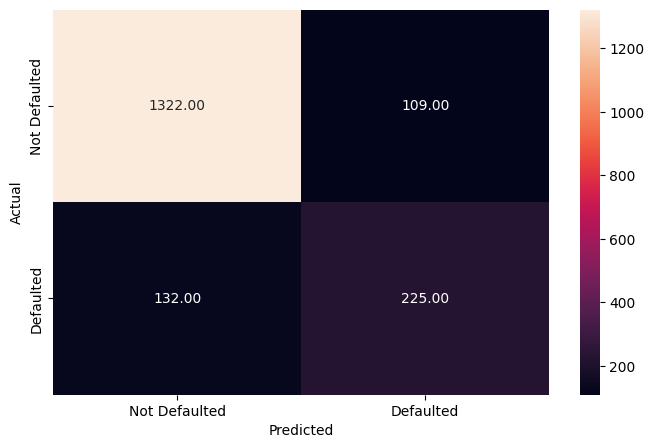

In [ ]:
# Predicting on the test data
y_pred_test_qda = qda.predict(X_test_selected_scaled)

# Evaluating performance on the test data
metrics_score(y_test, y_pred_test_qda)

**Observation:**

The model is struggling to adequately identify the minority class, with low metrics for class 1. Let's see if we can achieve improved performance with other models.

## **Building a Support Vector Machine (SVM) Model**

In [ ]:
# Define the SVM model
svm = SVC(probability=True)  # 'probability=True' is needed for predict_proba

# Fit the SVM model
svm.fit(X_train_scaled, y_train)

SVC(probability=True)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3340
           1       0.80      0.71      0.75       832

    accuracy                           0.91      4172
   macro avg       0.86      0.83      0.84      4172
weighted avg       0.90      0.91      0.90      4172



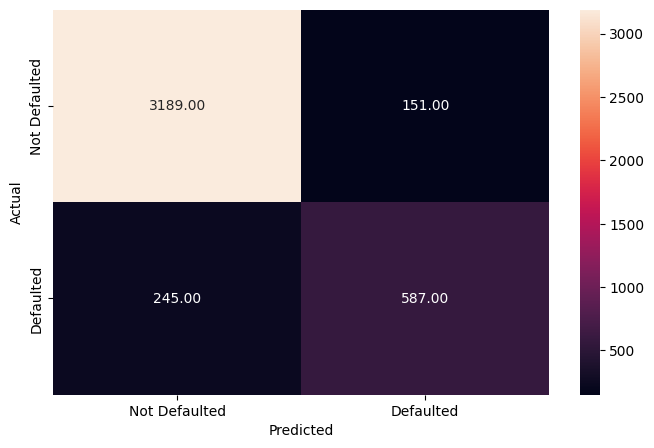

In [ ]:
# Checking performance on the training data
y_pred_train_svm = svm.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

**Observation:**

Performance on the train data seems relatively strong, although the model lags in the recall for class 1.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1431
           1       0.76      0.64      0.69       357

    accuracy                           0.89      1788
   macro avg       0.84      0.79      0.81      1788
weighted avg       0.88      0.89      0.88      1788



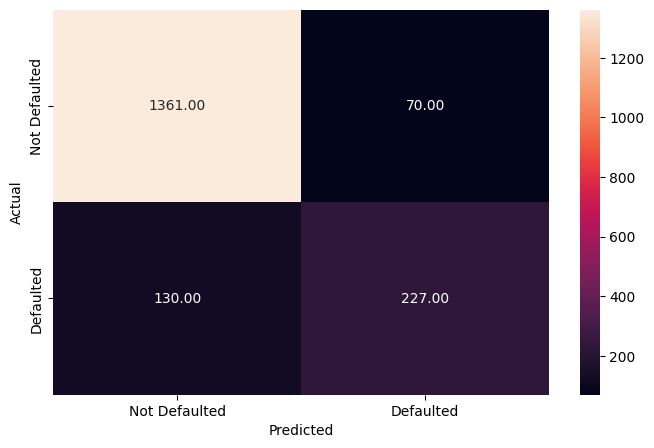

In [ ]:
# Checking performance on the test dataset
y_pred_test_svm = svm.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

**Observation:**

The recall for class is 1 on the test data is relatively low. Let's see if we can improve performance by tuning the model.

### **SVM Hyperparameter Tuning**

In [ ]:
# Pipeline with SMOTE and SVM
pipeline = Pipeline([
    ('smote', SMOTE(random_state=1)),
    ('svm', SVC(random_state=1))
])

# Define a parameter grid for SVM
param_grid = {
    'svm__C': [1, 5, 10],
    'svm__gamma': ['scale', 0.05, 0.1],
    'svm__kernel': ['rbf', 'poly', 'sigmoid']
}

# Custom scorer for recall class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# RandomizedSearchCV for tuning with SMOTE
random_search_svm = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=10,
    scoring=recall_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

# Fit random_search to the data
random_search_svm.fit(X_train_scaled, y_train)

# Best estimator after random search
svm_tuned= random_search_svm.best_estimator_

# Fitting the best SVM model to the training data
svm_tuned.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('svm', SVC(C=1, gamma=0.05, random_state=1))])

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3340
           1       0.72      0.89      0.79       832

    accuracy                           0.91      4172
   macro avg       0.84      0.90      0.87      4172
weighted avg       0.92      0.91      0.91      4172



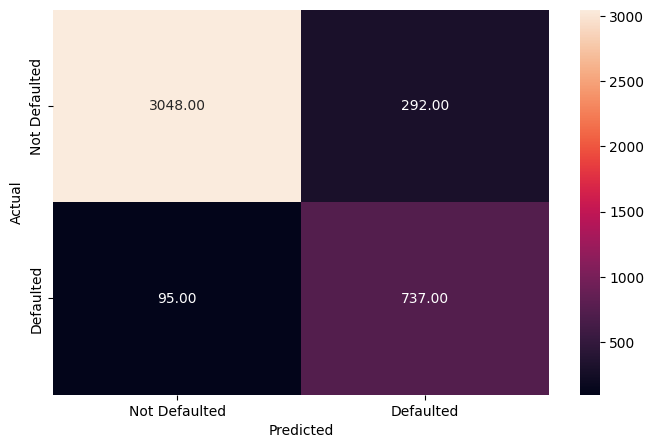

In [ ]:
# Checking performance on the training data
y_pred_train_svm = svm_tuned.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

**Observation:**

The recall for class 1 on the train data significantly increased from the previous model, while maintaining a robust performance.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1431
           1       0.69      0.78      0.73       357

    accuracy                           0.89      1788
   macro avg       0.82      0.85      0.83      1788
weighted avg       0.89      0.89      0.89      1788



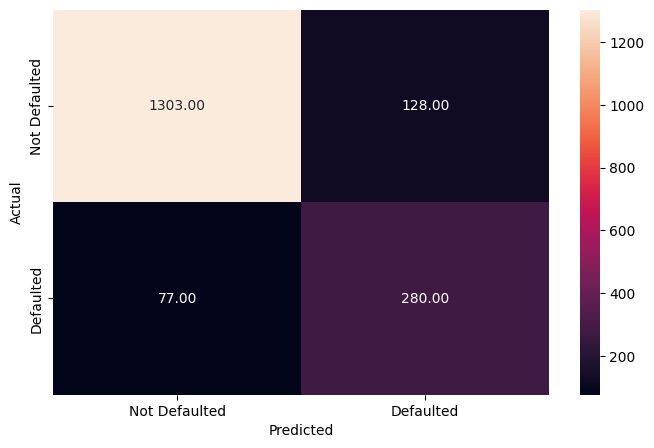

In [ ]:
# Checking performance on the test data
y_pred_test_svm = svm_tuned.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

**Observations:**

- The recall for class 1 on the test data also increased significantly from the untuned model.
- The model shows a relatively sound performance, although it lags at identifying class 1 compared to other models. Let's check the peformance of boosting algorithms.

## **Building an AdaBoost Classifier model**

In [ ]:
# Define the AdaBoost Classifier
adaboost = AdaBoostClassifier(random_state=1)

# Fit the AdaBoost Classifier
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3340
           1       0.84      0.69      0.76       832

    accuracy                           0.91      4172
   macro avg       0.88      0.83      0.85      4172
weighted avg       0.91      0.91      0.91      4172



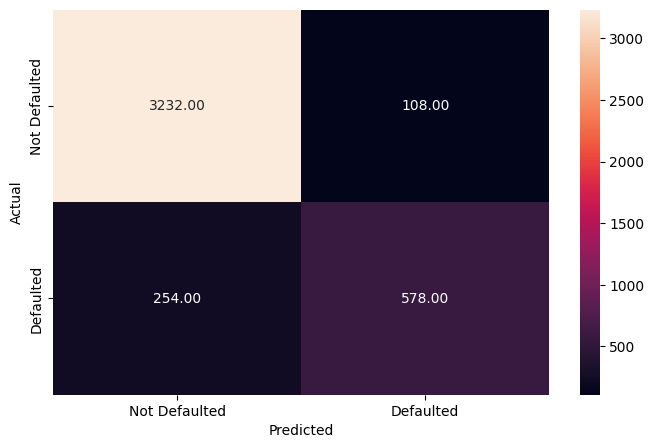

In [ ]:
# Checking performance on the training data
y_pred_train_adaboost = adaboost.predict(X_train)

metrics_score(y_train, y_pred_train_adaboost)

**Observation:**

While accuracy is relatively strong on the train data, the model shows a low recall for class 1.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.84      0.59      0.70       357

    accuracy                           0.90      1788
   macro avg       0.87      0.78      0.82      1788
weighted avg       0.89      0.90      0.89      1788



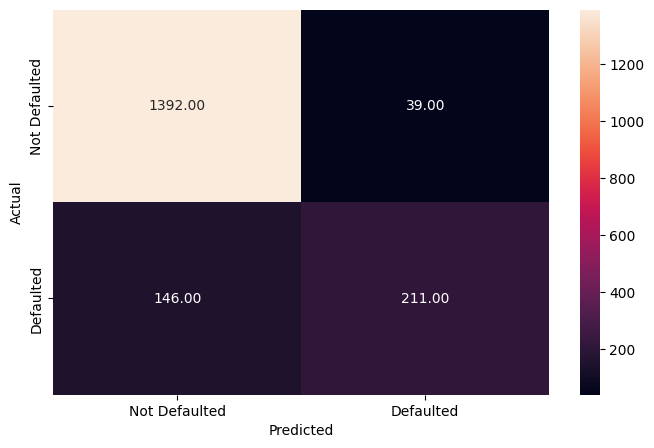

In [ ]:
# Checking performance on the test dataset
y_pred_test_adaboost = adaboost.predict(X_test)

metrics_score(y_test, y_pred_test_adaboost)

**Observation:**

While accuracy remains relatively strong on the test data, the recall for class 1 is particularly low. Let's try to improve performance by hyperparameter tuning.

### **AdaBoost Classifier Hyperparameter Tuning**

In [ ]:
# Creating a pipeline with SMOTE and AdaBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=1)),
    ('adaboost', AdaBoostClassifier(random_state=1))
])

# Define the parameter grid
param_grid = {
    'adaboost__n_estimators': [50, 100, 150],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Custom scorer for recall class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# RandomizedSearchCV for tuning
random_search_adaboost = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=10,
    scoring=recall_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

# Fit random_search to the data
random_search_adaboost.fit(X_train, y_train)

# Best estimator after random search
adaboost_tuned = random_search_adaboost.best_estimator_

# Fitting the best model to the training data
adaboost_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('adaboost',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=100,
                                    random_state=1))])

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3340
           1       0.65      0.78      0.71       832

    accuracy                           0.87      4172
   macro avg       0.80      0.84      0.82      4172
weighted avg       0.89      0.87      0.88      4172



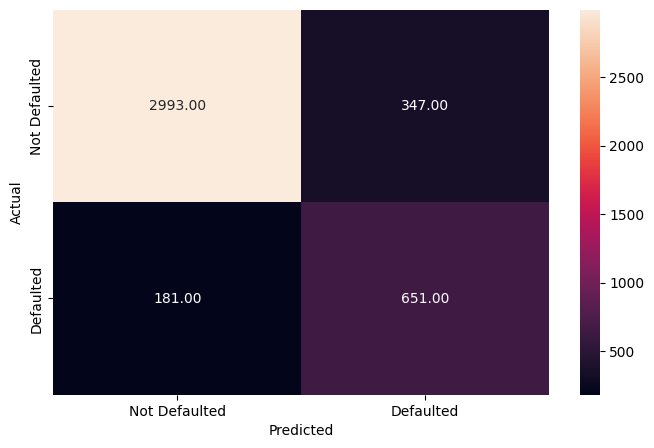

In [ ]:
# Checking performance on the training data
y_pred_train_adaboost_tuned = adaboost_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_adaboost_tuned)

**Observation:**

The class 1 recall on the train data has improved, although it remains moderate.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1431
           1       0.65      0.75      0.69       357

    accuracy                           0.87      1788
   macro avg       0.79      0.82      0.81      1788
weighted avg       0.88      0.87      0.87      1788



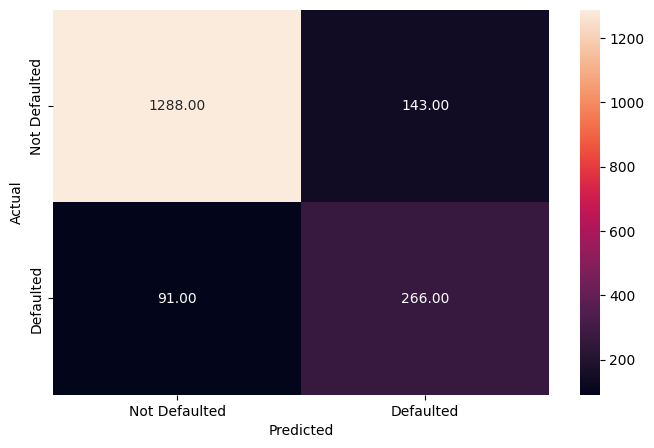

In [ ]:
# Checking performance on the test data
y_pred_test_adaboost_tuned = adaboost_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_adaboost_tuned)

**Observation:**

The metrics for class 1 on the test data remain weak. Let's check if we can get improved performance with a gradient boosting model.


## **Building a Gradient Boosting Classifier model**

In [ ]:
# Define the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=1)

# Fit the Gradient Boosting Classifier
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3340
           1       0.89      0.74      0.81       832

    accuracy                           0.93      4172
   macro avg       0.91      0.86      0.88      4172
weighted avg       0.93      0.93      0.93      4172



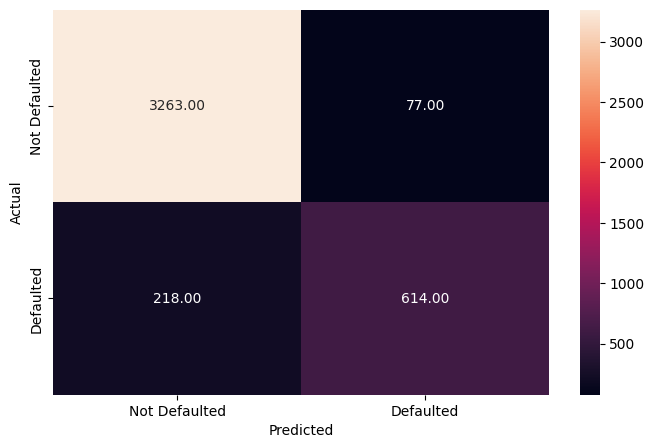

In [ ]:
# Checking performance on the training data
y_pred_train_gbc = gbc.predict(X_train)

metrics_score(y_train, y_pred_train_gbc)

**Observation:**

Despite a strong accuracy on the train data, the recall for class 1 is only decent.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.85      0.62      0.72       357

    accuracy                           0.90      1788
   macro avg       0.88      0.80      0.83      1788
weighted avg       0.90      0.90      0.90      1788



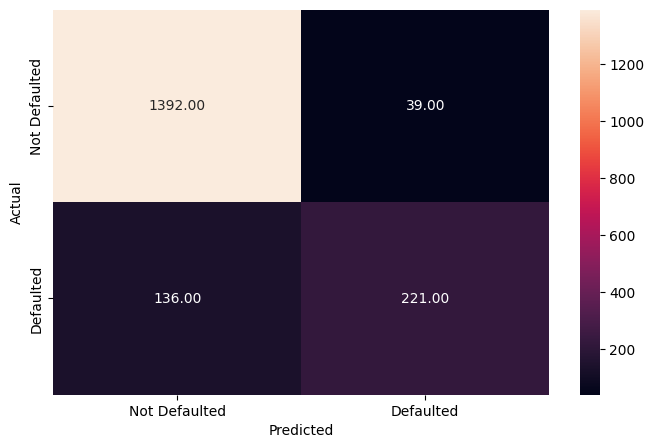

In [ ]:
# Checking performance on the test data
y_pred_test_gbc = gbc.predict(X_test)

metrics_score(y_test, y_pred_test_gbc)

**Observation:**

Despite maintaining a strong accuracy on the test data, the recall for class 1 is low. Let's try to improve performance by hyperparameter tuning.

### **Gradient Boosting Classifier Hyperparameter Tuning**

In [ ]:
# Pipeline with SMOTE and Gradient Boosting
pipeline = Pipeline([
    ('smote', SMOTE(random_state=1)),
    ('gbc', GradientBoostingClassifier(random_state=1))
])

# Define a parameter grid
param_grid = {
    'gbc__n_estimators': [150, 200],
    'gbc__learning_rate': [0.01, 0.05],
    'gbc__max_depth': [2, 3],
    'gbc__min_samples_split': [4, 6],
    'gbc__min_samples_leaf': [1, 2]
}

# Custom scorer for recall class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# RandomizedSearchCV for tuning
random_search_gbc = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=10,
    scoring=recall_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

# Fit random_search to the data
random_search_gbc.fit(X_train, y_train)

# Best estimator after random search
gbc_tuned = random_search_gbc.best_estimator_

# Fitting the best model to the training data
gbc_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=2,
                                            min_samples_split=4,
                                            n_estimators=200,
                                            random_state=1))])

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3340
           1       0.72      0.78      0.75       832

    accuracy                           0.90      4172
   macro avg       0.83      0.85      0.84      4172
weighted avg       0.90      0.90      0.90      4172



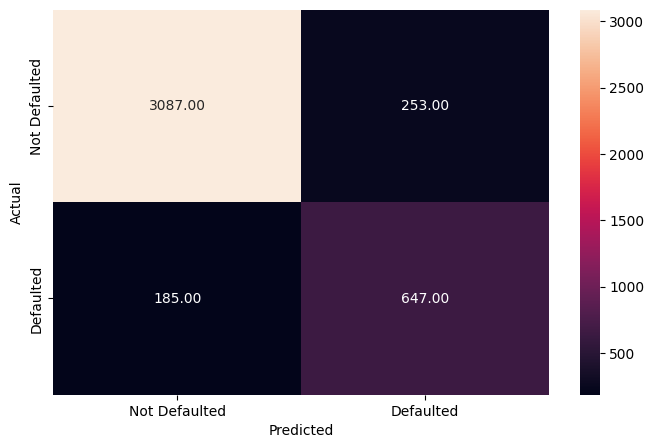

In [ ]:
# Checking performance on the training data
y_pred_train_gbc_tuned = gbc_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_gbc_tuned)

**Observation:**

The model has a relatively strong performance on the train data, although the recall for class 1 remains decent.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1431
           1       0.71      0.72      0.72       357

    accuracy                           0.89      1788
   macro avg       0.82      0.82      0.82      1788
weighted avg       0.89      0.89      0.89      1788



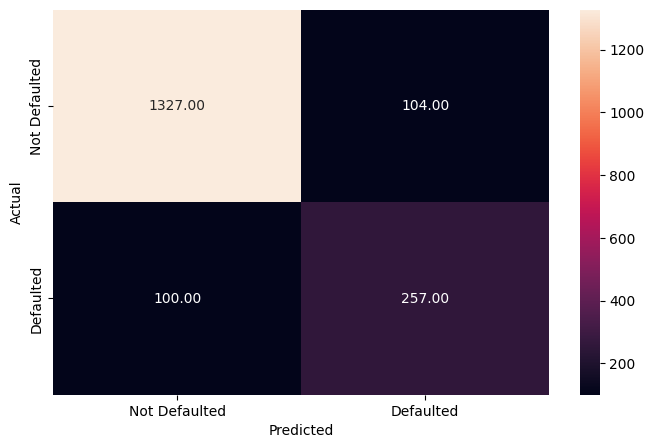

In [ ]:
# Checking performance on the test data
y_pred_test_gbc_tuned = gbc_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_gbc_tuned)

**Observation:**

Overall performance on the test data remains robust, although the recall for class 1 continues to lag. Let's check how an XGBClassifier performs on our data.

## **Building an XGBClassifier model**

In [ ]:
# Define the XGBoost Classifier
xgb = XGBClassifier(random_state=1, eval_metric='logloss')

# Fit the XGBoost Classifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



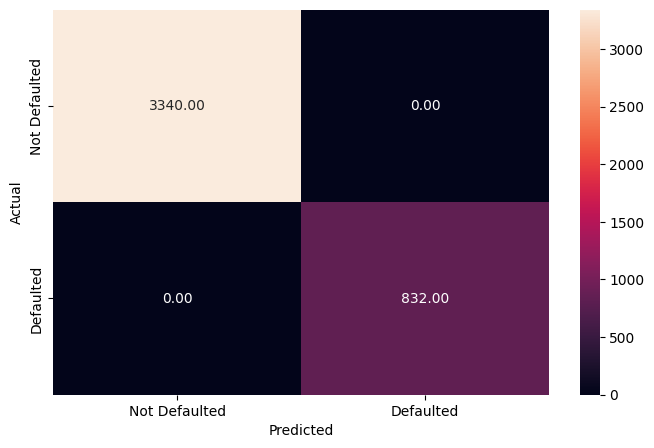

In [ ]:
# Checking performance on the training data
y_pred_train_xgb = xgb.predict(X_train)

metrics_score(y_train, y_pred_train_xgb)

**Observation:**

The model seems overfitting the training data, with perfect scores of 100%.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1431
           1       0.88      0.71      0.79       357

    accuracy                           0.92      1788
   macro avg       0.91      0.85      0.87      1788
weighted avg       0.92      0.92      0.92      1788



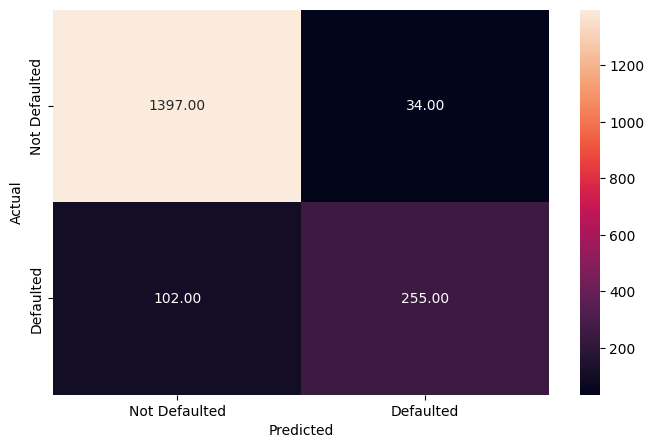

In [ ]:
# Checking performance on the test data
y_pred_test_xgb = xgb.predict(X_test)

metrics_score(y_test, y_pred_test_xgb)

**Observation:**

Overall performance is strong, but the recall for class 1 is moderate. Let's see if we can get better performance by hyperparameter tuning.

### **XGBClassifier Hyperparameter Tuning**

In [ ]:
# Pipeline with SMOTE and XGBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=1)),
    ('xgb', XGBClassifier(random_state=1, eval_metric='logloss'))
])

# Parameter grid
param_grid = {
    'xgb__n_estimators': [150, 200],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__max_depth': [3, 4],
    'xgb__gamma': [0.2, 0.3, 0.4],
    'xgb__min_child_weight': [2, 3],
    'xgb__scale_pos_weight': [2, 3, 4],
    'xgb__lambda': [1, 1.5, 2]  # L2 regularization
}

# Custom scorer for recall class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# RandomizedSearchCV for tuning
random_search_xgb = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=10,
    scoring=recall_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

# Fit random_search to the data
random_search_xgb.fit(X_train, y_train)

# Best estimator after random search
xgb_tuned = random_search_xgb.best_estimator_

# Fitting the best model
xgb_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=0.4, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=1.5,
                               learning_rate=0.1, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3340
           1       0.70      0.92      0.80       832

    accuracy                           0.91      4172
   macro avg       0.84      0.91      0.87      4172
weighted avg       0.92      0.91      0.91      4172



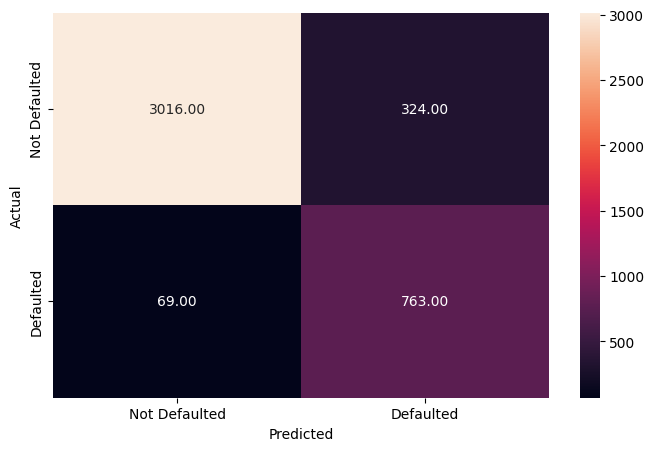

In [ ]:
# Checking performance on the training data
y_pred_train_xgb_tuned= xgb_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_xgb_tuned)

**Observation:**

Performance on the train data is robust, including high recall on class 1.

### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1431
           1       0.66      0.82      0.73       357

    accuracy                           0.88      1788
   macro avg       0.80      0.85      0.83      1788
weighted avg       0.89      0.88      0.88      1788



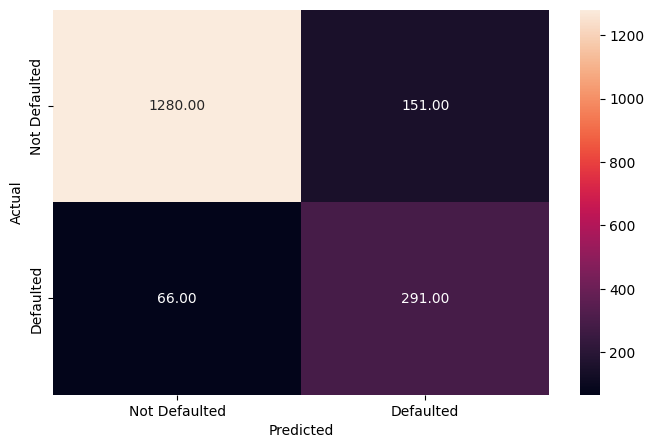

In [ ]:
# Checking performance on the test data
y_pred_test_xgb_tuned= xgb_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_xgb_tuned)

**Observation:**

The recall for class 1 on the test data at 0.82 is as high as the decision tree's, thus the model stands among our strongest predictors.

## **Building an Artificial Neural Network (ANN)**

**Clearing the backend and fixing seeds for random number generators**

In [ ]:
# Clearing the backend
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

**Building a feed forward Artificial Neural Network (ANN) with 2 hidden layers and the output layer**

In [ ]:
# We will be adding the layers sequentially
ann_model = Sequential()

# First hidden layer with 50 neurons and 'relu' activation. Input shape indicates the number of features in the dataset.
ann_model.add(Dense(50, activation='relu', input_shape=(27,)))

# Adding Dropout to prevent overfitting (20% of neurons)
ann_model.add(Dropout(0.2))

# Second hidden layer with 12 neurons and 'relu' activation
ann_model.add(Dense(12, activation='relu'))

# Adding Dropout to prevent overfitting (10% of neurons)
ann_model.add(Dropout(0.1))

# Output layer with 1 neuron (binary classification) and 'sigmoid' activation
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(loss='binary_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

# Model summary
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1400      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                612       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 2025 (7.91 KB)
Trainable params: 2025 (7.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))

# Fit the model
history_1 = ann_model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=150,
    class_weight=class_weights_dict,
    verbose=2
)

Epoch 1/150
118/118 - 1s - loss: 0.6832 - accuracy: 0.6420 - val_loss: 0.6424 - val_accuracy: 0.6124 - 1s/epoch - 12ms/step
Epoch 2/150
118/118 - 0s - loss: 0.6184 - accuracy: 0.6878 - val_loss: 0.6044 - val_accuracy: 0.7105 - 268ms/epoch - 2ms/step
Epoch 3/150
118/118 - 0s - loss: 0.5708 - accuracy: 0.7275 - val_loss: 0.5568 - val_accuracy: 0.7560 - 255ms/epoch - 2ms/step
Epoch 4/150
118/118 - 0s - loss: 0.5286 - accuracy: 0.7778 - val_loss: 0.5153 - val_accuracy: 0.7919 - 295ms/epoch - 2ms/step
Epoch 5/150
118/118 - 0s - loss: 0.4944 - accuracy: 0.8093 - val_loss: 0.4801 - val_accuracy: 0.8134 - 268ms/epoch - 2ms/step
Epoch 6/150
118/118 - 0s - loss: 0.4766 - accuracy: 0.8159 - val_loss: 0.4637 - val_accuracy: 0.8278 - 267ms/epoch - 2ms/step
Epoch 7/150
118/118 - 0s - loss: 0.4607 - accuracy: 0.8226 - val_loss: 0.4517 - val_accuracy: 0.8349 - 246ms/epoch - 2ms/step
Epoch 8/150
118/118 - 0s - loss: 0.4660 - accuracy: 0.8191 - val_loss: 0.4523 - val_accuracy: 0.8349 - 261ms/epoch - 2ms

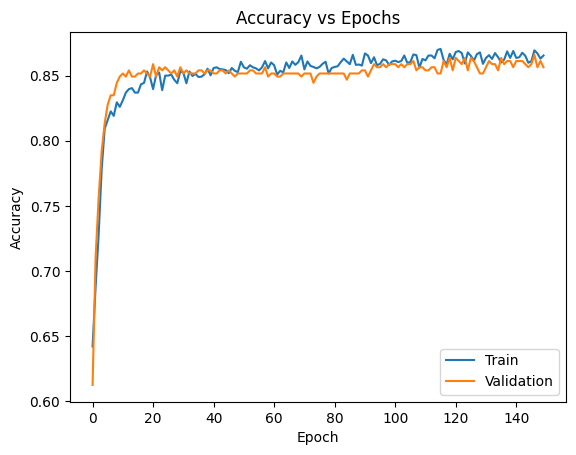

In [ ]:
# Plotting Accuracy vs Epochs
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observation:**

The plot shows a smooth convergence of train and validation errors at a relatively high accuracy.

### Checking the performance on the train dataset

131/131 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8840
Train Accuracy: 88.40%
56/56 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8725
Test Accuracy: 87.25%
131/131 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.89      0.92      3340
           1       0.66      0.87      0.75       832

    accuracy                           0.88      4172
   macro avg       0.81      0.88      0.84      4172
weighted avg       0.90      0.88      0.89      4172



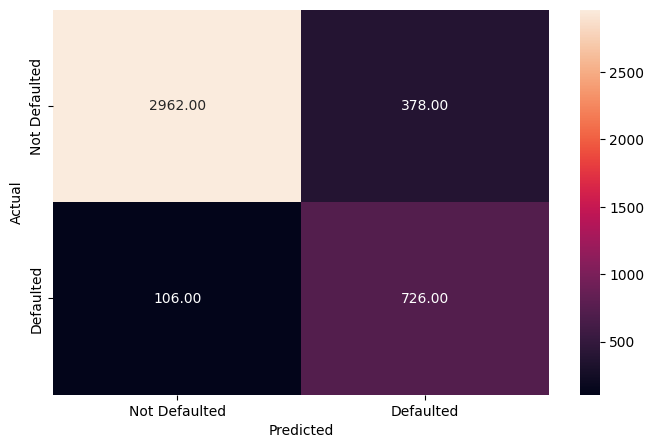

In [ ]:
# Checking performance on the training data
train_loss, train_accuracy = ann_model.evaluate(X_train_scaled, y_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluating performance on the test data
test_loss, test_accuracy = ann_model.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Predicting on the train data
y_pred_train_ann = ann_model.predict(X_train_scaled)
y_pred_train_ann = (y_pred_train_ann > 0.5).astype(int) # Convert probabilities to binary predictions

# Confusion matrix for the train data
metrics_score(y_train, y_pred_train_ann)

**Observation:**

Overall performance on the train data is relatively strong, including the recall on class 1.

### Checking the performance on the test dataset

131/131 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8840
Train Accuracy: 88.40%
56/56 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8725
Test Accuracy: 87.25%
56/56 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1431
           1       0.64      0.81      0.72       357

    accuracy                           0.87      1788
   macro avg       0.80      0.85      0.82      1788
weighted avg       0.89      0.87      0.88      1788



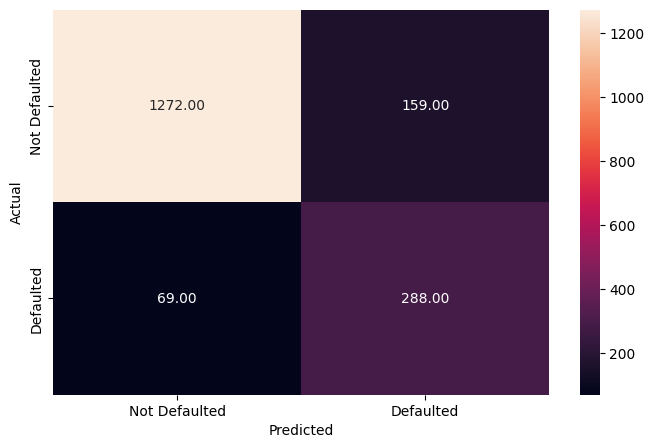

In [ ]:
# Checking performance on the training data
train_loss, train_accuracy = ann_model.evaluate(X_train_scaled, y_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluating performance on the test data
test_loss, test_accuracy = ann_model.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Predicting on the test data
y_pred_test_ann = ann_model.predict(X_test_scaled)
y_pred_test_ann = (y_pred_test_ann > 0.5).astype(int)

# Confusion matrix for the test data
metrics_score(y_test, y_pred_test_ann)

**Observation:**

The recall for class 1 at 0.81 is relativaly robust, while maintaininng a solid performance. Let's try to achieve even better results by hyperparameter tuning.

## **ANN Hyperparameter Tuning**

In [ ]:
# Clearing the backend
K.clear_session()
# Fixing the seed for random number generators
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Define a custom loss function that takes into account the class imbalance

def custom_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    # Constants
    beta = 8  # Weight for the minority class (class 1)
    alpha = 2  # Weight for the majority class (class 0)

    # Calculate binary cross-entropy loss
    bce = K.binary_crossentropy(y_true, y_pred)

    # Apply weights
    weight_vector = y_true * beta + (1 - y_true) * alpha
    weighted_bce = weight_vector * bce

    return K.mean(weighted_bce)

In [ ]:
# Hyperparameter tuning with Keras Tuner

# Function to create the model (accepts hyperparameters as arguments)
def create_model(learn_rate=0.01, neurons=256, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 4, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with standard recall metric
    optimizer = tf.keras.optimizers.Adamax(learning_rate=learn_rate)
    model.compile(loss=custom_loss, optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
keras_estimator = KerasClassifier(model=create_model, verbose=1)

# Define the grid search parameters
param_random = {
    'model__learn_rate': [0.01, 0.05, 0.001],
    'model__neurons': [40, 50, 60, 70, 80],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=keras_estimator, param_distributions=param_random,
                                   n_iter=25, cv=5, verbose=2, n_jobs=-1, random_state=1)

# Fitting the model
random_search_result = random_search.fit(X_train_scaled, y_train, validation_split=0.2)

# Best parameters
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
53/53 [==============================] - 1s 7ms/step - loss: 1.8608 - accuracy: 0.7633 - val_loss: 1.5219 - val_accuracy: 0.8551
Best: 0.851386 using {'model__neurons': 80, 'model__learn_rate': 0.05, 'model__dropout_rate': 0.3, 'batch_size': 64}


In [ ]:
# Check the optimized hyperparameters
random_search_result.best_params_

{'model__neurons': 80,
 'model__learn_rate': 0.05,
 'model__dropout_rate': 0.3,
 'batch_size': 64}

**Build ANN model with optimized hyperparameters**

In [ ]:
# Use the best hyperparameters found by RandomizedSearchCV
best_learn_rate = random_search_result.best_params_['model__learn_rate']
best_batch_size = random_search_result.best_params_['batch_size']

# Create a new model with these best hyperparameters
ann_model_tuned = create_model(learn_rate=best_learn_rate)

# Compile the model
ann_model_tuned.compile(loss=custom_loss, optimizer=tf.keras.optimizers.Adamax(learning_rate=best_learn_rate), metrics=['accuracy'])

# Fit the model to the training data
history_2 = ann_model_tuned.fit(X_train_scaled, y_train, epochs=50, batch_size=best_batch_size, verbose=1, validation_split=0.2, class_weight=class_weights_dict)

Epoch 1/50
53/53 [==============================] - 1s 8ms/step - loss: 2.1458 - accuracy: 0.7740 - val_loss: 1.4902 - val_accuracy: 0.8551
Epoch 2/50
53/53 [==============================] - 0s 4ms/step - loss: 1.4751 - accuracy: 0.8367 - val_loss: 1.5065 - val_accuracy: 0.8587
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 1.3922 - accuracy: 0.8472 - val_loss: 1.3845 - val_accuracy: 0.8479
Epoch 4/50
53/53 [==============================] - 0s 4ms/step - loss: 1.3153 - accuracy: 0.8559 - val_loss: 1.4040 - val_accuracy: 0.8443
Epoch 5/50
53/53 [==============================] - 0s 4ms/step - loss: 1.2871 - accuracy: 0.8556 - val_loss: 1.3304 - val_accuracy: 0.8311
Epoch 6/50
53/53 [==============================] - 0s 4ms/step - loss: 1.2640 - accuracy: 0.8538 - val_loss: 1.3579 - val_accuracy: 0.8599
Epoch 7/50
53/53 [==============================] - 0s 4ms/step - loss: 1.2150 - accuracy: 0.8520 - val_loss: 1.4822 - val_accuracy: 0.8766
Epoch 8/50
53/53 [==

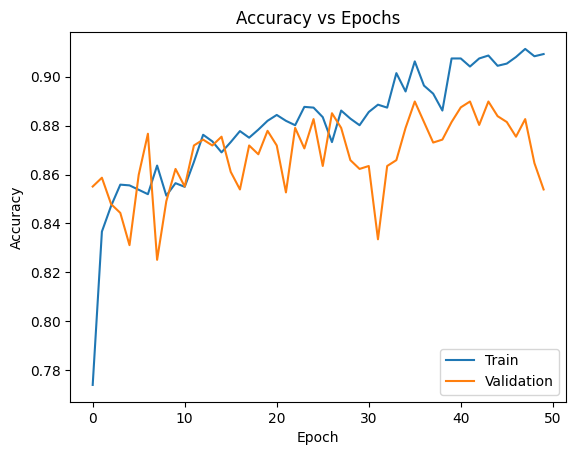

In [ ]:
# Plotting Accuracy vs Epoch
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observation:**

Overall accuracy increases as the epochs increase. In later epochs, there may be a slight divergence between the training and validation metrics, suggesting that the model could be starting to overfit the training data.

### Checking the performance on the train data

131/131 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.9070
Train Accuracy: 90.70%
56/56 [==============================] - 0s 2ms/step - loss: 1.8005 - accuracy: 0.8775
Test Accuracy: 87.75%
131/131 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3340
           1       0.69      0.96      0.80       832

    accuracy                           0.91      4172
   macro avg       0.84      0.93      0.87      4172
weighted avg       0.93      0.91      0.91      4172



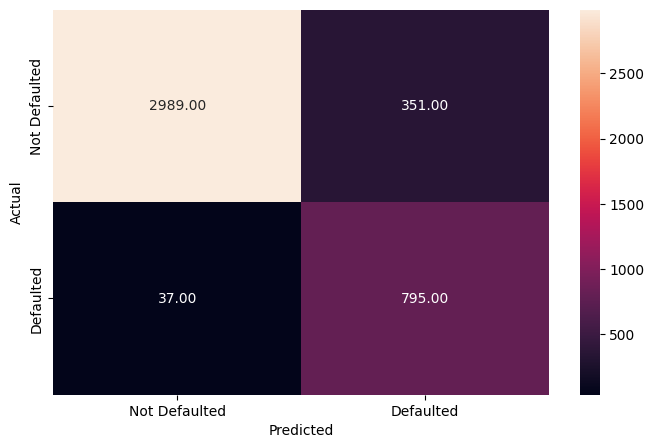

In [ ]:
# Checking performance on the training data
train_loss, train_accuracy = ann_model_tuned.evaluate(X_train_scaled, y_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluating performance on the test data
test_loss, test_accuracy = ann_model_tuned.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Predicting on the train data
y_pred_train_ann_tuned = ann_model_tuned.predict(X_train_scaled)
y_pred_train_ann_tuned = (y_pred_train_ann_tuned > 0.5).astype(int)

# Confusion matrix for the train data
metrics_score(y_train, y_pred_train_ann_tuned)

**Observation:**

The recall for class 1 on the train data is particularly high, indicating that the model is effective at identifying most of the positive cases in the training data.

### Checking the performance on the test data

131/131 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.9070
Train Accuracy: 90.70%
56/56 [==============================] - 0s 2ms/step - loss: 1.8005 - accuracy: 0.8775
Test Accuracy: 87.75%
56/56 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1431
           1       0.65      0.84      0.73       357

    accuracy                           0.88      1788
   macro avg       0.80      0.86      0.83      1788
weighted avg       0.90      0.88      0.88      1788



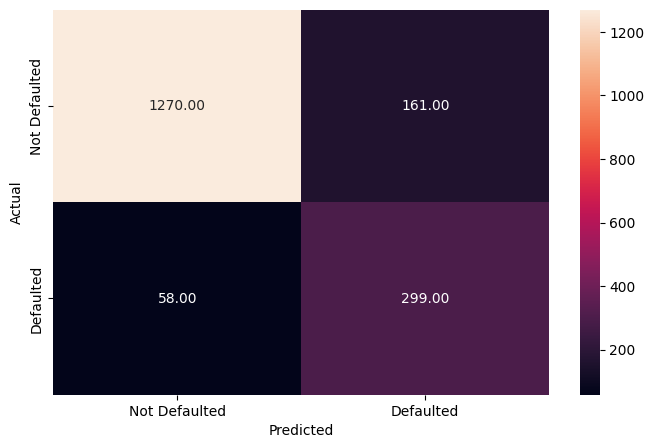

In [ ]:
# Checking performance on the training data
train_loss, train_accuracy = ann_model_tuned.evaluate(X_train_scaled, y_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluating performance on the test data
test_loss, test_accuracy = ann_model_tuned.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Predicting on the test data
y_pred_test_ann_tuned = ann_model_tuned.predict(X_test_scaled)
y_pred_test_ann_tuned = (y_pred_test_ann_tuned > 0.5).astype(int)

# Confusion matrix for the test data
metrics_score(y_test, y_pred_test_ann_tuned)

**Observations:**

- The model attains a strong recall score of 0.84 for class 1 on the test dataset, which indicates that it is effective at identifying customers likely to default.
- The model is slightly overfitting, particularly concerning class 1 recall. This suggests that the model has been fine-tuned to perform well on the training data for this specific task, but it still demonstrates robust predictive capabilities when applied to the test data.
- This comes at a modest cost to precision, given the precision-recall trade-off.

We can also check optimizers to see which one performs better with our data:

1. SGD
2. RMSprop
3. Adam
4. Adadelta
5. Adagrad
6. Adamax
7. Nadam
8. Ftrl

### **Building an ANN with Nadam optimizer**

In [ ]:
# Clearing the backend
K.clear_session()
# Fixing the seed for random number generators
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Model architecture
ann_model_nadam = Sequential()
ann_model_nadam.add(Dense(50, activation='relu', input_shape=(27,)))
ann_model_nadam.add(Dropout(0.2))
ann_model_nadam.add(Dense(12, activation='relu'))
ann_model_nadam.add(Dropout(0.1))
ann_model_nadam.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model_nadam.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Model summary
ann_model_nadam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1400      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                612       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 2025 (7.91 KB)
Trainable params: 2025 (7.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))

# Fit the model
history_3 = ann_model_nadam.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=150,
    class_weight=class_weights_dict,
    verbose=2
)

Epoch 1/150
118/118 - 2s - loss: 0.6379 - accuracy: 0.6838 - val_loss: 0.5719 - val_accuracy: 0.7464 - 2s/epoch - 15ms/step
Epoch 2/150
118/118 - 0s - loss: 0.4973 - accuracy: 0.7914 - val_loss: 0.4676 - val_accuracy: 0.8134 - 266ms/epoch - 2ms/step
Epoch 3/150
118/118 - 0s - loss: 0.4478 - accuracy: 0.8261 - val_loss: 0.4321 - val_accuracy: 0.8469 - 271ms/epoch - 2ms/step
Epoch 4/150
118/118 - 0s - loss: 0.4278 - accuracy: 0.8383 - val_loss: 0.4173 - val_accuracy: 0.8493 - 282ms/epoch - 2ms/step
Epoch 5/150
118/118 - 0s - loss: 0.4115 - accuracy: 0.8527 - val_loss: 0.4236 - val_accuracy: 0.8421 - 271ms/epoch - 2ms/step
Epoch 6/150
118/118 - 0s - loss: 0.4091 - accuracy: 0.8474 - val_loss: 0.3974 - val_accuracy: 0.8541 - 276ms/epoch - 2ms/step
Epoch 7/150
118/118 - 0s - loss: 0.3942 - accuracy: 0.8548 - val_loss: 0.3996 - val_accuracy: 0.8469 - 255ms/epoch - 2ms/step
Epoch 8/150
118/118 - 0s - loss: 0.4059 - accuracy: 0.8420 - val_loss: 0.3907 - val_accuracy: 0.8541 - 254ms/epoch - 2ms

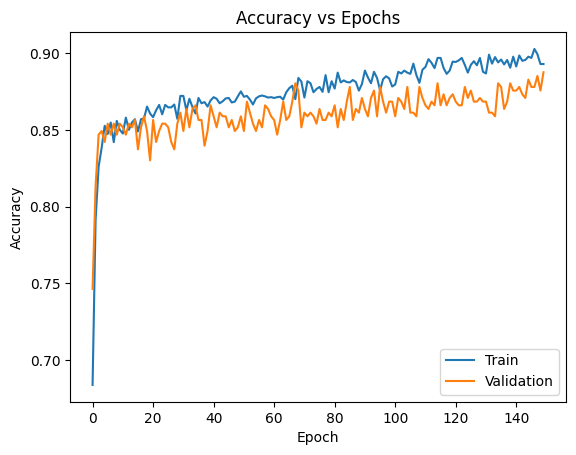

In [ ]:
# Plotting Accuracy vs Epochs
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observation:**

As training progresses, both the training and validation accuracies gradually increase, indicating that the model is learning and improving its ability to make accurate predictions. After 100 epochs the trend starts to stabilize, with less significant improvements.

### Checking the performance on the train dataset

131/131 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9192
Train Accuracy: 91.92%
56/56 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.8876
Test Accuracy: 88.76%
131/131 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3340
           1       0.72      0.96      0.83       832

    accuracy                           0.92      4172
   macro avg       0.86      0.93      0.89      4172
weighted avg       0.94      0.92      0.92      4172



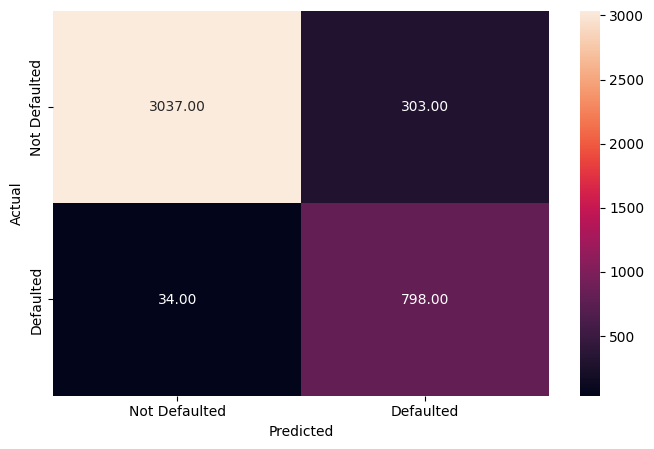

In [ ]:
# Checking performance on the training data
train_loss, train_accuracy = ann_model_nadam.evaluate(X_train_scaled, y_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluating performance on the test data
test_loss, test_accuracy = ann_model_nadam.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Predicting on the train data
y_pred_train_ann_nadam = ann_model_nadam.predict(X_train_scaled)
y_pred_train_ann_nadam = (y_pred_train_ann_nadam > 0.5).astype(int)

# Confusion matrix for the train data
metrics_score(y_train, y_pred_train_ann_nadam)

**Observation:**

The recall for class 1 on the train data is high at 0.96, indicating that the model is effective at identifying most of the positive cases in the training data.

### Checking the performance on the test dataset

131/131 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9192
Train Accuracy: 91.92%
56/56 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.8876
Test Accuracy: 88.76%
56/56 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1431
           1       0.68      0.83      0.75       357

    accuracy                           0.89      1788
   macro avg       0.82      0.87      0.84      1788
weighted avg       0.90      0.89      0.89      1788



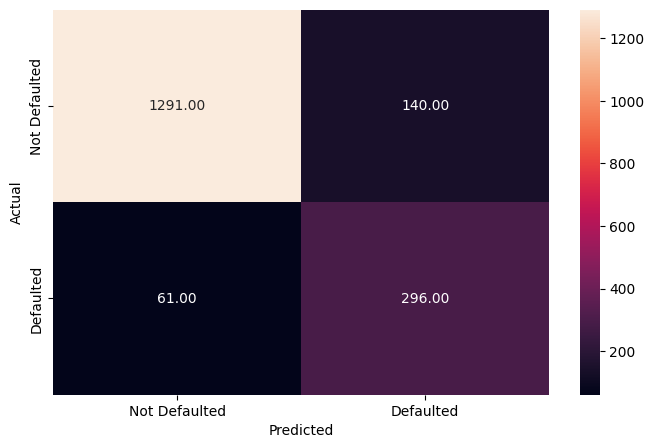

In [ ]:
# Checking performance on the training data
train_loss, train_accuracy = ann_model_nadam.evaluate(X_train_scaled, y_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluating performance on the test data
test_loss, test_accuracy = ann_model_nadam.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Predicting on the test data
y_pred_test_ann_nadam = ann_model_nadam.predict(X_test_scaled)
y_pred_test_ann_nadam = (y_pred_test_ann_nadam > 0.5).astype(int)

# Confusion matrix for the test data
metrics_score(y_test, y_pred_test_ann_nadam)

**Observation:**

The test data exhibits a robust recall of 0.83 for class 1, with only a minor decrease in precision.

### **ANN-Nadam Hyperparameter Tuning**

In [ ]:
# Clearing the backend
K.clear_session()
# Fixing the seed for random number generators
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Function to create the model (accepts hyperparameters as arguments)
def create_model2 (learn_rate=0.01, neurons=256, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 4, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learn_rate)
    model.compile(loss=custom_loss, optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
keras_estimator = KerasClassifier(model=create_model2, verbose=1)

# Define the grid search parameters
param_random = {
    'model__learn_rate': [0.01, 0.05, 0.001],
    'model__neurons': [40, 50, 60, 70, 80],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=keras_estimator, param_distributions=param_random,
                                   n_iter=25, cv=5, verbose=2, n_jobs=-1, random_state=1)

# Fitting the model
random_search_result = random_search.fit(X_train_scaled, y_train, validation_split=0.2)

# Best parameters
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
53/53 [==============================] - 2s 7ms/step - loss: 1.8576 - accuracy: 0.7648 - val_loss: 1.8186 - val_accuracy: 0.8180
Best: 0.845392 using {'model__neurons': 80, 'model__learn_rate': 0.05, 'model__dropout_rate': 0.3, 'batch_size': 64}


In [ ]:
# Check the optimized hyperparameters
random_search_result.best_params_

{'model__neurons': 80,
 'model__learn_rate': 0.05,
 'model__dropout_rate': 0.3,
 'batch_size': 64}

**Build ANN-Nadam model with optimized hyperparameters**

In [ ]:
# Use the best hyperparameters found by RandomizedSearchCV
best_learn_rate = random_search_result.best_params_['model__learn_rate']
best_batch_size = random_search_result.best_params_['batch_size']

# Create a new model with these best hyperparameters
ann_model_nadam_tuned = create_model(learn_rate=best_learn_rate)

# Compile the model
ann_model_nadam_tuned.compile(loss=custom_loss, optimizer=tf.keras.optimizers.Adamax(learning_rate=best_learn_rate), metrics=['accuracy'])

# Fit the best model to the training data
history_4 = ann_model_nadam_tuned.fit(X_train_scaled, y_train, epochs=50, batch_size=best_batch_size, verbose=1, validation_split=0.2, class_weight=class_weights_dict)

Epoch 1/50
53/53 [==============================] - 1s 8ms/step - loss: 2.1458 - accuracy: 0.7740 - val_loss: 1.4902 - val_accuracy: 0.8551
Epoch 2/50
53/53 [==============================] - 0s 5ms/step - loss: 1.4751 - accuracy: 0.8367 - val_loss: 1.5065 - val_accuracy: 0.8587
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 1.3922 - accuracy: 0.8472 - val_loss: 1.3845 - val_accuracy: 0.8479
Epoch 4/50
53/53 [==============================] - 0s 4ms/step - loss: 1.3153 - accuracy: 0.8559 - val_loss: 1.4040 - val_accuracy: 0.8443
Epoch 5/50
53/53 [==============================] - 0s 4ms/step - loss: 1.2871 - accuracy: 0.8556 - val_loss: 1.3304 - val_accuracy: 0.8311
Epoch 6/50
53/53 [==============================] - 0s 5ms/step - loss: 1.2640 - accuracy: 0.8538 - val_loss: 1.3579 - val_accuracy: 0.8599
Epoch 7/50
53/53 [==============================] - 0s 4ms/step - loss: 1.2150 - accuracy: 0.8520 - val_loss: 1.4822 - val_accuracy: 0.8766
Epoch 8/50
53/53 [==

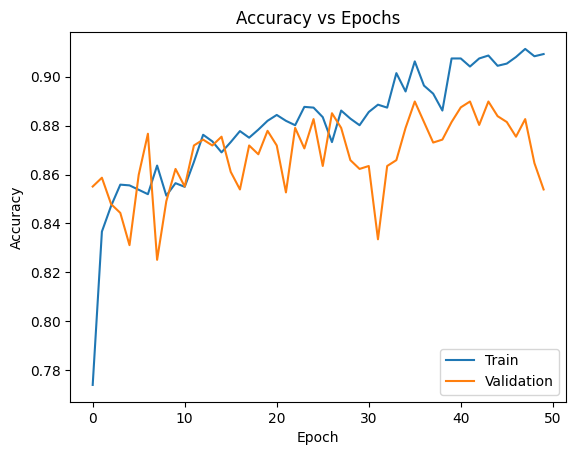

In [ ]:
# Plotting Accuracy vs Epochs
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observation:**

Overall accuracy increases as the epochs increase. In later epochs, there may be a slight divergence between the training and validation accuracy, suggesting that the model could be starting to overfit the training data.

### Checking the performance on the train dataset

131/131 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.9070
Train Accuracy: 90.70%
56/56 [==============================] - 0s 1ms/step - loss: 1.8005 - accuracy: 0.8775
Test Accuracy: 87.75%
131/131 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3340
           1       0.69      0.96      0.80       832

    accuracy                           0.91      4172
   macro avg       0.84      0.93      0.87      4172
weighted avg       0.93      0.91      0.91      4172



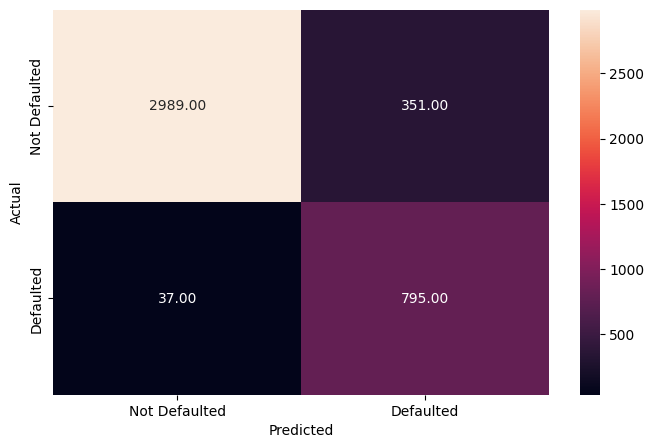

In [ ]:
# Checking performance on the training data
train_loss, train_accuracy = ann_model_nadam_tuned.evaluate(X_train_scaled, y_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluating performance on the test data
test_loss, test_accuracy = ann_model_nadam_tuned.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Predicting on the train data
y_pred_train_ann_nadam_tuned = ann_model_nadam_tuned.predict(X_train_scaled)
y_pred_train_ann_nadam_tuned = (y_pred_train_ann_nadam_tuned > 0.5).astype(int)

# Confusion matrix for the train data
metrics_score(y_train, y_pred_train_ann_nadam_tuned)

**Observation:**

The recall for class 1 on the train data is high at 0.96, indicating that the model is effective at identifying most of the positive cases in the training data.

### Checking the performance on the test dataset

131/131 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.9070
Train Accuracy: 90.70%
56/56 [==============================] - 0s 2ms/step - loss: 1.8005 - accuracy: 0.8775
Test Accuracy: 87.75%
56/56 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1431
           1       0.65      0.84      0.73       357

    accuracy                           0.88      1788
   macro avg       0.80      0.86      0.83      1788
weighted avg       0.90      0.88      0.88      1788



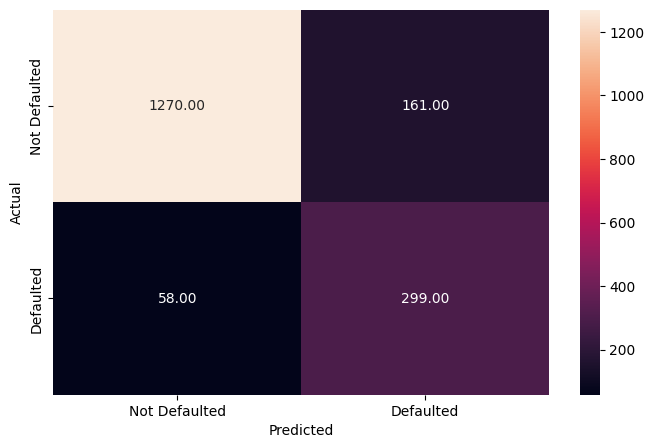

In [ ]:
# Checking performance on the training data
train_loss, train_accuracy = ann_model_nadam_tuned.evaluate(X_train_scaled, y_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluating performance on the test data
test_loss, test_accuracy = ann_model_nadam_tuned.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Predicting on the test data
y_pred_test_ann_nadam_tuned = ann_model_nadam_tuned.predict(X_test_scaled)
y_pred_test_ann_nadam_tuned = (y_pred_test_ann_nadam_tuned > 0.5).astype(int)

# Confusion matrix for the test data
metrics_score(y_test, y_pred_test_ann_nadam_tuned)

**Observation:**

Recall for class 1 on the test data is strong at 0.84. Although there is a slight decrease in precision for class 1, the average metrics remain robust.

### Feature importance

In [ ]:
# Clear the backend
K.clear_session()

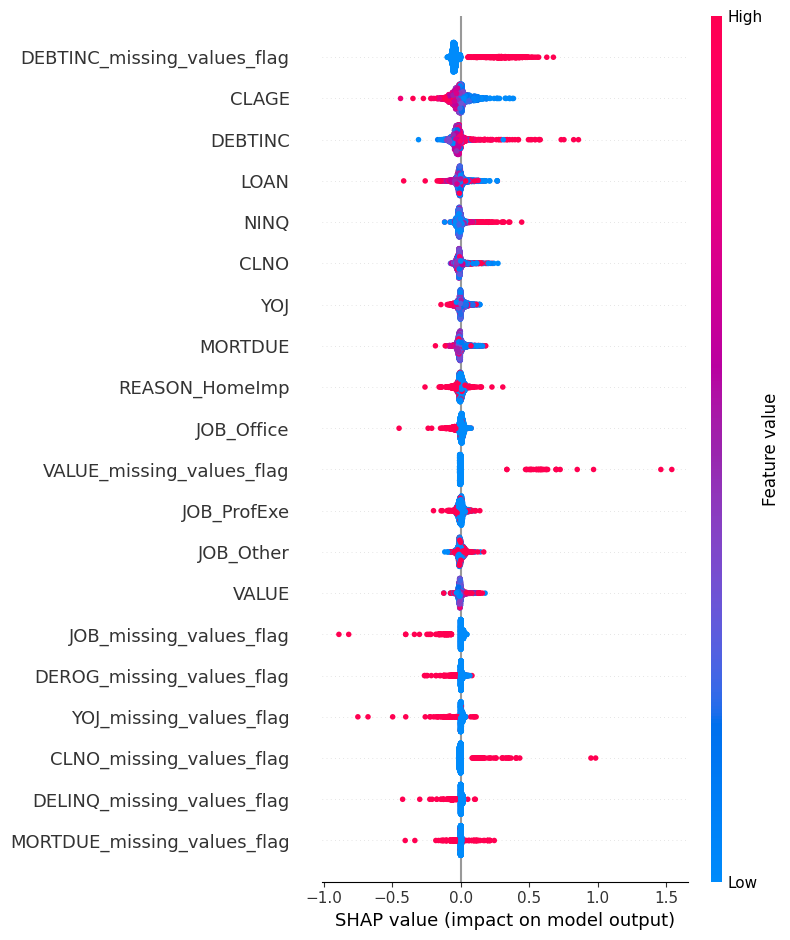

In [ ]:
# Create the SHAP DeepExplainer
explainer = sh.DeepExplainer(ann_model_nadam_tuned, X_train_scaled.values[:100])  # Using .values and a subset for efficiency

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_scaled.values)

# Plot the SHAP summary plot
sh.summary_plot(shap_values[0], X_test_scaled, feature_names=X_train_scaled.columns)

**Observations:**

- The feature importance captures a pattern broadly similar to prior models, particulalry the KNN model.
- Missing values in DEBTINC is the most significant predictor of defaults, while DEBTINC ratios rank third.
- The model also assigns importance to CLAGE, LOAN, and NINQ, among the features with high importance.


## **Comparing Model Performances**

### Comparison frame

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

In [ ]:
# Function for generating a comparison frame for the recall on class 1 for a list of models

def compile_recalls_class1(models, model_datasets, model_class, model_names, custom_thresholds=None):
    """
    Compares the recall of class 1 for different models on their respective train and test datasets.

    Args:
        models (list): A list of models to compare.
        model_datasets (list): A list of tuples, each containing the X_train, y_train, X_test, y_test for each model.
        model_class (list): A list of human-readable model class names.
        model_names (list): A list of model names.
        custom_thresholds (dict, optional): A dictionary of model names and their custom thresholds.

    Returns:
        DataFrame: A DataFrame with the recall of class 1 for each model on train and test data.
    """
    recall_scores = []

    for i, model in enumerate(models):
        X_train, y_train, X_test, y_test = model_datasets[i]
        model_class_name = model_class[i]
        model_code_name = model_names[i]

        # Determine if custom threshold is set for the model
        threshold = custom_thresholds[model_code_name] if model_code_name in custom_thresholds else 0.5

        # Train recall
        if 'ann_model' in model_code_name:  # Check if the model is an ANN model
            train_pred = (model.predict(X_train) > threshold).astype(int)
        else:
            train_pred = model.predict(X_train) if model_code_name not in custom_thresholds else (model.predict_proba(X_train)[:, 1] > threshold).astype(int)
        train_recall = recall_score(y_train, train_pred, pos_label=1)

        # Test recall
        if 'ann_model' in model_code_name:  # Check if the model is an ANN model
            test_pred = (model.predict(X_test) > threshold).astype(int)
        else:
            test_pred = model.predict(X_test) if model_code_name not in custom_thresholds else (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
        test_recall = recall_score(y_test, test_pred, pos_label=1)

        recall_scores.append([model_class_name, model_code_name, train_recall, test_recall])

    return pd.DataFrame(recall_scores, columns=['Model Class', 'Model Name', 'Recall_Train_Class_1', 'Recall_Test_Class_1'])

In [ ]:
# Function for generating a comparison frame for macro averages for a list of models

def compile_macro_averages(models, model_datasets, model_class, model_names, custom_thresholds=None):
    """
    Compares precision, recall, and accuracy for different models on their respective train and test datasets.

    Args:
        models (list): A list of models to compare.
        model_datasets (list): A list of tuples, each containing the X_train, y_train, X_test, y_test for each model.
        model_class (list): A list of human-readable model class names.
        model_names (list): A list of model names.
        custom_thresholds (dict, optional): A dictionary of model names and their custom thresholds.

    Returns:
        DataFrame: A DataFrame with metrics for each model on train and test data.
    """
    metrics_scores = []

    for i, model in enumerate(models):
        X_train, y_train, X_test, y_test = model_datasets[i]
        model_class_name = model_class[i]
        model_code_name = model_names[i]

        # Determine if custom threshold is set for the model
        threshold = custom_thresholds[model_code_name] if model_code_name in custom_thresholds else 0.5

        # Train metrics
        if 'ann_model' in model_code_name:  # Check if the model is an ANN model
            train_pred = (model.predict(X_train) > threshold).astype(int)
        else:
            train_pred = model.predict(X_train) if model_code_name not in custom_thresholds else (model.predict_proba(X_train)[:, 1] > threshold).astype(int)
        train_precision = precision_score(y_train, train_pred, average='macro')
        train_recall = recall_score(y_train, train_pred, average='macro')
        train_accuracy = accuracy_score(y_train, train_pred)

        # Test metrics
        if 'ann_model' in model_code_name:  # Check if the model is an ANN model
            test_pred = (model.predict(X_test) > threshold).astype(int)
        else:
            test_pred = model.predict(X_test) if model_code_name not in custom_thresholds else (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
        test_precision = precision_score(y_test, test_pred, average='macro')
        test_recall = recall_score(y_test, test_pred, average='macro')
        test_accuracy = accuracy_score(y_test, test_pred)

        metrics_scores.append([model_class_name, model_code_name, train_precision, test_precision, train_recall, test_recall, train_accuracy, test_accuracy])

    return pd.DataFrame(metrics_scores, columns=['Model Class', 'Model Name', 'Precision_Train', 'Precision_Test', 'Recall_Train', 'Recall_Test', 'Accuracy_Train', 'Accuracy_Test'])

In [ ]:
# Function for generating a comparison frame for binary metrics on class 1 for a list of models

def compile_binary_metrics_class1(models, model_datasets, model_class, model_names, custom_thresholds=None):
    """
    Compares binary metrics (precision, recall, F1-score) for class 1 for different models on their respective train and test datasets.

     Args:
        models (list): A list of models to compare.
        model_datasets (list): A list of tuples, each containing the X_train, y_train, X_test, y_test for each model.
        model_class (list): A list of human-readable model class names.
        model_names (list): A list of model names.
        custom_thresholds (dict, optional): A dictionary of model names and their custom thresholds.

    Returns:
        DataFrame: A DataFrame with metrics for each model on train and test data.
    """
    metrics_scores = []

    for i, model in enumerate(models):
        X_train, y_train, X_test, y_test = model_datasets[i]
        model_class_name = model_class[i]
        model_code_name = model_names[i]

        # Determine if custom threshold is set for the model
        threshold = custom_thresholds[model_code_name] if model_code_name in custom_thresholds else 0.5

        # Train metrics
        if 'ann_model' in model_code_name:  # Check if the model is an ANN model
            train_pred = (model.predict(X_train) > threshold).astype(int)
        else:
            train_pred = model.predict(X_train) if model_code_name not in custom_thresholds else (model.predict_proba(X_train)[:, 1] > threshold).astype(int)
        train_precision = precision_score(y_train, train_pred, pos_label=1)
        train_recall = recall_score(y_train, train_pred, pos_label=1)
        train_f1 = f1_score(y_train, train_pred, pos_label=1)

        # Test metrics
        if 'ann_model' in model_code_name:  # Check if the model is an ANN model
            test_pred = (model.predict(X_test) > threshold).astype(int)
        else:
            test_pred = model.predict(X_test) if model_code_name not in custom_thresholds else (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
        test_precision = precision_score(y_test, test_pred, pos_label=1)
        test_recall = recall_score(y_test, test_pred, pos_label=1)
        test_f1 = f1_score(y_test, test_pred, pos_label=1)

        metrics_scores.append([model_class_name, model_code_name, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1])

    return pd.DataFrame(metrics_scores, columns=['Model Class', 'Model Name', 'Train_Precision_Class_1', 'Test_Precision_Class_1', 'Train_Recall_Class_1', 'Test_Recall_Class_1', 'Train_F1_Class_1', 'Test_F1_Class_1'])

In [ ]:
# Building lists required in the functions

# Define models
models = [
    lg,
    lg_selected,
    lg_selected_poly,
    lg_selected_poly_optimized,
    dt,
    dt_tuned,
    dt_tuned_selected,
    rf_estimator,
    rf_estimator_weighted,
    rf_estimator_tuned,
    knn,
    knn_tuned,
    lda,
    lda_optimized,
    qda,
    svm,
    svm_tuned,
    adaboost,
    adaboost_tuned,
    gbc,
    gbc_tuned,
    xgb,
    xgb_tuned,
    ann_model,
    ann_model_tuned,
    ann_model_nadam,
    ann_model_nadam_tuned

]

# Corresponding datasets for each model
model_datasets = [
    (X_train_scaled, y_train, X_test_scaled, y_test),  # for lg
    (X_train_selected_scaled, y_train, X_test_selected_scaled, y_test),  # for lg_selected
    (X_train_selected_poly, y_train, X_test_selected_poly, y_test),  # for lg_selected_poly
    (X_train_selected_poly, y_train, X_test_selected_poly, y_test),  # for lg_selected_poly_optimized
    (X_train, y_train, X_test, y_test),  # for dt
    (X_train, y_train, X_test, y_test),  # for dt_tuned
    (X_train_selected, y_train, X_test_selected, y_test),  # for dt_tuned_selected
    (X_train, y_train, X_test, y_test),  # for rf_estimator
    (X_train, y_train, X_test, y_test),  # for rf_estimator_weighted
    (X_train, y_train, X_test, y_test),  # for rf_estimator_tuned
    (X_train_scaled, y_train, X_test_scaled, y_test), # for knn
    (X_train_scaled, y_train, X_test_scaled, y_test), # for knn_tuned
    (X_train_scaled, y_train, X_test_scaled, y_test), # for lda
    (X_train_scaled, y_train, X_test_scaled, y_test), # for lda_optimized
    (X_train_selected_scaled, y_train, X_test_selected_scaled, y_test), # for qda
    (X_train_scaled, y_train, X_test_scaled, y_test), # for svm
    (X_train_scaled, y_train, X_test_scaled, y_test), # for svm_tuned
    (X_train, y_train, X_test, y_test), # for adaboost
    (X_train, y_train, X_test, y_test), # for adaboost_tuned
    (X_train, y_train, X_test, y_test), # for gbc
    (X_train, y_train, X_test, y_test), # for gbc_tuned
    (X_train, y_train, X_test, y_test), # for xgb
    (X_train, y_train, X_test, y_test), # for xgb_tuned
    (X_train_scaled, y_train, X_test_scaled, y_test), # for ann_model
    (X_train_scaled, y_train, X_test_scaled, y_test), # for ann_model_tuned
    (X_train_scaled, y_train, X_test_scaled, y_test), # for ann_model_nadam
    (X_train_scaled, y_train, X_test_scaled, y_test), # for ann_model_nadam_tuned
]

# Model class for reference in the DataFrame
model_class = [
    'Logistic Regression',
    'Logistic Regression Feature Selected',
    'Logistic Regression Feature Selected Poly',
    'Logistic Regression Feature Selected Poly Optimized',
    'Decision Tree',
    'Decision Tree Tuned',
    'Decision Tree Tuned Feature Selected',
    'Random Forest',
    'Random Forest Weighted',
    'Random Forest Tuned',
    'K-Nearest Neighbor (KNN)',
    'KNN tuned',
    'Linear Discriminant Analysis (LDA)',
    'LDA Optimized',
    'Quadratic Discriminant Analysis (QDA)',
    'Support Vector Machine (SVM)',
    'SVM Tuned',
    'AdaBoost Classifier (ABC)',
    'ABC Tuned',
    'Gradient Boosting Classifier (GBC)',
    'GBC Tuned',
    'XGBoost Classifier (XGB)',
    'XGB Tuned',
    'Artificial Neural Network (ANN)',
    'ANN Tuned',
    'ANN with Nadam Optimizer',
    'ANN with Nadam Optimizer Tuned'

]

# Model names
model_names = [
    'lg',
    'lg_selected',
    'lg_selected_poly',
    'lg_selected_poly_optimized',
    'dt',
    'dt_tuned',
    'dt_tuned_selected',
    'rf_estimator',
    'rf_estimator_weighted',
    'rf_estimator_tuned',
    'knn',
    'knn_tuned',
    'lda',
    'lda_optimized',
    'qda',
    'svm',
    'svm_tuned',
    'adaboost',
    'adaboost_tuned',
    'gbc',
    'gbc_tuned',
    'xgb',
    'xgb_tuned',
    'ann_model',
    'ann_model_tuned',
    'ann_model_nadam',
    'ann_model_nadam_tuned'
]

# Custom thresholds for specific models (if any)
custom_thresholds = {
    'lg_selected_poly_optimized': 0.35,
    'lda_optimized': 0.2
}

### **Comparison frame on Recall for Class 1**

In [ ]:
# Call function for recall on class 1 comparison frame
recall_df = compile_recalls_class1 (models, model_datasets, model_class, model_names, custom_thresholds)
recall_df

56/56 [==============================] - 0s 1ms/step


Model Class  \
0                                 Logistic Regression   
1                Logistic Regression Feature Selected   
2           Logistic Regression Feature Selected Poly   
3   Logistic Regression Feature Selected Poly Opti...   
4                                       Decision Tree   
5                                 Decision Tree Tuned   
6                Decision Tree Tuned Feature Selected   
7                                       Random Forest   
8                              Random Forest Weighted   
9                                 Random Forest Tuned   
10                           K-Nearest Neighbor (KNN)   
11                                          KNN tuned   
12                 Linear Discriminant Analysis (LDA)   
13                                      LDA Optimized   
14              Quadratic Discriminant Analysis (QDA)   
15                       Support Vector Machine (SVM)   
16                                          SVM Tuned   
17                          AdaBoost Classifier (ABC)   
18                                          ABC Tuned   
19                 Gradient Boosting Classifier (GBC)   
20                                          GBC Tuned   
21                           XGBoost Classifier (XGB)   
22                                          XGB Tuned   
23                    Artificial Neural Network (ANN)   
24                                          ANN Tuned   
25                           ANN with Nadam Optimizer   
26                     ANN with Nadam Optimizer Tuned   

                    Model Name  Recall_Train_Class_1  Recall_Test_Class_1  
0                           lg              0.605769             0.588235  
1                  lg_selected              0.608173             0.593838  
2             lg_selected_poly              0.683894             0.644258  
3   lg_selected_poly_optimized              0.766827             0.725490  
4                           dt              1.000000             0.624650  
5                     dt_tuned              0.890625             0.815126  
6            dt_tuned_selected              0.890625             0.815126  
7                 rf_estimator              1.000000             0.677871  
8        rf_estimator_weighted              1.000000             0.641457  
9           rf_estimator_tuned              0.842548             0.789916  
10                         knn              0.668269             0.577031  
11                   knn_tuned              1.000000             0.806723  
12                         lda              0.670673             0.658263  
13               lda_optimized              0.706731             0.703081  
14                         qda              0.647837             0.630252  
15                         svm              0.705529             0.635854  
16                   svm_tuned              0.885817             0.784314  
17                    adaboost              0.694712             0.591036  
18              adaboost_tuned              0.782452             0.745098  
19                         gbc              0.737981             0.619048  
20                   gbc_tuned              0.777644             0.719888  
21                         xgb              1.000000             0.714286  
22                   xgb_tuned              0.917067             0.815126  
23                   ann_model              0.872596             0.806723  
24             ann_model_tuned              0.955529             0.837535  
25             ann_model_nadam              0.959135             0.829132  
26       ann_model_nadam_tuned              0.955529             0.837535

**Observations:**

- Among the models tested, **ANN Tuned** and ANN with Nadam Optimizer Tuned achieved the highest class 1 recall on the test data, both at 0.84. The latter is a variation of the former, using the Nadam optimizer instead of Adamax. The untuned ANN model with Nadam optimizer achieved a slightly lower score of 0.83.
- **Decision Tree Tuned Feature Selected** and Decision Tree Tuned performed consistently well with a class 1 recall of 0.82. The former is a simplified version of the latter, maintaining similar performance.
- The **XGBoost Tuned** model also achieves a strong class 1 recall of 0.82.
- The **KNN Tuned** model demonstrated robust performance with a class 1 recall of 0.81.
- Some default models, including Decision Tree, Random Forest, and Random Forest Weighted, tended to overfit, achieving perfect scores on the training data but showing lower performance on the test data.
- The Logistic Regression model initially had one of the lowest class 1 recalls on the test data at 0.59, but optimization improved it to 0.73.

### **Comparison frame on macro averages**

In [ ]:
# Call function for macro averages comparison frame
macro_averages_df = compile_macro_averages (models, model_datasets, model_class, model_names, custom_thresholds)
macro_averages_df

56/56 [==============================] - 0s 2ms/step


Model Class  \
0                                 Logistic Regression   
1                Logistic Regression Feature Selected   
2           Logistic Regression Feature Selected Poly   
3   Logistic Regression Feature Selected Poly Opti...   
4                                       Decision Tree   
5                                 Decision Tree Tuned   
6                Decision Tree Tuned Feature Selected   
7                                       Random Forest   
8                              Random Forest Weighted   
9                                 Random Forest Tuned   
10                           K-Nearest Neighbor (KNN)   
11                                          KNN tuned   
12                 Linear Discriminant Analysis (LDA)   
13                                      LDA Optimized   
14              Quadratic Discriminant Analysis (QDA)   
15                       Support Vector Machine (SVM)   
16                                          SVM Tuned   
17                          AdaBoost Classifier (ABC)   
18                                          ABC Tuned   
19                 Gradient Boosting Classifier (GBC)   
20                                          GBC Tuned   
21                           XGBoost Classifier (XGB)   
22                                          XGB Tuned   
23                    Artificial Neural Network (ANN)   
24                                          ANN Tuned   
25                           ANN with Nadam Optimizer   
26                     ANN with Nadam Optimizer Tuned   

                    Model Name  Precision_Train  Precision_Test  Recall_Train  \
0                           lg         0.808072        0.823536      0.772196   
1                  lg_selected         0.806695        0.821037      0.772799   
2             lg_selected_poly         0.840389        0.843289      0.814702   
3   lg_selected_poly_optimized         0.822000        0.817395      0.843144   
4                           dt         1.000000        0.822869      1.000000   
5                     dt_tuned         0.783518        0.756601      0.870762   
6            dt_tuned_selected         0.783518        0.756601      0.870762   
7                 rf_estimator         1.000000        0.881806      1.000000   
8        rf_estimator_weighted         1.000000        0.877170      1.000000   
9           rf_estimator_tuned         0.810251        0.795658      0.867831   
10                         knn         0.898080        0.833196      0.822159   
11                   knn_tuned         1.000000        0.868092      1.000000   
12                         lda         0.779200        0.782738      0.788630   
13               lda_optimized         0.776402        0.782187      0.801270   
14                         qda         0.781268        0.791434      0.780505   
15                         svm         0.862024        0.838560      0.830160   
16                   svm_tuned         0.843002        0.815239      0.899196   
17                    adaboost         0.884851        0.874536      0.831188   
18              adaboost_tuned         0.797639        0.792188      0.839280   
19                         gbc         0.912971        0.880497      0.857463   
20                   gbc_tuned         0.831174        0.820917      0.850948   
21                         xgb         1.000000        0.907154      1.000000   
22                   xgb_tuned         0.839783        0.804668      0.910031   
23                   ann_model         0.811529        0.796421      0.879711   
24             ann_model_tuned         0.840745        0.803163      0.925220   
25             ann_model_nadam         0.856862        0.816890      0.934208   
26       ann_model_nadam_tuned         0.840745        0.803163      0.925220   

    Recall_Test  Accuracy_Train  Accuracy_Test  
0      0.768960        0.872244       0.877517  
1      0.770713        0.871764       0.876957  
2      0.798369        0.8933

**Observations:**

- Both **ANN Tuned** and **ANN with Nadam Optimizer Tuned** models show a strong balance between recall, precision, and accuracy. Their test accuracies hover around 0.88, indicating a robust overall performance while maintaining a high recall for class 1. The untuned versions of these models, while slightly less accurate, still present strong recall, reflecting the effectiveness of ANN models in identifying default risk.
- The **Decision Tree Tuned** and its Feature Selected variant both exhibit a consistent performance with test accuracies around 0.84. While they offer high recall rates, their precision is lower than ANN models.
- Models like **Gradient Boosting Classifier** and **XGBoost** demonstrate impressive accuracy on test data (0.90 and 0.92, respectively). These models balance high accuracy with respectable recall rates, positioning them as versatile options in scenarios where both accuracy and recall are critical.
- The **KNN Tuned** model stands out with a high test accuracy of 0.92, making it a robust choice overall. However, its recall for class 1, while commendable, falls slightly short compared to the ANN models and Decision Trees.
- **Overall Insights**: While ANN models shine in balancing recall with overall accuracy, Decision Tree models offer a good alternative with a slight trade-off in precision. KNN and Boosting models provide a well-rounded performance across all metrics. This comparative analysis suggests that while ANN models are optimal for prioritizing class 1 recall, other models like Decision Trees and Boosting algorithms can offer competitive alternatives with their own set of advantages.

### **Comparison frame on binary metrics on class 1**

In [ ]:
# Binary metrics for class 1 comparison frame
binary_metrics_df = compile_binary_metrics_class1 (models, model_datasets, model_class, model_names, custom_thresholds)
binary_metrics_df

56/56 [==============================] - 0s 1ms/step


Model Class  \
0                                 Logistic Regression   
1                Logistic Regression Feature Selected   
2           Logistic Regression Feature Selected Poly   
3   Logistic Regression Feature Selected Poly Opti...   
4                                       Decision Tree   
5                                 Decision Tree Tuned   
6                Decision Tree Tuned Feature Selected   
7                                       Random Forest   
8                              Random Forest Weighted   
9                                 Random Forest Tuned   
10                           K-Nearest Neighbor (KNN)   
11                                          KNN tuned   
12                 Linear Discriminant Analysis (LDA)   
13                                      LDA Optimized   
14              Quadratic Discriminant Analysis (QDA)   
15                       Support Vector Machine (SVM)   
16                                          SVM Tuned   
17                          AdaBoost Classifier (ABC)   
18                                          ABC Tuned   
19                 Gradient Boosting Classifier (GBC)   
20                                          GBC Tuned   
21                           XGBoost Classifier (XGB)   
22                                          XGB Tuned   
23                    Artificial Neural Network (ANN)   
24                                          ANN Tuned   
25                           ANN with Nadam Optimizer   
26                     ANN with Nadam Optimizer Tuned   

                    Model Name  Train_Precision_Class_1  \
0                           lg                 0.710860   
1                  lg_selected                 0.707692   
2             lg_selected_poly                 0.757656   
3   lg_selected_poly_optimized                 0.703418   
4                           dt                 1.000000   
5                     dt_tuned                 0.598063   
6            dt_tuned_selected                 0.598063   
7                 rf_estimator                 1.000000   
8        rf_estimator_weighted                 1.000000   
9           rf_estimator_tuned                 0.662571   
10                         knn                 0.874214   
11                   knn_tuned                 1.000000   
12                         lda                 0.641379   
13               lda_optimized                 0.628205   
14                         qda                 0.650181   
15                         svm                 0.795393   
16                   svm_tuned                 0.716229   
17                    adaboost                 0.842566   
18              adaboost_tuned                 0.652305   
19                         gbc                 0.888567   
20                   gbc_tuned                 0.718889   
21                         xgb                 1.000000   
22                   xgb_tuned                 0.701932   
23                   ann_model                 0.657609   
24             ann_model_tuned                 0.693717   
25             ann_model_nadam                 0.724796   
26       ann_model_nadam_tuned                 0.693717   

    Test_Precision_Class_1  Train_Recall_Class_1  Test_Recall_Class_1  \
0                 0.744681              0.605769             0.588235   
1                 0.738676              0.608173             0.593838   
2                 0.771812              0.683894             0.644258   
3                 0.703804              0.766827             0.725490   
4                 0.735974              1.000000             0.624650   
5                 0.565049              0.890625             0.815126   
6                 0.565049              0.890625             0.815126   
7                 0.840278              1.000000             0.677871   
8                 0.838828              1.000000             0.641457   
9                 0.646789              0.842548             0

**Observations:**

- The **ANN Tuned** and **ANN with Nadam Optimizer Tuned** models, while exhibiting high class 1 recalls of 0.84 on test data, also maintain a balanced F1-score, indicating a good trade-off between precision and recall. This balance is important in minimizing both false positives and false negatives in defaults prediction.
- Both the **Decision Tree Tuned Feature Selected** and **Decision Tree Tuned** models maintain moderate precision and F1-scores, which, combined with their strong recall, makes them viable candidates for deployment. Their balanced performance across these metrics highlights the benefits of model tuning and feature selection in achieving a robust model for default prediction.
- The **XGBoost Tuned** model demonstrates a notable balance between identifying class 1 cases and maintaining reasonable accuracy.
- The **KNN Tuned** model shows a significant improvement in precision and F1-score from the untuned version. This improvement, along with its high recall, indicates a well-rounded model capable of effectively identifying defaults with a lower risk of misclassification.
- In summary, the binary average metrics reveal that while ANN models lead in recall, they do so without significantly compromising precision and F1-scores. In DT models, a reasonable F1-score underscores a steady compromise between precision and recall, suitable for scenarios valuing clear interpretability. XGBoost offers an effective balance between recall and precision, proving its strength in complex predictive scenarios. KNN models, with their well-rounded performance, are suitable for environments where simplicity is as important as predictive accuracy.

### **Key models saved**

In [ ]:
# Saving the Decision Tree Tuned Feature Selected model
model_path = '/content/drive/My Drive/Final Models/dt_tuned_selected.joblib'
joblib.dump(dt_tuned_selected, model_path)

In [ ]:
# Saving the ANN with Nadam Optimizer Tuned model
model_path = '/content/drive/My Drive/Final Models/ann_model_nadam_tuned'
ann_model_tuned.save(model_path)

In [ ]:
# Saving the KNN Tuned model
model_path = '/content/drive/My Drive/Final Models/knn_tuned.joblib'
joblib.dump(dt_tuned_selected, model_path)

### **Comparative Costs and Benefits**

Conducting a preliminary cost-benefit analysis for the top model candidates - ANN, DT, XGBoost, and KNN - can provide an initial approximation of the costs and benefits associated with each model. This exploratory analysis aims to inform our solution design decision.

**Development and Implementation Costs:**

- **ANN:** Typically has higher development and computational costs due to the complexity of the model and the need for extensive training data. It may also require specialized hardware (like GPUs) for efficient training and deployment.
- **DT:** Generally lower in development costs compared to ANN. Decision trees are simpler to implement and understand. They require less computational resources but might need tuning and feature selection to avoid overfitting.
- **XGBoost**: Involves moderate to high development costs, somewhat akin to ANN, due to its complexity and computational requirements, especially when dealing with large datasets or extensive hyperparameter tuning.
- **KNN:** Relatively simple to implement but can be computationally intensive during prediction, especially with large datasets, as it involves calculating the distance to all training instances. The cost is lower than ANN but can be higher than DT in terms of computational resources during the prediction phase.

**Maintenance Costs:**

- **ANN:** May require ongoing tuning and retraining, especially if the underlying data patterns change over time. This could entail additional computational and manpower costs.
- **DT:** Easier to maintain and update. Changes can be made relatively easily without extensive retraining, but it may require regular updates for feature selection, tree depth adjustments, or eventual enhacement.
- **XGBoost:** Similar to ANN, it may require continuous monitoring and updating, especially in dynamic environments where data patterns shift over time.
- **KNN:** Maintenance costs are primarily related to the storage and computational requirements, as the model needs to retain the entire dataset for making predictions.

**Performance and Accuracy:**

- **ANN:** Generally provides higher accuracy, especially in complex datasets with non-linear relationships. However, this comes with the trade-off of being a black-box model with less interpretability.
- **DT:** Offers good interpretability, which is valuable in sectors like finance where understanding the decision-making process can be crucial.
- **XGBoost:** Known for its high accuracy and ability to handle complex data patterns, though interpretability can be challenging.
- **KNN:** Effective for datasets where similar cases have similar outcomes. Its performance can decrease with high-dimensional data due to the curse of dimensionality.

**Business Impact:**

- **ANN:** Its high accuracy might reduce false positives and negatives, offering superior performance but at greater expense.
- **DT:** The model's interpretability can be crucial for regulatory compliance and building stakeholder trust.
- **XGBoost:** Balances accuracy with complexity, suitable for scenarios requiring nuanced decision-making.
- **KNN:** Its simplicity is advantageous for quick deployment with reasonable accuracy.

In conclusion, while ANNs offer high accuracy, their complexity and costs are significant. The **Decision Tree Tuned Feature Selected**, with its robust performance, lower costs, and regulatory compliance capabilities, emerges as a well-suited solution for our business problem.

## **Cost-Benefit Analysis**

### **Costs**

**1. Data Collection Costs**

One-Time Expense:

- Activities: Developing scripts and algorithms for data collection and integration with banking systems.
- Manpower: Hiring data engineers or utilizing existing staff.
- Software and Tools: Additional resources may be required.
- Estimated Cost: Approximately 10,000 dollars for setup and implementation.

**2. Model Training and Maintenance Costs (For One Bank - 5,690 entries)**

- Training Time Estimate: About 4 hours for training and tuning.
- GPU Usage: T4 GPU (8.1 TFLOPS) at 0.35 dollars per hour.
- GPU Training Cost: 1.4 dollars (4 hours at 0.35 dollars per hour).
- Cloud and Operational Costs: Estimated at 30,000 dollars annually.
- Monitoring and Enhancement Costs: Around 10,000 dollars annually.
- Manpower Costs (Annual Salary): Machine Learning Specialist/Engineer: 180,000 dollars.

**3. Deployment Costs and Model Improvement**

- Deployment Costs: Estimated around 5,000 dollars for setup and integration.
- Path to Production Pipeline: Estimated at 15,000 dollars for a comprehensive solution. Includes utilizing the platform for experimentation and updates to improve the model's performance against the benchmark.

**4. Precision-Related Costs**

- Additionally, with a precision of 0.57 for class 1 predictions, we estimate approximately 489 false positives annually, incurring an extra cost of approximately 48,900 dollars due to additional case reviews and management, assuming 100 dollars per case.
- This estimate is based on the model's precision of 0.57, which implies that 43% of the class 1 predictions are false positives. Given 1,138 class 1 predictions (20% of 5,690 cases), approximately 489 (43% of 1,138) are estimated to be false positives.

**Total Cost:**

- Data Collection: 10,000 dollars (one-time).
- GPU Training Cost: 1.4 dollars.
- Cloud and Operational Costs: 30,000 dollars.
- Monitoring and Enhancement Costs: 10,000 dollars.
- Total Salary Costs: 180,000 dollars.
- Deployment Costs: 5,000 dollars.
- Path to Production Pipeline: 15,000 dollars.
- Precision-Related Costs: 48,900 dollars.
- Total (Excluding Salary): 118,901.4 dollars.
- Total (Including Salary): 298,901.4 dollars.

### **Benefits:**

The model can correctly identify 82 out of 100 actual defaulters. If the bank can act on these identifications effectively, it's reasonable to assume a reduction in the default rate. An 82% recall might not translate to an 82% reduction in defaults, as not all defaults can be prevented even when identified. Let's estimate that effective actions can reduce defaults by 10%, a conservative estimate.

**1. Savings:**

- Savings for One Bank (5,690 entries):

- Average loan amount: 18,607 dollars.

- Existing Total Annual Loss from Defaults (20% default rate):

  = 18,607 × 20% × 5,690 = 21,116,630 dollars

- New Annual Loss from Defaults (18% default rate):

  = 18,607 × 18% × 5,690 = 19,047,710 dollars

- Total Potential Savings for One Bank:

  = 21,116,630 − 19,047,710 = 2,068,920 dollars

Thus, for one bank with 5,690 loan entries, the potential annual savings would be approximately 2,068,920 dollars, in a conservative estimate. If the bank operates multiple branches, these saving figures could multiply.

**2. Customer Trust and Regulatory Compliance:**

Besides the direct financial benefits, the model can contribute to improving the bank's risk management processes, customer trust, and regulatory compliance.

### **Net Savings**

**Net Savings for One Bank:**

- Total Potential Savings: 2,068,920 dollars
- Total Costs: 298,901.4 dollars
- Net Savings: 2,068,920 - 298,901.4 = 1,770,018.6 dollars


## **Ready for production:**

- Since our main goal is high recall for class 1 (minimizing false negatives), the decision tree model's high recall (0.82) for this class is a positive indicator.
- The model's lower precision for class 1 (0.57) means it has a higher rate of false positives – it might incorrectly flag clients as high-risk. This could lead to unnecessary reviews and customer insatisfaction but is less critical than missing high-risk clients.
- While individual class metrics are important, the overall performance (weighted average or macro average) should also be considered. However, in sensitive areas like banking, the priority is often on specific metrics (like high recall for class 1) rather than overall averages.
- There's no one-size-fits-all threshold for readiness for production; it depends on the specific business context and risk tolerance. In banking, a high recall for identifying loan default risk might be prioritized over precision.
- Additionally, the model's interpretability is a significant advantage in the banking sector for regulatory and trust reasons. Therefore, despite some limitations, the model seems ready for production, especially if the primary goal is to maximize recall for class 1. Continuous monitoring and potential adjustments post-deployment are recommended to balance precision and recall further and to adapt to changing data patterns.
- Overall, while the model may be ready for production, it's essential to have a comprehensive deployment plan, monitoring strategy, and mechanisms for handling model outputs, including false positives, to ensure its effective and responsible use in practice.

## **Potential Risks or Challenges:**

- Integration with Existing Systems: Implementing a DT model typically necessitates minimal infrastructure adjustments, making it a straightforward and low-complexity addition. Its ease of integration should reduce management resistance, thanks to its user-friendly nature.
- Addressing Data Bias and Fairness: Banks must ensure that their DT model doesn't introduce bias or discrimination in lending decisions. While the model carries low bias risk, due to its reliance on historical data, conducting further data scrutiny can mitigate potential risks.
- Ensuring Privacy Compliance: Stringent adherence to data privacy regulations such as GDPR or CCPA is a mandatory aspect of all processes, demanding continuous vigilance from banks.
- Enhancing Customer Transparency: Open and clear communication regarding the utilization of predictive models fosters trust and bolsters credit risk management.

## **Further Analysis**

- As indicated, banks should verify that their DT model doesn't introduce bias or discriminatory practices in lending decisions. While the model carries low bias risk, it relies on historical data. Conducting further analysis of the data can reduce any potential risks. By examining the data for patterns of historical bias or inconsistencies, we can identify and correct any underlying pattern that might skew the model's prediction process.
- Implementing platform pipelines can aid in continuously monitoring and conducting experiments to enhance the model. Regular updates based on new data and ongoing analysis can result in improved performance metrics and a stronger cost-benefit ratio.
- If the bank has a higher tolerance for false positives, it can fine-tune the DT model to achieve as much as 0.86 recall on class 1 by adjusting class weights. For instance, adjusting our tuning grid to class weights of 0:0.1, 1:0.9 led to such recall, albeit at the cost of precision, which dropped to 0.44 for class 1 in the test data. This kind of fine-tuning allows the bank to prioritize the detection of potential loan defaults, understanding that it may increase the number of false positives. Alternatively, if the bank is willing to reduce the number of false positives at the cost of increasing the false negatives, this trade-off could be balanced.


# **Actionable Insights and Solution Strategy**

**1. Comparison of various techniques and their relative performance:**

- We compared several machine learning techniques based on their performance metrics, specifically focusing on class 1 recall. This metric is critical for our problem, as we aim to **minimize false negatives in credit risk assessment**.
- ANN models excel in balancing recall with overall accuracy, making them optimal for prioritizing class 1 recall.
- Decision Tree models offer a good alternative with a slight trade-off in precision but provide the benefit of interpretability.
- XGBoost models also show strong performance in class 1 recall, although with less interpretability than decision trees.
- KNN, while slightly lagging in recall, provides a robust performance across all metrics.

**2.Cost-Benefit analysis and solution design:**

- The DT Tuned Feature Selected model emerged as the most pragmatic and cost-effective option from our comprehensive assessment.
- Its predictive strength, combined with regulatory compliance, positions it as the optimal choice for our needs.
- Financially, for a single bank, we estimate potential net savings of approximately 1,769,018.6 dollars annually. This highlight the model’s operational efficiency and cost-effectiveness.
- The DT model stands out as one of the simplest solutions to deploy, maintain, and update. Computational costs are moderate, while early adoption could bring additional returns down the line. This approach ensures a strong cost-benefit ratio as a baseline, with room for further enhancement and increased returns.

**3. Final solution design:**

- The DT Tuned Feature Selected model is our solution design. This model aligns with our primary objective of minimizing false negatives in credit risk assessment, thanks to its high class 1 recall.
- Its simplicity and interpretability not only facilitate lower implementation costs but also ensure regulatory compliance.
- In summary, this decision tree model stands as our design solution, presenting an efficient, reliable, and compliant approach to Home Equity risk assessment, thus meeting our business objectives and regulatory requirements.